# Machine Learning Project, 2021/2022
## Part 2 - Classification
### Second problem

# Table of contents
1. [Multilayer Perceptrons](#MLP)

   1.2. [Multilayer Perceptrons weighted](#MLPweight) 

   
   
2. [Convolutional Neural Networks](#CNN)


3. [Kmeans Clustering](#Kmeans)


4. [Decision Trees](#Tree)


5. [Imbalanced Data](#CNNImb)

convert to one-hot-encoding: tf.keras.utils.to_categorical(y_train, 4)

ypredict = model.predict(Xtest) - (1250,4)
ypredict = np.argmax(ypredict, =-1)

confirm shape (1290,) and dtype:int

In [2]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from itertools import product
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import HuberRegressor, LinearRegression, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras.layers.experimental import preprocessing

from tensorflow import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, AveragePooling2D, Dropout
#from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.preprocessing import StandardScaler

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE

from pandas import DataFrame as df


C:\Users\alexe.DESKTOP-OI73UHK\anaconda3\lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:67: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.5.0 and strictly below 2.8.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.3.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  UserWarning,


In [3]:
# Load the training set and the test set
X_train = np.load("Xtrain_Classification_Part2.npy")
print("X train dimensions = ", np.shape(X_train))
Y_train = np.load("Ytrain_Classification_Part2.npy")
print("Y train dimensions = ", np.shape(Y_train))
X_test = np.load("Xtest_Classification_Part2.npy")
print("X test dimensions = ", np.shape(X_test))

X train dimensions =  (7366, 2500)
Y train dimensions =  (7366,)
X test dimensions =  (1290, 2500)


In [4]:
X_test_n = X_test / 255.0

Classified as:  0.0


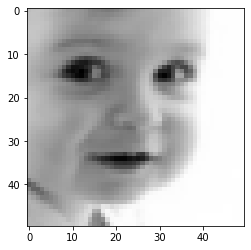

Classified as:  0.0


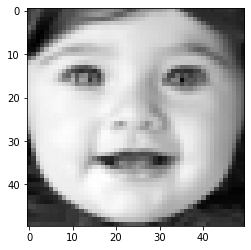

Classified as:  0.0


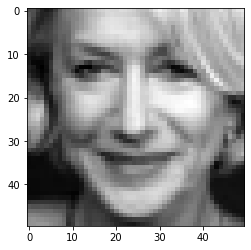

Classified as:  2.0


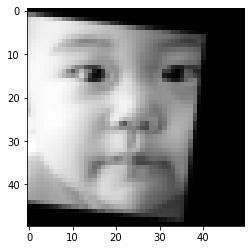

Classified as:  0.0


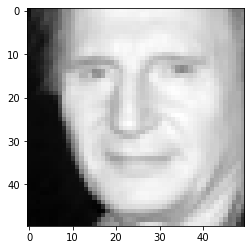

Classified as:  0.0


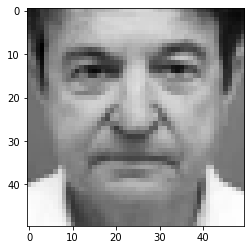

Classified as:  2.0


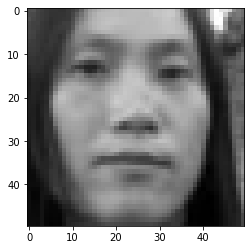

In [10]:
# Show image i
image_list = [0, 1, 2, 3, 4, 5, 6]
for i in image_list:
    print("Classified as: ", Y_train[i])
    image = X_train[i,:]
    image = image.reshape(50, 50)
    plt.imshow(image, cmap='gray')
    plt.show()

In [5]:
print("No caucasian = ", (Y_train == 0.0).sum(), " ", (Y_train == 0.0).sum()/len(Y_train), "%")
print("No african = ", (Y_train == 1.0).sum(), " ", (Y_train == 1.0).sum()/len(Y_train), "%")
print("No asian = ", (Y_train == 2.0).sum(), " ", (Y_train == 2.0).sum()/len(Y_train), "%")
print("No indian = ", (Y_train == 3.0).sum(), " ", (Y_train == 3.0).sum()/len(Y_train), "%")

No caucasian =  4478   0.6079283193049144 %
No african =  341   0.0462937822427369 %
No asian =  1338   0.18164539777355418 %
No indian =  1209   0.16413250067879445 %


In [6]:
def cross_validation(X_train, Y_train, i):
    
    n = np.shape(X_train)[0]
    n_folds = 10
    
    x_training_set = np.delete(X_train, list(range(i*int(n/n_folds),(i+1)*int(n/n_folds))), axis = 0)   # Delete the testing fold
    y_training_set = np.delete(Y_train, list(range(i*int(n/n_folds),(i+1)*int(n/n_folds))))

    x_testing_set = X_train[i*int(n/n_folds):(i+1)*int(n/n_folds) , : ]    # Consider only the testing fold
    y_testing_set = Y_train[i*int(n/n_folds):(i+1)*int(n/n_folds)]
    
    return x_training_set, y_training_set, x_testing_set, y_testing_set

In [7]:
def onehotencoding(data):
    
    X = np.zeros((len(data), 4))
    for i in range(len(data)):
        if data[i]==0:
            X[i,:] = [1, 0, 0, 0]
        elif data[i]==1:
            X[i,:] = [0, 1, 0, 0]
        elif data[i]==2:
            X[i,:] = [0, 0, 1, 0]
        else:
            X[i,:] = [0, 0, 0, 1]
    
    return (X)

## 1) Multilayer Perceptrons <a name="MLP"></a>

In [27]:
def model_NN (model, epochs, patience, ):
    
    class_names = ['Caucasian', 'African', 'Asian', 'Indian']

    # Normalize the dataset
    X_train_n = X_train / 255.0

    # Cross-validation:
    x_training_set, y_training_set, x_testing_set, y_testing_set = cross_validation(X_train_n, Y_train, 0)
    
    # Convert labels into one-hot-encoding format
    y_val_ground = y_testing_set
    y_training_set = onehotencoding(y_training_set)
    y_testing_set = onehotencoding(y_testing_set)


    # Define patience
    callback = tf.keras.callbacks.EarlyStopping(monitor='val_categorical_accuracy', patience=patience, restore_best_weights=True)
    
    model.compile(optimizer='sgd',
                  loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
                  metrics=[tf.keras.metrics.CategoricalAccuracy()])

    history = model.fit(x_training_set, y_training_set, epochs=epochs, callbacks=[callback], validation_data=(x_testing_set, y_testing_set))

    test_loss, test_acc = model.evaluate(x_testing_set,  y_testing_set, verbose=1)
    
    predictions = model.predict(x_testing_set)

    # Find the class with maximum probability
    y_test = []

    for i in range(len(predictions)):
        y_test.append(np.argmax(predictions[i]))
    
    balacc = balanced_accuracy_score(y_val_ground, y_test)

    print('\nTest accuracy:', test_acc)
    print('\n Balanced accuracy:', balacc)
    
    # plot learning curves
    plt.title('Learning Curves')
    plt.xlabel('Epoch')
    plt.ylabel('Categorical Accuracy')
    plt.plot(history.history['categorical_accuracy'], label='train')
    plt.plot(history.history['val_categorical_accuracy'], label='val')
    plt.xlim([0, 100])
    plt.legend()
    plt.show()
    
    return balacc

Epoch 1/100
208/208 [==============================] - 2s 7ms/step - loss: 0.9893 - categorical_accuracy: 0.6023 - val_loss: 0.8287 - val_categorical_accuracy: 0.6454
Epoch 2/100
208/208 [==============================] - 1s 4ms/step - loss: 0.8638 - categorical_accuracy: 0.6505 - val_loss: 0.8459 - val_categorical_accuracy: 0.6617
Epoch 3/100
208/208 [==============================] - 1s 4ms/step - loss: 0.8160 - categorical_accuracy: 0.6700 - val_loss: 0.7520 - val_categorical_accuracy: 0.6970
Epoch 4/100
208/208 [==============================] - 1s 4ms/step - loss: 0.7673 - categorical_accuracy: 0.6983 - val_loss: 0.9197 - val_categorical_accuracy: 0.6128
Epoch 5/100
208/208 [==============================] - 1s 4ms/step - loss: 0.7359 - categorical_accuracy: 0.7137 - val_loss: 0.6523 - val_categorical_accuracy: 0.7405
Epoch 6/100
208/208 [==============================] - 1s 4ms/step - loss: 0.7006 - categorical_accuracy: 0.7270 - val_loss: 0.7090 - val_categorical_accuracy: 0.752

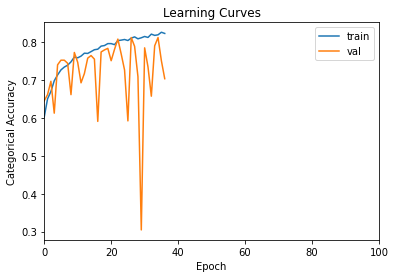

Epoch 1/100
208/208 [==============================] - 3s 9ms/step - loss: 0.9777 - categorical_accuracy: 0.6109 - val_loss: 1.2289 - val_categorical_accuracy: 0.6209
Epoch 2/100
208/208 [==============================] - 1s 7ms/step - loss: 0.8677 - categorical_accuracy: 0.6514 - val_loss: 0.7494 - val_categorical_accuracy: 0.7174
Epoch 3/100
208/208 [==============================] - 1s 3ms/step - loss: 0.8083 - categorical_accuracy: 0.6802 - val_loss: 0.7680 - val_categorical_accuracy: 0.6753
Epoch 4/100
208/208 [==============================] - 1s 3ms/step - loss: 0.7703 - categorical_accuracy: 0.6998 - val_loss: 0.9433 - val_categorical_accuracy: 0.5842
Epoch 5/100
208/208 [==============================] - 1s 3ms/step - loss: 0.7404 - categorical_accuracy: 0.7134 - val_loss: 0.7139 - val_categorical_accuracy: 0.7337
Epoch 6/100
208/208 [==============================] - 1s 3ms/step - loss: 0.7118 - categorical_accuracy: 0.7232 - val_loss: 0.6406 - val_categorical_accuracy: 0.750

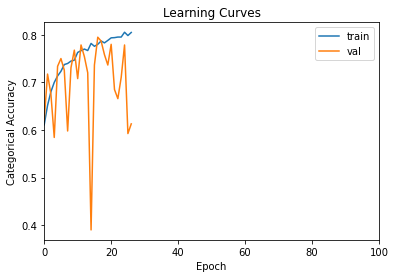

Epoch 1/100
208/208 [==============================] - 2s 6ms/step - loss: 0.9790 - categorical_accuracy: 0.6100 - val_loss: 1.2064 - val_categorical_accuracy: 0.3084
Epoch 2/100
208/208 [==============================] - 1s 4ms/step - loss: 0.8810 - categorical_accuracy: 0.6403 - val_loss: 0.8009 - val_categorical_accuracy: 0.7120
Epoch 3/100
208/208 [==============================] - 1s 4ms/step - loss: 0.8145 - categorical_accuracy: 0.6725 - val_loss: 1.0199 - val_categorical_accuracy: 0.5707
Epoch 4/100
208/208 [==============================] - 1s 3ms/step - loss: 0.7694 - categorical_accuracy: 0.7006 - val_loss: 0.8147 - val_categorical_accuracy: 0.6712
Epoch 5/100
208/208 [==============================] - 1s 3ms/step - loss: 0.7453 - categorical_accuracy: 0.7103 - val_loss: 0.8374 - val_categorical_accuracy: 0.6861
Epoch 6/100
208/208 [==============================] - 1s 3ms/step - loss: 0.7218 - categorical_accuracy: 0.7195 - val_loss: 0.7823 - val_categorical_accuracy: 0.683

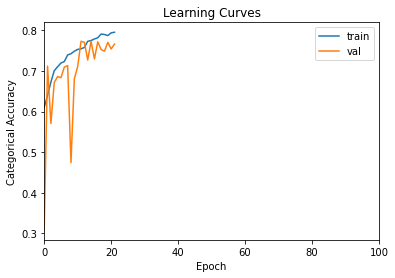

Epoch 1/100
208/208 [==============================] - 1s 4ms/step - loss: 0.9981 - categorical_accuracy: 0.6042 - val_loss: 0.8941 - val_categorical_accuracy: 0.6277
Epoch 2/100
208/208 [==============================] - 1s 4ms/step - loss: 0.8718 - categorical_accuracy: 0.6511 - val_loss: 0.8498 - val_categorical_accuracy: 0.6467
Epoch 3/100
208/208 [==============================] - 1s 4ms/step - loss: 0.7963 - categorical_accuracy: 0.6824 - val_loss: 1.0326 - val_categorical_accuracy: 0.6386
Epoch 4/100
208/208 [==============================] - 1s 3ms/step - loss: 0.7759 - categorical_accuracy: 0.6944 - val_loss: 1.3073 - val_categorical_accuracy: 0.6318
Epoch 5/100
208/208 [==============================] - 1s 4ms/step - loss: 0.7428 - categorical_accuracy: 0.7089 - val_loss: 1.2691 - val_categorical_accuracy: 0.4266
Epoch 6/100
208/208 [==============================] - 1s 4ms/step - loss: 0.7078 - categorical_accuracy: 0.7247 - val_loss: 0.9497 - val_categorical_accuracy: 0.612

Epoch 50/100
208/208 [==============================] - 1s 5ms/step - loss: 0.4436 - categorical_accuracy: 0.8397 - val_loss: 0.7197 - val_categorical_accuracy: 0.7283
Epoch 51/100
23/23 [==============================] - 0s 2ms/step - loss: 0.5286 - categorical_accuracy: 0.8152

Test accuracy: 0.8152173757553101

 Balanced accuracy: 0.6691738449672912


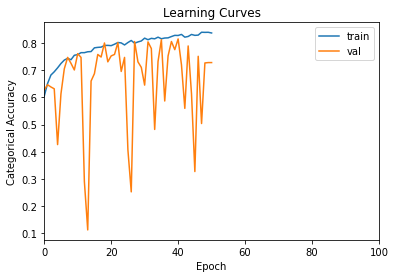

Epoch 1/100
208/208 [==============================] - 1s 5ms/step - loss: 0.9803 - categorical_accuracy: 0.6151 - val_loss: 0.9909 - val_categorical_accuracy: 0.6277
Epoch 2/100
208/208 [==============================] - 1s 5ms/step - loss: 0.8651 - categorical_accuracy: 0.6537 - val_loss: 0.8165 - val_categorical_accuracy: 0.6739
Epoch 3/100
208/208 [==============================] - 1s 5ms/step - loss: 0.8223 - categorical_accuracy: 0.6677 - val_loss: 0.7304 - val_categorical_accuracy: 0.7024
Epoch 4/100
208/208 [==============================] - 1s 3ms/step - loss: 0.7739 - categorical_accuracy: 0.7008 - val_loss: 0.8628 - val_categorical_accuracy: 0.6590
Epoch 5/100
208/208 [==============================] - 1s 3ms/step - loss: 0.7504 - categorical_accuracy: 0.7110 - val_loss: 0.9463 - val_categorical_accuracy: 0.6712
Epoch 6/100
208/208 [==============================] - 1s 3ms/step - loss: 0.7246 - categorical_accuracy: 0.7213 - val_loss: 0.6904 - val_categorical_accuracy: 0.713

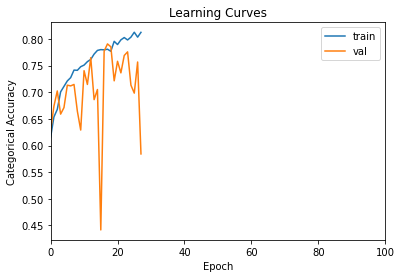


 
Model accuracy =  0.6625269476657746


In [28]:
accuracy = []
for i in range(5):
    
    # Define Model
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(4, activation='softmax')
    ])
    
    acc = model_NN(model, epochs=100, patience=10)
    accuracy.append(acc)

accuracy = np.median(accuracy)
print("\n \nModel accuracy = ", accuracy)

Epoch 1/100
208/208 [==============================] - 1s 4ms/step - loss: 0.9614 - categorical_accuracy: 0.6204 - val_loss: 1.4898 - val_categorical_accuracy: 0.2296
Epoch 2/100
208/208 [==============================] - 1s 4ms/step - loss: 0.8825 - categorical_accuracy: 0.6493 - val_loss: 1.4435 - val_categorical_accuracy: 0.2717
Epoch 3/100
208/208 [==============================] - 1s 4ms/step - loss: 0.8199 - categorical_accuracy: 0.6703 - val_loss: 0.8240 - val_categorical_accuracy: 0.6834
Epoch 4/100
208/208 [==============================] - 1s 5ms/step - loss: 0.7892 - categorical_accuracy: 0.6852 - val_loss: 1.1771 - val_categorical_accuracy: 0.4484
Epoch 5/100
208/208 [==============================] - 1s 5ms/step - loss: 0.7626 - categorical_accuracy: 0.6995 - val_loss: 0.7458 - val_categorical_accuracy: 0.6929
Epoch 6/100
208/208 [==============================] - 1s 5ms/step - loss: 0.7220 - categorical_accuracy: 0.7160 - val_loss: 1.1635 - val_categorical_accuracy: 0.631

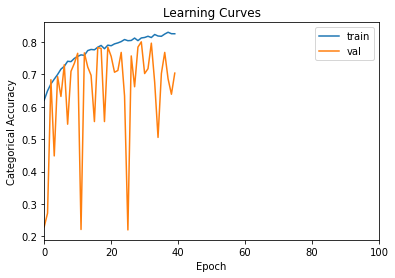

Epoch 1/100
208/208 [==============================] - 1s 4ms/step - loss: 0.9951 - categorical_accuracy: 0.6045 - val_loss: 0.9466 - val_categorical_accuracy: 0.6264
Epoch 2/100
208/208 [==============================] - 1s 4ms/step - loss: 0.8904 - categorical_accuracy: 0.6379 - val_loss: 1.0989 - val_categorical_accuracy: 0.5448
Epoch 3/100
208/208 [==============================] - 1s 4ms/step - loss: 0.8368 - categorical_accuracy: 0.6650 - val_loss: 0.8142 - val_categorical_accuracy: 0.6712
Epoch 4/100
208/208 [==============================] - 1s 4ms/step - loss: 0.7905 - categorical_accuracy: 0.6875 - val_loss: 0.8636 - val_categorical_accuracy: 0.6630
Epoch 5/100
208/208 [==============================] - 1s 4ms/step - loss: 0.7674 - categorical_accuracy: 0.6986 - val_loss: 0.7045 - val_categorical_accuracy: 0.7310
Epoch 6/100
208/208 [==============================] - 1s 4ms/step - loss: 0.7469 - categorical_accuracy: 0.7072 - val_loss: 1.0360 - val_categorical_accuracy: 0.542

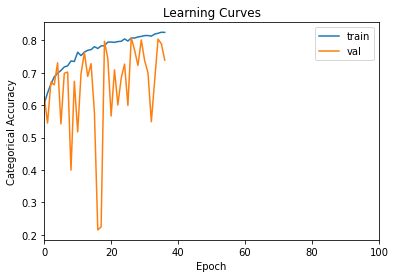

Epoch 1/100
208/208 [==============================] - 1s 5ms/step - loss: 0.9820 - categorical_accuracy: 0.6133 - val_loss: 0.8721 - val_categorical_accuracy: 0.6780
Epoch 2/100
208/208 [==============================] - 1s 4ms/step - loss: 0.8790 - categorical_accuracy: 0.6422 - val_loss: 0.7775 - val_categorical_accuracy: 0.7065
Epoch 3/100
208/208 [==============================] - 1s 4ms/step - loss: 0.8283 - categorical_accuracy: 0.6698 - val_loss: 0.8120 - val_categorical_accuracy: 0.7228
Epoch 4/100
208/208 [==============================] - 1s 4ms/step - loss: 0.7841 - categorical_accuracy: 0.6872 - val_loss: 0.7735 - val_categorical_accuracy: 0.6834
Epoch 5/100
208/208 [==============================] - 1s 4ms/step - loss: 0.7504 - categorical_accuracy: 0.7035 - val_loss: 0.9573 - val_categorical_accuracy: 0.6359
Epoch 6/100
208/208 [==============================] - 1s 4ms/step - loss: 0.7345 - categorical_accuracy: 0.7084 - val_loss: 0.7619 - val_categorical_accuracy: 0.690

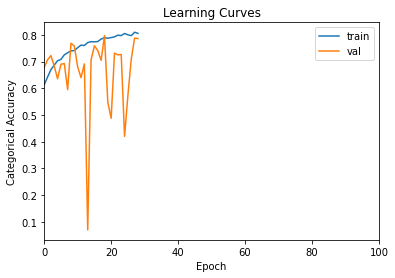

Epoch 1/100
208/208 [==============================] - 1s 4ms/step - loss: 0.9874 - categorical_accuracy: 0.6130 - val_loss: 0.9690 - val_categorical_accuracy: 0.6495
Epoch 2/100
208/208 [==============================] - 1s 4ms/step - loss: 0.9028 - categorical_accuracy: 0.6389 - val_loss: 0.9177 - val_categorical_accuracy: 0.6399
Epoch 3/100
208/208 [==============================] - 1s 4ms/step - loss: 0.8384 - categorical_accuracy: 0.6671 - val_loss: 0.8401 - val_categorical_accuracy: 0.6630
Epoch 4/100
208/208 [==============================] - 1s 4ms/step - loss: 0.7976 - categorical_accuracy: 0.6842 - val_loss: 0.8339 - val_categorical_accuracy: 0.6821
Epoch 5/100
208/208 [==============================] - 1s 4ms/step - loss: 0.7636 - categorical_accuracy: 0.7009 - val_loss: 0.7778 - val_categorical_accuracy: 0.6889
Epoch 6/100
208/208 [==============================] - 1s 4ms/step - loss: 0.7341 - categorical_accuracy: 0.7152 - val_loss: 0.7115 - val_categorical_accuracy: 0.713

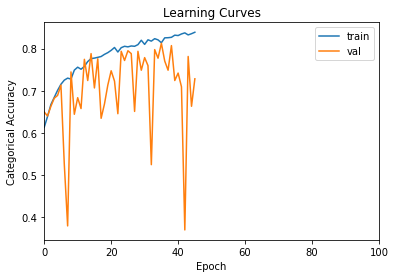

Epoch 1/100
208/208 [==============================] - 1s 5ms/step - loss: 0.9916 - categorical_accuracy: 0.6024 - val_loss: 0.8642 - val_categorical_accuracy: 0.6386
Epoch 2/100
208/208 [==============================] - 1s 4ms/step - loss: 0.8985 - categorical_accuracy: 0.6383 - val_loss: 0.8909 - val_categorical_accuracy: 0.6630
Epoch 3/100
208/208 [==============================] - 1s 4ms/step - loss: 0.8381 - categorical_accuracy: 0.6638 - val_loss: 0.9110 - val_categorical_accuracy: 0.6712
Epoch 4/100
208/208 [==============================] - 1s 4ms/step - loss: 0.7832 - categorical_accuracy: 0.6949 - val_loss: 0.7609 - val_categorical_accuracy: 0.7215
Epoch 5/100
208/208 [==============================] - 1s 4ms/step - loss: 0.7598 - categorical_accuracy: 0.7097 - val_loss: 0.8775 - val_categorical_accuracy: 0.6753
Epoch 6/100
208/208 [==============================] - 1s 4ms/step - loss: 0.7384 - categorical_accuracy: 0.7125 - val_loss: 1.0247 - val_categorical_accuracy: 0.657

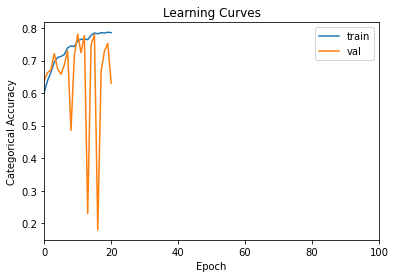

Model accuracy =  0.6370119698470378


In [29]:
accuracy = []
for i in range(5):
    # Define Model
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(50, activation='relu'),
        tf.keras.layers.Dense(4, activation='softmax')
    ])
    acc = model_NN(model, epochs=100, patience=10)
    accuracy.append(acc)

accuracy = np.median(accuracy)
print("Model accuracy = ", accuracy)

Epoch 1/100
208/208 [==============================] - 1s 5ms/step - loss: 0.9976 - categorical_accuracy: 0.6081 - val_loss: 0.9175 - val_categorical_accuracy: 0.6236
Epoch 2/100
208/208 [==============================] - 1s 4ms/step - loss: 0.9060 - categorical_accuracy: 0.6356 - val_loss: 0.9702 - val_categorical_accuracy: 0.6291
Epoch 3/100
208/208 [==============================] - 1s 4ms/step - loss: 0.8503 - categorical_accuracy: 0.6602 - val_loss: 1.1202 - val_categorical_accuracy: 0.4552
Epoch 4/100
208/208 [==============================] - 1s 4ms/step - loss: 0.8088 - categorical_accuracy: 0.6789 - val_loss: 1.0249 - val_categorical_accuracy: 0.5870
Epoch 5/100
208/208 [==============================] - 1s 4ms/step - loss: 0.7719 - categorical_accuracy: 0.6908 - val_loss: 1.6359 - val_categorical_accuracy: 0.2228
Epoch 6/100
208/208 [==============================] - 1s 4ms/step - loss: 0.7482 - categorical_accuracy: 0.7032 - val_loss: 0.6898 - val_categorical_accuracy: 0.725

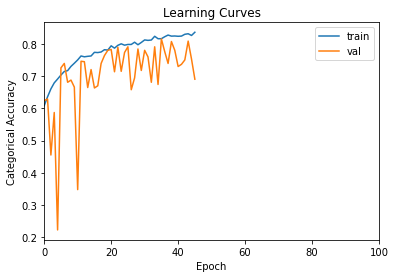

Epoch 1/100
208/208 [==============================] - 1s 4ms/step - loss: 1.0143 - categorical_accuracy: 0.6059 - val_loss: 0.9813 - val_categorical_accuracy: 0.6236
Epoch 2/100
208/208 [==============================] - 1s 4ms/step - loss: 0.9354 - categorical_accuracy: 0.6179 - val_loss: 0.9606 - val_categorical_accuracy: 0.5992
Epoch 3/100
208/208 [==============================] - 1s 4ms/step - loss: 0.8695 - categorical_accuracy: 0.6505 - val_loss: 0.9617 - val_categorical_accuracy: 0.6304
Epoch 4/100
208/208 [==============================] - 1s 4ms/step - loss: 0.8150 - categorical_accuracy: 0.6754 - val_loss: 0.7255 - val_categorical_accuracy: 0.7120
Epoch 5/100
208/208 [==============================] - 1s 4ms/step - loss: 0.7847 - categorical_accuracy: 0.6848 - val_loss: 0.7065 - val_categorical_accuracy: 0.7527
Epoch 6/100
208/208 [==============================] - 1s 4ms/step - loss: 0.7566 - categorical_accuracy: 0.7092 - val_loss: 0.9690 - val_categorical_accuracy: 0.642

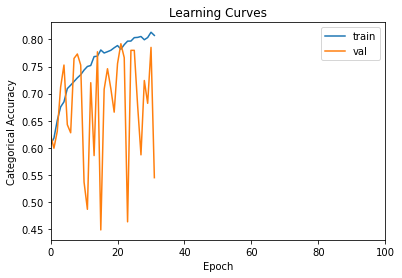

Epoch 1/100
208/208 [==============================] - 1s 5ms/step - loss: 0.9930 - categorical_accuracy: 0.6033 - val_loss: 1.4168 - val_categorical_accuracy: 0.2527
Epoch 2/100
208/208 [==============================] - 1s 4ms/step - loss: 0.9202 - categorical_accuracy: 0.6265 - val_loss: 1.0363 - val_categorical_accuracy: 0.5163
Epoch 3/100
208/208 [==============================] - 1s 4ms/step - loss: 0.8466 - categorical_accuracy: 0.6596 - val_loss: 1.0186 - val_categorical_accuracy: 0.5353
Epoch 4/100
208/208 [==============================] - 1s 4ms/step - loss: 0.8115 - categorical_accuracy: 0.6765 - val_loss: 1.0047 - val_categorical_accuracy: 0.6413
Epoch 5/100
208/208 [==============================] - 1s 4ms/step - loss: 0.7616 - categorical_accuracy: 0.7077 - val_loss: 0.9221 - val_categorical_accuracy: 0.6386
Epoch 6/100
208/208 [==============================] - 1s 4ms/step - loss: 0.7470 - categorical_accuracy: 0.7094 - val_loss: 0.7454 - val_categorical_accuracy: 0.698

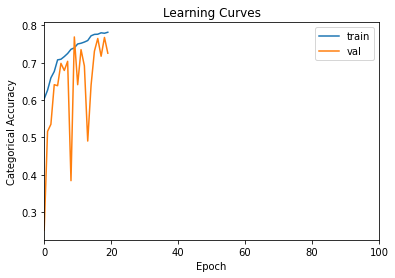

Epoch 1/100
208/208 [==============================] - 1s 4ms/step - loss: 1.0103 - categorical_accuracy: 0.6041 - val_loss: 0.9110 - val_categorical_accuracy: 0.6264
Epoch 2/100
208/208 [==============================] - 1s 4ms/step - loss: 0.9215 - categorical_accuracy: 0.6363 - val_loss: 1.2586 - val_categorical_accuracy: 0.2867
Epoch 3/100
208/208 [==============================] - 1s 4ms/step - loss: 0.8621 - categorical_accuracy: 0.6522 - val_loss: 0.8769 - val_categorical_accuracy: 0.6780
Epoch 4/100
208/208 [==============================] - 1s 4ms/step - loss: 0.8102 - categorical_accuracy: 0.6825 - val_loss: 0.8436 - val_categorical_accuracy: 0.6780
Epoch 5/100
208/208 [==============================] - 1s 4ms/step - loss: 0.7820 - categorical_accuracy: 0.6970 - val_loss: 1.1168 - val_categorical_accuracy: 0.6386
Epoch 6/100
208/208 [==============================] - 1s 4ms/step - loss: 0.7637 - categorical_accuracy: 0.7012 - val_loss: 0.8294 - val_categorical_accuracy: 0.680

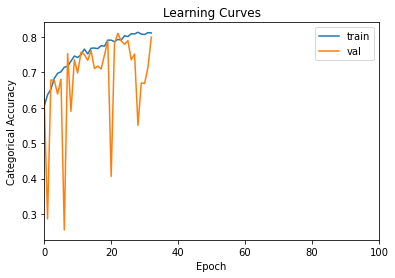

Epoch 1/100
208/208 [==============================] - 1s 5ms/step - loss: 0.9981 - categorical_accuracy: 0.6050 - val_loss: 0.9511 - val_categorical_accuracy: 0.6522
Epoch 2/100
208/208 [==============================] - 1s 4ms/step - loss: 0.9083 - categorical_accuracy: 0.6367 - val_loss: 0.8383 - val_categorical_accuracy: 0.6726
Epoch 3/100
208/208 [==============================] - 1s 4ms/step - loss: 0.8433 - categorical_accuracy: 0.6624 - val_loss: 1.1789 - val_categorical_accuracy: 0.4307
Epoch 4/100
208/208 [==============================] - 1s 4ms/step - loss: 0.8001 - categorical_accuracy: 0.6793 - val_loss: 0.7085 - val_categorical_accuracy: 0.7378
Epoch 5/100
208/208 [==============================] - 1s 4ms/step - loss: 0.7697 - categorical_accuracy: 0.6925 - val_loss: 0.6892 - val_categorical_accuracy: 0.7215
Epoch 6/100
208/208 [==============================] - 1s 4ms/step - loss: 0.7376 - categorical_accuracy: 0.7087 - val_loss: 0.7004 - val_categorical_accuracy: 0.712

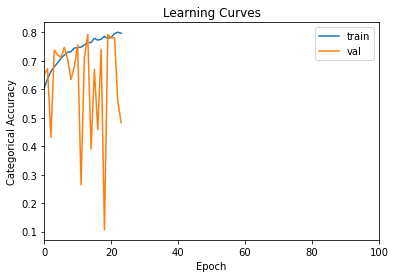

Model accuracy =  0.6233514710801805


In [30]:
accuracy = []
for i in range(5):
    # Define Model
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(50, activation='relu'),
        tf.keras.layers.Dense(50, activation='relu'),
        tf.keras.layers.Dense(4, activation='softmax')
    ])
    acc = model_NN(model, epochs=100, patience=10)
    accuracy.append(acc)

accuracy = np.median(accuracy)
print("Model accuracy = ", accuracy)

Epoch 1/100
208/208 [==============================] - 1s 3ms/step - loss: 1.0229 - categorical_accuracy: 0.5980 - val_loss: 0.9816 - val_categorical_accuracy: 0.6236
Epoch 2/100
208/208 [==============================] - 1s 3ms/step - loss: 0.9206 - categorical_accuracy: 0.6232 - val_loss: 0.9629 - val_categorical_accuracy: 0.6359
Epoch 3/100
208/208 [==============================] - 1s 3ms/step - loss: 0.8702 - categorical_accuracy: 0.6483 - val_loss: 0.8631 - val_categorical_accuracy: 0.6590
Epoch 4/100
208/208 [==============================] - 1s 3ms/step - loss: 0.8269 - categorical_accuracy: 0.6682 - val_loss: 1.4464 - val_categorical_accuracy: 0.3560
Epoch 5/100
208/208 [==============================] - 1s 3ms/step - loss: 0.7885 - categorical_accuracy: 0.6879 - val_loss: 0.8061 - val_categorical_accuracy: 0.6997
Epoch 6/100
208/208 [==============================] - 1s 2ms/step - loss: 0.7655 - categorical_accuracy: 0.7023 - val_loss: 1.1266 - val_categorical_accuracy: 0.506

Epoch 50/100
208/208 [==============================] - 0s 2ms/step - loss: 0.4624 - categorical_accuracy: 0.8291 - val_loss: 1.4216 - val_categorical_accuracy: 0.4552
Epoch 51/100
208/208 [==============================] - 1s 2ms/step - loss: 0.4709 - categorical_accuracy: 0.8264 - val_loss: 0.5920 - val_categorical_accuracy: 0.7976
Epoch 52/100
208/208 [==============================] - 1s 2ms/step - loss: 0.4611 - categorical_accuracy: 0.8302 - val_loss: 0.6619 - val_categorical_accuracy: 0.7663
Epoch 53/100
208/208 [==============================] - 1s 3ms/step - loss: 0.4620 - categorical_accuracy: 0.8279 - val_loss: 0.6352 - val_categorical_accuracy: 0.7731
Epoch 54/100
23/23 [==============================] - 0s 2ms/step - loss: 0.5339 - categorical_accuracy: 0.8139

Test accuracy: 0.813858687877655

 Balanced accuracy: 0.6334740979911144


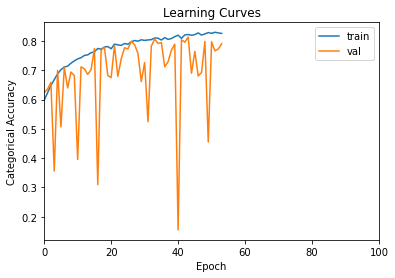

Epoch 1/100
208/208 [==============================] - 1s 3ms/step - loss: 1.0083 - categorical_accuracy: 0.6032 - val_loss: 0.9302 - val_categorical_accuracy: 0.6291
Epoch 2/100
208/208 [==============================] - 1s 3ms/step - loss: 0.9283 - categorical_accuracy: 0.6271 - val_loss: 1.0145 - val_categorical_accuracy: 0.6250
Epoch 3/100
208/208 [==============================] - 1s 2ms/step - loss: 0.8638 - categorical_accuracy: 0.6597 - val_loss: 0.9296 - val_categorical_accuracy: 0.6427
Epoch 4/100
208/208 [==============================] - 1s 2ms/step - loss: 0.8313 - categorical_accuracy: 0.6667 - val_loss: 0.9158 - val_categorical_accuracy: 0.6698
Epoch 5/100
208/208 [==============================] - 1s 3ms/step - loss: 0.7844 - categorical_accuracy: 0.6917 - val_loss: 0.7953 - val_categorical_accuracy: 0.6861
Epoch 6/100
208/208 [==============================] - 0s 2ms/step - loss: 0.7547 - categorical_accuracy: 0.7038 - val_loss: 0.9007 - val_categorical_accuracy: 0.690

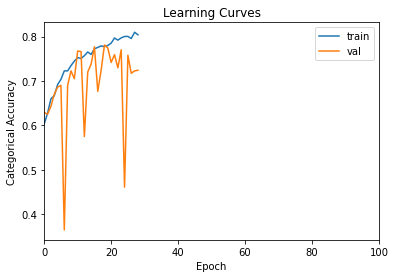

Epoch 1/100
208/208 [==============================] - 1s 3ms/step - loss: 1.0280 - categorical_accuracy: 0.6020 - val_loss: 0.9825 - val_categorical_accuracy: 0.6196
Epoch 2/100
208/208 [==============================] - 0s 2ms/step - loss: 0.9509 - categorical_accuracy: 0.6176 - val_loss: 1.0587 - val_categorical_accuracy: 0.6209
Epoch 3/100
208/208 [==============================] - 0s 2ms/step - loss: 0.8898 - categorical_accuracy: 0.6377 - val_loss: 1.0238 - val_categorical_accuracy: 0.5408
Epoch 4/100
208/208 [==============================] - 0s 2ms/step - loss: 0.8416 - categorical_accuracy: 0.6667 - val_loss: 0.7827 - val_categorical_accuracy: 0.6943
Epoch 5/100
208/208 [==============================] - 0s 2ms/step - loss: 0.8004 - categorical_accuracy: 0.6861 - val_loss: 0.8230 - val_categorical_accuracy: 0.6685
Epoch 6/100
208/208 [==============================] - 0s 2ms/step - loss: 0.7663 - categorical_accuracy: 0.6982 - val_loss: 0.9678 - val_categorical_accuracy: 0.614

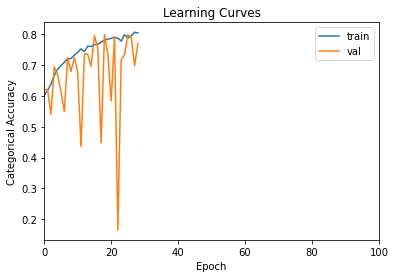

Epoch 1/100
208/208 [==============================] - 1s 3ms/step - loss: 1.0095 - categorical_accuracy: 0.6024 - val_loss: 0.9323 - val_categorical_accuracy: 0.6318
Epoch 2/100
208/208 [==============================] - 0s 2ms/step - loss: 0.9193 - categorical_accuracy: 0.6327 - val_loss: 0.8315 - val_categorical_accuracy: 0.6440
Epoch 3/100
208/208 [==============================] - 0s 2ms/step - loss: 0.8550 - categorical_accuracy: 0.6591 - val_loss: 0.8395 - val_categorical_accuracy: 0.6549
Epoch 4/100
208/208 [==============================] - 0s 2ms/step - loss: 0.8110 - categorical_accuracy: 0.6777 - val_loss: 1.3487 - val_categorical_accuracy: 0.3601
Epoch 5/100
208/208 [==============================] - 0s 2ms/step - loss: 0.7878 - categorical_accuracy: 0.6849 - val_loss: 1.0655 - val_categorical_accuracy: 0.5177
Epoch 6/100
208/208 [==============================] - 0s 2ms/step - loss: 0.7498 - categorical_accuracy: 0.7098 - val_loss: 0.7018 - val_categorical_accuracy: 0.717

Epoch 50/100
208/208 [==============================] - 1s 2ms/step - loss: 0.4595 - categorical_accuracy: 0.8312 - val_loss: 0.6472 - val_categorical_accuracy: 0.7622
Epoch 51/100
208/208 [==============================] - 0s 2ms/step - loss: 0.4631 - categorical_accuracy: 0.8284 - val_loss: 0.6950 - val_categorical_accuracy: 0.7500
Epoch 52/100
208/208 [==============================] - 1s 3ms/step - loss: 0.4342 - categorical_accuracy: 0.8373 - val_loss: 0.5556 - val_categorical_accuracy: 0.7935
Epoch 53/100
208/208 [==============================] - 1s 3ms/step - loss: 0.4507 - categorical_accuracy: 0.8320 - val_loss: 1.3241 - val_categorical_accuracy: 0.6630
Epoch 54/100
208/208 [==============================] - 1s 3ms/step - loss: 0.4429 - categorical_accuracy: 0.8320 - val_loss: 0.5478 - val_categorical_accuracy: 0.7976
Epoch 55/100
208/208 [==============================] - 1s 3ms/step - loss: 0.4381 - categorical_accuracy: 0.8388 - val_loss: 1.0647 - val_categorical_accuracy:

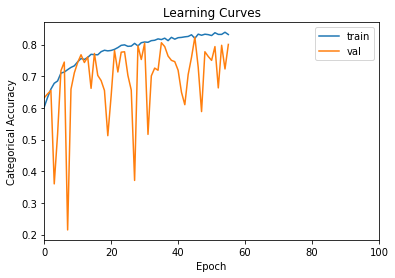

Epoch 1/100
208/208 [==============================] - 1s 3ms/step - loss: 1.0176 - categorical_accuracy: 0.6068 - val_loss: 1.0167 - val_categorical_accuracy: 0.6196
Epoch 2/100
208/208 [==============================] - 0s 2ms/step - loss: 0.9526 - categorical_accuracy: 0.6146 - val_loss: 0.8773 - val_categorical_accuracy: 0.6562
Epoch 3/100
208/208 [==============================] - 1s 2ms/step - loss: 0.8867 - categorical_accuracy: 0.6457 - val_loss: 0.9152 - val_categorical_accuracy: 0.6644
Epoch 4/100
208/208 [==============================] - 1s 3ms/step - loss: 0.8422 - categorical_accuracy: 0.6671 - val_loss: 0.8468 - val_categorical_accuracy: 0.6440
Epoch 5/100
208/208 [==============================] - 0s 2ms/step - loss: 0.8034 - categorical_accuracy: 0.6855 - val_loss: 1.1977 - val_categorical_accuracy: 0.3913
Epoch 6/100
208/208 [==============================] - 0s 2ms/step - loss: 0.7806 - categorical_accuracy: 0.6917 - val_loss: 0.9169 - val_categorical_accuracy: 0.661

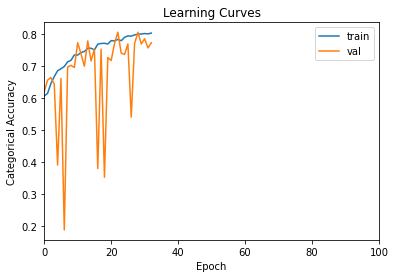

Model accuracy =  0.6334740979911144


In [31]:
accuracy = []
for i in range(5):
    # Define Model
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(50, activation='relu'),
        tf.keras.layers.Dense(50, activation='relu'),
        tf.keras.layers.Dense(25, activation='relu'),
        tf.keras.layers.Dense(4, activation='softmax')
    ])
    
    acc = model_NN(model, epochs=100, patience=10)
    accuracy.append(acc)

accuracy = np.median(accuracy)
print("Model accuracy = ", accuracy)

Epoch 1/100
208/208 [==============================] - 9s 39ms/step - loss: 1.0303 - categorical_accuracy: 0.6011 - val_loss: 0.8265 - val_categorical_accuracy: 0.6590
Epoch 2/100
208/208 [==============================] - 8s 39ms/step - loss: 0.8219 - categorical_accuracy: 0.6682 - val_loss: 1.1657 - val_categorical_accuracy: 0.6318
Epoch 3/100
208/208 [==============================] - 8s 39ms/step - loss: 0.7709 - categorical_accuracy: 0.6917 - val_loss: 0.7175 - val_categorical_accuracy: 0.7092
Epoch 4/100
208/208 [==============================] - 8s 39ms/step - loss: 0.7310 - categorical_accuracy: 0.7140 - val_loss: 0.7687 - val_categorical_accuracy: 0.7065
Epoch 5/100
208/208 [==============================] - 8s 39ms/step - loss: 0.7105 - categorical_accuracy: 0.7214 - val_loss: 0.9894 - val_categorical_accuracy: 0.6427
Epoch 6/100
208/208 [==============================] - 8s 41ms/step - loss: 0.6878 - categorical_accuracy: 0.7341 - val_loss: 0.8439 - val_categorical_accuracy:

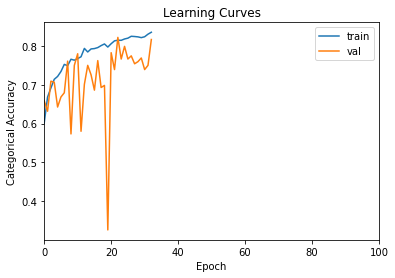

Epoch 1/100
208/208 [==============================] - 11s 52ms/step - loss: 1.0140 - categorical_accuracy: 0.6023 - val_loss: 0.7704 - val_categorical_accuracy: 0.7065
Epoch 2/100
208/208 [==============================] - 8s 36ms/step - loss: 0.8196 - categorical_accuracy: 0.6707 - val_loss: 0.9967 - val_categorical_accuracy: 0.6454
Epoch 3/100
208/208 [==============================] - 7s 35ms/step - loss: 0.7657 - categorical_accuracy: 0.7033 - val_loss: 1.1571 - val_categorical_accuracy: 0.4959
Epoch 4/100
208/208 [==============================] - 7s 35ms/step - loss: 0.7307 - categorical_accuracy: 0.7181 - val_loss: 0.6792 - val_categorical_accuracy: 0.7486
Epoch 5/100
208/208 [==============================] - 7s 36ms/step - loss: 0.7081 - categorical_accuracy: 0.7250 - val_loss: 0.7430 - val_categorical_accuracy: 0.7188
Epoch 6/100
208/208 [==============================] - 7s 36ms/step - loss: 0.6830 - categorical_accuracy: 0.7348 - val_loss: 0.7608 - val_categorical_accuracy

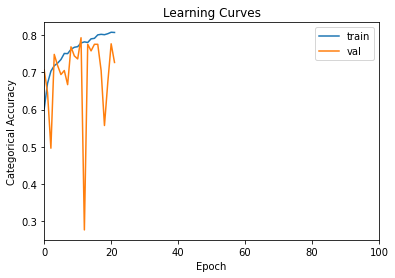

Epoch 1/100
208/208 [==============================] - 8s 39ms/step - loss: 1.0226 - categorical_accuracy: 0.6057 - val_loss: 0.8798 - val_categorical_accuracy: 0.6508
Epoch 2/100
208/208 [==============================] - 8s 36ms/step - loss: 0.8365 - categorical_accuracy: 0.6662 - val_loss: 0.7560 - val_categorical_accuracy: 0.7092
Epoch 3/100
208/208 [==============================] - 7s 36ms/step - loss: 0.7598 - categorical_accuracy: 0.7039 - val_loss: 0.7374 - val_categorical_accuracy: 0.7269
Epoch 4/100
208/208 [==============================] - 7s 36ms/step - loss: 0.7309 - categorical_accuracy: 0.7133 - val_loss: 0.8108 - val_categorical_accuracy: 0.6712
Epoch 5/100
208/208 [==============================] - 7s 35ms/step - loss: 0.6980 - categorical_accuracy: 0.7281 - val_loss: 0.6683 - val_categorical_accuracy: 0.7459
Epoch 6/100
208/208 [==============================] - 7s 36ms/step - loss: 0.7098 - categorical_accuracy: 0.7271 - val_loss: 1.0364 - val_categorical_accuracy:

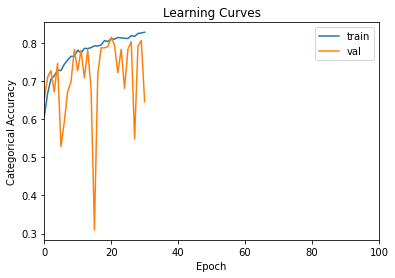

Epoch 1/100
208/208 [==============================] - 9s 40ms/step - loss: 1.0004 - categorical_accuracy: 0.6069 - val_loss: 0.8718 - val_categorical_accuracy: 0.6562
Epoch 2/100
208/208 [==============================] - 8s 39ms/step - loss: 0.8178 - categorical_accuracy: 0.6735 - val_loss: 0.7177 - val_categorical_accuracy: 0.7160
Epoch 3/100
208/208 [==============================] - 8s 39ms/step - loss: 0.7662 - categorical_accuracy: 0.7053 - val_loss: 0.6992 - val_categorical_accuracy: 0.7079
Epoch 4/100
208/208 [==============================] - 8s 39ms/step - loss: 0.7273 - categorical_accuracy: 0.7176 - val_loss: 0.9971 - val_categorical_accuracy: 0.6508
Epoch 5/100
208/208 [==============================] - 8s 39ms/step - loss: 0.7062 - categorical_accuracy: 0.7261 - val_loss: 0.8212 - val_categorical_accuracy: 0.6685
Epoch 6/100
208/208 [==============================] - 8s 39ms/step - loss: 0.6706 - categorical_accuracy: 0.7412 - val_loss: 0.6869 - val_categorical_accuracy:

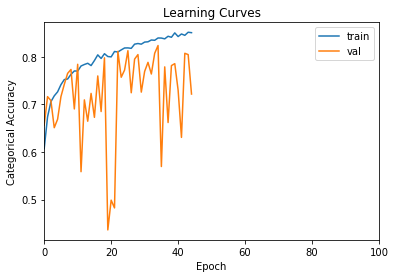

Epoch 1/100
208/208 [==============================] - 9s 39ms/step - loss: 1.0140 - categorical_accuracy: 0.6038 - val_loss: 0.9516 - val_categorical_accuracy: 0.6413
Epoch 2/100
208/208 [==============================] - 8s 38ms/step - loss: 0.8322 - categorical_accuracy: 0.6659 - val_loss: 0.8063 - val_categorical_accuracy: 0.6848
Epoch 3/100
208/208 [==============================] - 8s 38ms/step - loss: 0.7727 - categorical_accuracy: 0.6952 - val_loss: 0.7301 - val_categorical_accuracy: 0.7255
Epoch 4/100
208/208 [==============================] - 8s 39ms/step - loss: 0.7377 - categorical_accuracy: 0.7134 - val_loss: 0.6893 - val_categorical_accuracy: 0.7120
Epoch 5/100
208/208 [==============================] - 8s 38ms/step - loss: 0.6976 - categorical_accuracy: 0.7317 - val_loss: 0.6553 - val_categorical_accuracy: 0.7582
Epoch 6/100
208/208 [==============================] - 8s 38ms/step - loss: 0.6746 - categorical_accuracy: 0.7437 - val_loss: 0.6757 - val_categorical_accuracy:

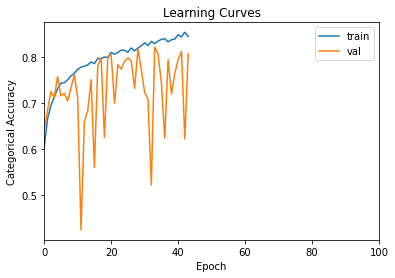

Model accuracy =  0.647260896859859


In [32]:
 
accuracy = []
for i in range(5):
        # Define Model
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(3000, activation='relu'),
        tf.keras.layers.Dense(4, activation='softmax')
    ])
    
    acc = model_NN(model, epochs=100, patience=10)
    accuracy.append(acc)

accuracy = np.median(accuracy)
print("Model accuracy = ", accuracy)

Epoch 1/100
208/208 [==============================] - 11s 50ms/step - loss: 0.9702 - categorical_accuracy: 0.6149 - val_loss: 0.8456 - val_categorical_accuracy: 0.6562
Epoch 2/100
208/208 [==============================] - 10s 50ms/step - loss: 0.8266 - categorical_accuracy: 0.6724 - val_loss: 0.8399 - val_categorical_accuracy: 0.6508
Epoch 3/100
208/208 [==============================] - 10s 49ms/step - loss: 0.7954 - categorical_accuracy: 0.6828 - val_loss: 0.6946 - val_categorical_accuracy: 0.7296
Epoch 4/100
208/208 [==============================] - 10s 49ms/step - loss: 0.7496 - categorical_accuracy: 0.7078 - val_loss: 0.9150 - val_categorical_accuracy: 0.6671
Epoch 5/100
208/208 [==============================] - 10s 49ms/step - loss: 0.7215 - categorical_accuracy: 0.7175 - val_loss: 1.7518 - val_categorical_accuracy: 0.2418
Epoch 6/100
208/208 [==============================] - 11s 53ms/step - loss: 0.7045 - categorical_accuracy: 0.7262 - val_loss: 1.0785 - val_categorical_acc

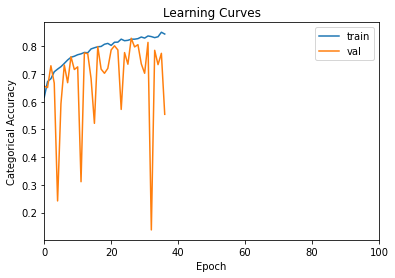

Epoch 1/100
208/208 [==============================] - 10s 48ms/step - loss: 0.9637 - categorical_accuracy: 0.6137 - val_loss: 0.8797 - val_categorical_accuracy: 0.6304
Epoch 2/100
208/208 [==============================] - 10s 47ms/step - loss: 0.8358 - categorical_accuracy: 0.6704 - val_loss: 0.7599 - val_categorical_accuracy: 0.7228
Epoch 3/100
208/208 [==============================] - 10s 48ms/step - loss: 0.7985 - categorical_accuracy: 0.6808 - val_loss: 1.0455 - val_categorical_accuracy: 0.5571
Epoch 4/100
208/208 [==============================] - 10s 49ms/step - loss: 0.7457 - categorical_accuracy: 0.7090 - val_loss: 0.7548 - val_categorical_accuracy: 0.7120
Epoch 5/100
208/208 [==============================] - 10s 48ms/step - loss: 0.7179 - categorical_accuracy: 0.7196 - val_loss: 0.8363 - val_categorical_accuracy: 0.6617
Epoch 6/100
208/208 [==============================] - 10s 47ms/step - loss: 0.6794 - categorical_accuracy: 0.7347 - val_loss: 0.8975 - val_categorical_acc

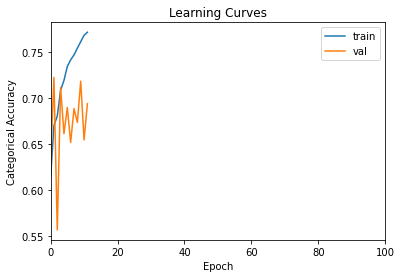

Epoch 1/100
208/208 [==============================] - 10s 48ms/step - loss: 0.9726 - categorical_accuracy: 0.6047 - val_loss: 0.8363 - val_categorical_accuracy: 0.6413
Epoch 2/100
208/208 [==============================] - 10s 47ms/step - loss: 0.8415 - categorical_accuracy: 0.6621 - val_loss: 2.8989 - val_categorical_accuracy: 0.2188
Epoch 3/100
208/208 [==============================] - 10s 47ms/step - loss: 0.8031 - categorical_accuracy: 0.6863 - val_loss: 0.7168 - val_categorical_accuracy: 0.7052
Epoch 4/100
208/208 [==============================] - 10s 49ms/step - loss: 0.7598 - categorical_accuracy: 0.7011 - val_loss: 0.8089 - val_categorical_accuracy: 0.6780
Epoch 5/100
208/208 [==============================] - 10s 48ms/step - loss: 0.7066 - categorical_accuracy: 0.7229 - val_loss: 0.6496 - val_categorical_accuracy: 0.7486
Epoch 6/100
208/208 [==============================] - 10s 47ms/step - loss: 0.7078 - categorical_accuracy: 0.7213 - val_loss: 1.2254 - val_categorical_acc

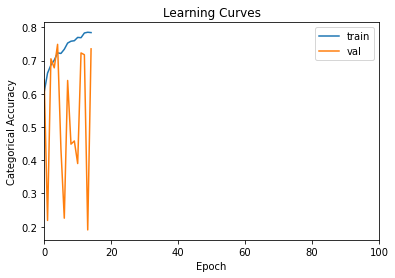

Epoch 1/100
208/208 [==============================] - 11s 50ms/step - loss: 0.9639 - categorical_accuracy: 0.6217 - val_loss: 1.0153 - val_categorical_accuracy: 0.6277
Epoch 2/100
208/208 [==============================] - 11s 52ms/step - loss: 0.8447 - categorical_accuracy: 0.6659 - val_loss: 0.7841 - val_categorical_accuracy: 0.6726
Epoch 3/100
208/208 [==============================] - 10s 47ms/step - loss: 0.7872 - categorical_accuracy: 0.6913 - val_loss: 1.1424 - val_categorical_accuracy: 0.6780
Epoch 4/100
208/208 [==============================] - 10s 47ms/step - loss: 0.7517 - categorical_accuracy: 0.7026 - val_loss: 0.9689 - val_categorical_accuracy: 0.6019
Epoch 5/100
208/208 [==============================] - 10s 47ms/step - loss: 0.7205 - categorical_accuracy: 0.7187 - val_loss: 0.6425 - val_categorical_accuracy: 0.7568
Epoch 6/100
208/208 [==============================] - 10s 47ms/step - loss: 0.6887 - categorical_accuracy: 0.7345 - val_loss: 0.7736 - val_categorical_acc

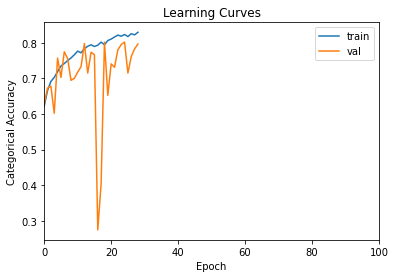

Epoch 1/100
208/208 [==============================] - 11s 50ms/step - loss: 0.9629 - categorical_accuracy: 0.6139 - val_loss: 0.8126 - val_categorical_accuracy: 0.6427
Epoch 2/100
208/208 [==============================] - 10s 47ms/step - loss: 0.8441 - categorical_accuracy: 0.6618 - val_loss: 1.7421 - val_categorical_accuracy: 0.1848
Epoch 3/100
208/208 [==============================] - 10s 48ms/step - loss: 0.7708 - categorical_accuracy: 0.6986 - val_loss: 0.8957 - val_categorical_accuracy: 0.6630
Epoch 4/100
208/208 [==============================] - 10s 47ms/step - loss: 0.7526 - categorical_accuracy: 0.7110 - val_loss: 0.7820 - val_categorical_accuracy: 0.6712
Epoch 5/100
208/208 [==============================] - 10s 47ms/step - loss: 0.7154 - categorical_accuracy: 0.7223 - val_loss: 0.7412 - val_categorical_accuracy: 0.6957
Epoch 6/100
208/208 [==============================] - 10s 47ms/step - loss: 0.6944 - categorical_accuracy: 0.7287 - val_loss: 0.9794 - val_categorical_acc

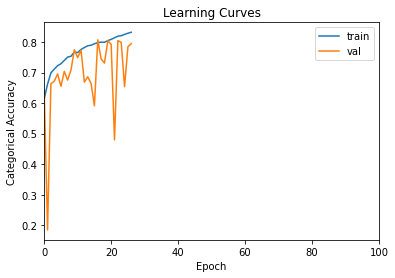

Model accuracy =  0.6018865347488237


In [33]:
# Define Model

    
accuracy = []
for i in range(5):
    
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(1500, activation='relu'),
        tf.keras.layers.Dense(1500, activation='relu'),
        tf.keras.layers.Dense(4, activation='softmax')
    ])
    acc = model_NN(model, epochs=100, patience=10)
    accuracy.append(acc)

accuracy = np.median(accuracy)
print("Model accuracy = ", accuracy)

Epoch 1/100
208/208 [==============================] - 1s 5ms/step - loss: 1.0075 - categorical_accuracy: 0.6063 - val_loss: 0.9453 - val_categorical_accuracy: 0.6413
Epoch 2/100
208/208 [==============================] - 1s 4ms/step - loss: 0.9227 - categorical_accuracy: 0.6265 - val_loss: 0.8294 - val_categorical_accuracy: 0.6467
Epoch 3/100
208/208 [==============================] - 1s 4ms/step - loss: 0.8713 - categorical_accuracy: 0.6493 - val_loss: 1.0154 - val_categorical_accuracy: 0.6264
Epoch 4/100
208/208 [==============================] - 1s 4ms/step - loss: 0.8234 - categorical_accuracy: 0.6751 - val_loss: 0.7684 - val_categorical_accuracy: 0.6916
Epoch 5/100
208/208 [==============================] - 1s 4ms/step - loss: 0.7974 - categorical_accuracy: 0.6854 - val_loss: 0.9402 - val_categorical_accuracy: 0.5761
Epoch 6/100
208/208 [==============================] - 1s 4ms/step - loss: 0.7646 - categorical_accuracy: 0.6991 - val_loss: 0.9325 - val_categorical_accuracy: 0.587

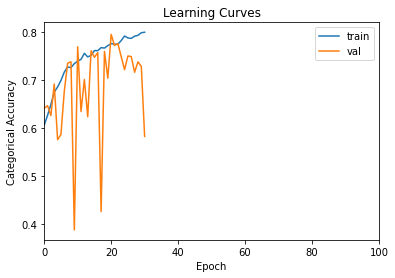

Epoch 1/100
208/208 [==============================] - 1s 4ms/step - loss: 1.0113 - categorical_accuracy: 0.6023 - val_loss: 0.9215 - val_categorical_accuracy: 0.6508
Epoch 2/100
208/208 [==============================] - 1s 4ms/step - loss: 0.9158 - categorical_accuracy: 0.6311 - val_loss: 0.9143 - val_categorical_accuracy: 0.6753
Epoch 3/100
208/208 [==============================] - 1s 4ms/step - loss: 0.8563 - categorical_accuracy: 0.6611 - val_loss: 0.7944 - val_categorical_accuracy: 0.7052
Epoch 4/100
208/208 [==============================] - 1s 4ms/step - loss: 0.8257 - categorical_accuracy: 0.6722 - val_loss: 0.8715 - val_categorical_accuracy: 0.6739
Epoch 5/100
208/208 [==============================] - 1s 4ms/step - loss: 0.8003 - categorical_accuracy: 0.6846 - val_loss: 0.7872 - val_categorical_accuracy: 0.7011
Epoch 6/100
208/208 [==============================] - 1s 4ms/step - loss: 0.7675 - categorical_accuracy: 0.6955 - val_loss: 1.2137 - val_categorical_accuracy: 0.455

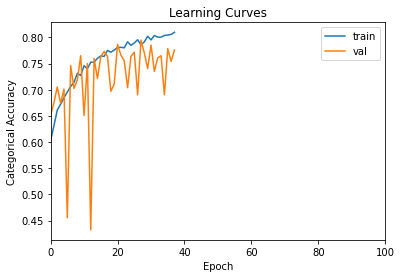

Epoch 1/100
208/208 [==============================] - 2s 5ms/step - loss: 1.0076 - categorical_accuracy: 0.6051 - val_loss: 0.9007 - val_categorical_accuracy: 0.6250
Epoch 2/100
208/208 [==============================] - 1s 4ms/step - loss: 0.9186 - categorical_accuracy: 0.6321 - val_loss: 0.9227 - val_categorical_accuracy: 0.6264
Epoch 3/100
208/208 [==============================] - 1s 4ms/step - loss: 0.8606 - categorical_accuracy: 0.6582 - val_loss: 0.8601 - val_categorical_accuracy: 0.6427
Epoch 4/100
208/208 [==============================] - 1s 4ms/step - loss: 0.8233 - categorical_accuracy: 0.6729 - val_loss: 1.7736 - val_categorical_accuracy: 0.2092
Epoch 5/100
208/208 [==============================] - 1s 4ms/step - loss: 0.8034 - categorical_accuracy: 0.6839 - val_loss: 0.7064 - val_categorical_accuracy: 0.7120
Epoch 6/100
208/208 [==============================] - 1s 4ms/step - loss: 0.7710 - categorical_accuracy: 0.6928 - val_loss: 0.9123 - val_categorical_accuracy: 0.615

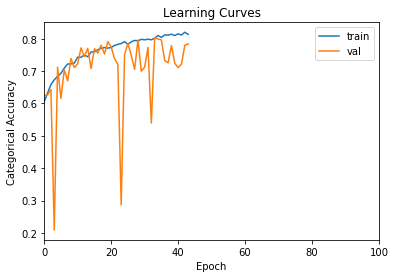

Epoch 1/100
208/208 [==============================] - 1s 4ms/step - loss: 1.0138 - categorical_accuracy: 0.6018 - val_loss: 0.9379 - val_categorical_accuracy: 0.6223
Epoch 2/100
208/208 [==============================] - 1s 4ms/step - loss: 0.9202 - categorical_accuracy: 0.6285 - val_loss: 1.1718 - val_categorical_accuracy: 0.3478
Epoch 3/100
208/208 [==============================] - 1s 4ms/step - loss: 0.8629 - categorical_accuracy: 0.6560 - val_loss: 1.0965 - val_categorical_accuracy: 0.5679
Epoch 4/100
208/208 [==============================] - 1s 4ms/step - loss: 0.8211 - categorical_accuracy: 0.6763 - val_loss: 0.7444 - val_categorical_accuracy: 0.6875
Epoch 5/100
208/208 [==============================] - 1s 4ms/step - loss: 0.7774 - categorical_accuracy: 0.6931 - val_loss: 2.0030 - val_categorical_accuracy: 0.1793
Epoch 6/100
208/208 [==============================] - 1s 4ms/step - loss: 0.7632 - categorical_accuracy: 0.7041 - val_loss: 0.7288 - val_categorical_accuracy: 0.699

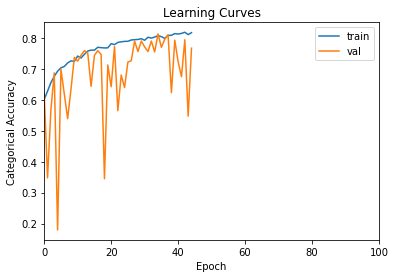

Epoch 1/100
208/208 [==============================] - 1s 4ms/step - loss: 0.9996 - categorical_accuracy: 0.6087 - val_loss: 0.9269 - val_categorical_accuracy: 0.6223
Epoch 2/100
208/208 [==============================] - 1s 4ms/step - loss: 0.9155 - categorical_accuracy: 0.6321 - val_loss: 0.8400 - val_categorical_accuracy: 0.6413
Epoch 3/100
208/208 [==============================] - 1s 4ms/step - loss: 0.8582 - categorical_accuracy: 0.6570 - val_loss: 0.9367 - val_categorical_accuracy: 0.6318
Epoch 4/100
208/208 [==============================] - 1s 4ms/step - loss: 0.8226 - categorical_accuracy: 0.6745 - val_loss: 0.8697 - val_categorical_accuracy: 0.6685
Epoch 5/100
208/208 [==============================] - 1s 4ms/step - loss: 0.7989 - categorical_accuracy: 0.6858 - val_loss: 0.8177 - val_categorical_accuracy: 0.6997
Epoch 6/100
208/208 [==============================] - 1s 4ms/step - loss: 0.7628 - categorical_accuracy: 0.7021 - val_loss: 0.7145 - val_categorical_accuracy: 0.729

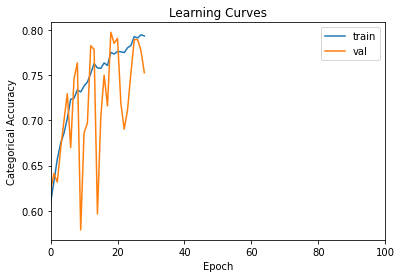

Model accuracy =  0.6163063372929457


In [34]:
accuracy = []
for i in range(5):
    
    # Define Model
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(50, activation='relu'),
        tf.keras.layers.Dense(4, activation='softmax')
    ])
    
    acc = model_NN(model, epochs=100, patience=10)
    accuracy.append(acc)

accuracy = np.median(accuracy)
print("Model accuracy = ", accuracy)

Epoch 1/100
208/208 [==============================] - 1s 4ms/step - loss: 0.9760 - categorical_accuracy: 0.6101 - val_loss: 1.4485 - val_categorical_accuracy: 0.1916
Epoch 2/100
208/208 [==============================] - 1s 4ms/step - loss: 0.8614 - categorical_accuracy: 0.6477 - val_loss: 0.8653 - val_categorical_accuracy: 0.6590
Epoch 3/100
208/208 [==============================] - 1s 4ms/step - loss: 0.7964 - categorical_accuracy: 0.6827 - val_loss: 0.8458 - val_categorical_accuracy: 0.6522
Epoch 4/100
208/208 [==============================] - 1s 3ms/step - loss: 0.7739 - categorical_accuracy: 0.6932 - val_loss: 0.9566 - val_categorical_accuracy: 0.6508
Epoch 5/100
208/208 [==============================] - 1s 4ms/step - loss: 0.7246 - categorical_accuracy: 0.7183 - val_loss: 0.7414 - val_categorical_accuracy: 0.7269
Epoch 6/100
208/208 [==============================] - 1s 4ms/step - loss: 0.7329 - categorical_accuracy: 0.7142 - val_loss: 0.6465 - val_categorical_accuracy: 0.735

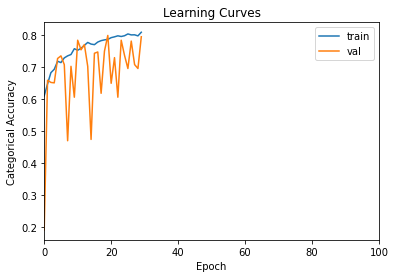

Epoch 1/100
208/208 [==============================] - 1s 4ms/step - loss: 0.9688 - categorical_accuracy: 0.6155 - val_loss: 0.9846 - val_categorical_accuracy: 0.6562
Epoch 2/100
208/208 [==============================] - 1s 3ms/step - loss: 0.8652 - categorical_accuracy: 0.6481 - val_loss: 0.7517 - val_categorical_accuracy: 0.7147
Epoch 3/100
208/208 [==============================] - 1s 4ms/step - loss: 0.8035 - categorical_accuracy: 0.6754 - val_loss: 0.8998 - val_categorical_accuracy: 0.6209
Epoch 4/100
208/208 [==============================] - 1s 3ms/step - loss: 0.7749 - categorical_accuracy: 0.6911 - val_loss: 0.8475 - val_categorical_accuracy: 0.6630
Epoch 5/100
208/208 [==============================] - 1s 4ms/step - loss: 0.7439 - categorical_accuracy: 0.7060 - val_loss: 0.6748 - val_categorical_accuracy: 0.7541
Epoch 6/100
208/208 [==============================] - 1s 3ms/step - loss: 0.7147 - categorical_accuracy: 0.7211 - val_loss: 0.6679 - val_categorical_accuracy: 0.743

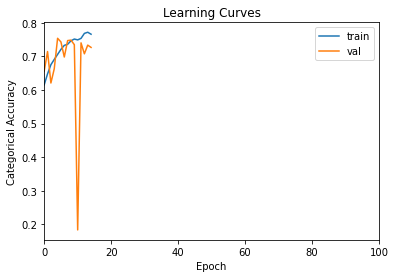

Epoch 1/100
208/208 [==============================] - 1s 4ms/step - loss: 0.9814 - categorical_accuracy: 0.6095 - val_loss: 0.9918 - val_categorical_accuracy: 0.6264
Epoch 2/100
208/208 [==============================] - 1s 4ms/step - loss: 0.8590 - categorical_accuracy: 0.6549 - val_loss: 0.8400 - val_categorical_accuracy: 0.6929
Epoch 3/100
208/208 [==============================] - 1s 4ms/step - loss: 0.8129 - categorical_accuracy: 0.6760 - val_loss: 0.9092 - val_categorical_accuracy: 0.6617
Epoch 4/100
208/208 [==============================] - 1s 4ms/step - loss: 0.7792 - categorical_accuracy: 0.6861 - val_loss: 1.7122 - val_categorical_accuracy: 0.2242
Epoch 5/100
208/208 [==============================] - 1s 3ms/step - loss: 0.7431 - categorical_accuracy: 0.7125 - val_loss: 0.9130 - val_categorical_accuracy: 0.6318
Epoch 6/100
208/208 [==============================] - 1s 4ms/step - loss: 0.7203 - categorical_accuracy: 0.7175 - val_loss: 0.6703 - val_categorical_accuracy: 0.747

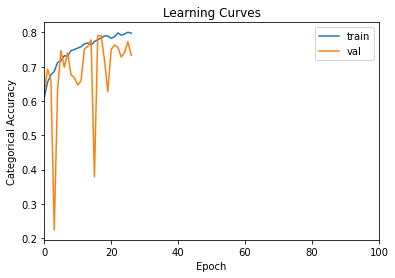

Epoch 1/100
208/208 [==============================] - 1s 4ms/step - loss: 0.9775 - categorical_accuracy: 0.6166 - val_loss: 1.1657 - val_categorical_accuracy: 0.6236
Epoch 2/100
208/208 [==============================] - 1s 3ms/step - loss: 0.8774 - categorical_accuracy: 0.6415 - val_loss: 1.5527 - val_categorical_accuracy: 0.2092
Epoch 3/100
208/208 [==============================] - 1s 4ms/step - loss: 0.8153 - categorical_accuracy: 0.6738 - val_loss: 0.8355 - val_categorical_accuracy: 0.6916
Epoch 4/100
208/208 [==============================] - 1s 4ms/step - loss: 0.7675 - categorical_accuracy: 0.7002 - val_loss: 0.9632 - val_categorical_accuracy: 0.6304
Epoch 5/100
208/208 [==============================] - 1s 3ms/step - loss: 0.7407 - categorical_accuracy: 0.7109 - val_loss: 0.8259 - val_categorical_accuracy: 0.6766
Epoch 6/100
208/208 [==============================] - 1s 3ms/step - loss: 0.7226 - categorical_accuracy: 0.7195 - val_loss: 0.7740 - val_categorical_accuracy: 0.687

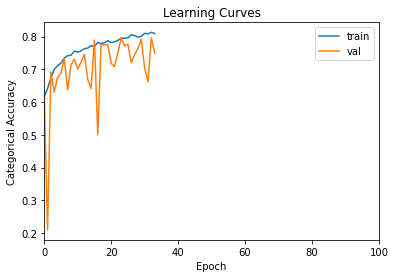

Epoch 1/100
208/208 [==============================] - 1s 4ms/step - loss: 0.9783 - categorical_accuracy: 0.6015 - val_loss: 2.0510 - val_categorical_accuracy: 0.1603
Epoch 2/100
208/208 [==============================] - 1s 3ms/step - loss: 0.8629 - categorical_accuracy: 0.6499 - val_loss: 0.8652 - val_categorical_accuracy: 0.6630
Epoch 3/100
208/208 [==============================] - 1s 4ms/step - loss: 0.8046 - categorical_accuracy: 0.6763 - val_loss: 1.3497 - val_categorical_accuracy: 0.3234
Epoch 4/100
208/208 [==============================] - 1s 3ms/step - loss: 0.7632 - categorical_accuracy: 0.6995 - val_loss: 0.8396 - val_categorical_accuracy: 0.6753
Epoch 5/100
208/208 [==============================] - 1s 4ms/step - loss: 0.7448 - categorical_accuracy: 0.7074 - val_loss: 0.7650 - val_categorical_accuracy: 0.7038
Epoch 6/100
208/208 [==============================] - 1s 3ms/step - loss: 0.7198 - categorical_accuracy: 0.7167 - val_loss: 0.8889 - val_categorical_accuracy: 0.626

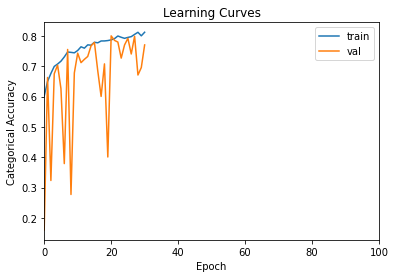

Model accuracy =  0.6678568324631369


In [35]:


accuracy = []
for i in range(5):
    # Define Model
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='tanh'),
        tf.keras.layers.Dense(4, activation='softmax')
    ])
    acc = model_NN(model, epochs=100, patience=10)
    accuracy.append(acc)

accuracy = np.median(accuracy)
print("Model accuracy = ", accuracy)

Epoch 1/100
208/208 [==============================] - 1s 5ms/step - loss: 1.1463 - categorical_accuracy: 0.5763 - val_loss: 1.2315 - val_categorical_accuracy: 0.4565
Epoch 2/100
208/208 [==============================] - 1s 4ms/step - loss: 0.8700 - categorical_accuracy: 0.6573 - val_loss: 0.9414 - val_categorical_accuracy: 0.6005
Epoch 3/100
208/208 [==============================] - 1s 4ms/step - loss: 0.7916 - categorical_accuracy: 0.6884 - val_loss: 1.0182 - val_categorical_accuracy: 0.6386
Epoch 4/100
208/208 [==============================] - 1s 4ms/step - loss: 0.7814 - categorical_accuracy: 0.6878 - val_loss: 1.3060 - val_categorical_accuracy: 0.4144
Epoch 5/100
208/208 [==============================] - 1s 4ms/step - loss: 0.7491 - categorical_accuracy: 0.7051 - val_loss: 0.8263 - val_categorical_accuracy: 0.6712
Epoch 6/100
208/208 [==============================] - 1s 4ms/step - loss: 0.7167 - categorical_accuracy: 0.7225 - val_loss: 0.6749 - val_categorical_accuracy: 0.743

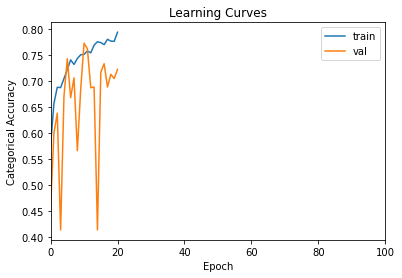

Epoch 1/100
208/208 [==============================] - 1s 4ms/step - loss: 1.1457 - categorical_accuracy: 0.5670 - val_loss: 1.1190 - val_categorical_accuracy: 0.5639
Epoch 2/100
208/208 [==============================] - 1s 3ms/step - loss: 0.8660 - categorical_accuracy: 0.6519 - val_loss: 1.0332 - val_categorical_accuracy: 0.5856
Epoch 3/100
208/208 [==============================] - 1s 4ms/step - loss: 0.8032 - categorical_accuracy: 0.6836 - val_loss: 0.7088 - val_categorical_accuracy: 0.7323
Epoch 4/100
208/208 [==============================] - 1s 4ms/step - loss: 0.7846 - categorical_accuracy: 0.6929 - val_loss: 0.7124 - val_categorical_accuracy: 0.7473
Epoch 5/100
208/208 [==============================] - 1s 3ms/step - loss: 0.7397 - categorical_accuracy: 0.7149 - val_loss: 0.7428 - val_categorical_accuracy: 0.7269
Epoch 6/100
208/208 [==============================] - 1s 3ms/step - loss: 0.7358 - categorical_accuracy: 0.7163 - val_loss: 0.7759 - val_categorical_accuracy: 0.679

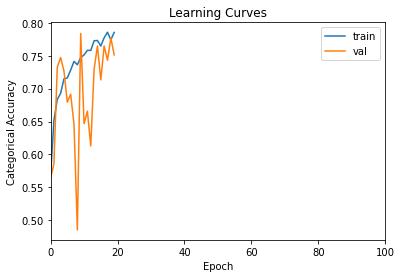

Epoch 1/100
208/208 [==============================] - 1s 4ms/step - loss: 1.1400 - categorical_accuracy: 0.5685 - val_loss: 1.3228 - val_categorical_accuracy: 0.5842
Epoch 2/100
208/208 [==============================] - 1s 4ms/step - loss: 0.8849 - categorical_accuracy: 0.6439 - val_loss: 2.6184 - val_categorical_accuracy: 0.1698
Epoch 3/100
208/208 [==============================] - 1s 4ms/step - loss: 0.8164 - categorical_accuracy: 0.6769 - val_loss: 0.9476 - val_categorical_accuracy: 0.6318
Epoch 4/100
208/208 [==============================] - 1s 4ms/step - loss: 0.7864 - categorical_accuracy: 0.6973 - val_loss: 0.7613 - val_categorical_accuracy: 0.6875
Epoch 5/100
208/208 [==============================] - 1s 4ms/step - loss: 0.7534 - categorical_accuracy: 0.7089 - val_loss: 1.0015 - val_categorical_accuracy: 0.6807
Epoch 6/100
208/208 [==============================] - 1s 4ms/step - loss: 0.7194 - categorical_accuracy: 0.7181 - val_loss: 1.1851 - val_categorical_accuracy: 0.489

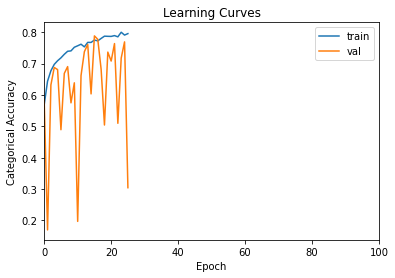

Epoch 1/100
208/208 [==============================] - 1s 4ms/step - loss: 1.1161 - categorical_accuracy: 0.5836 - val_loss: 1.0694 - val_categorical_accuracy: 0.5163
Epoch 2/100
208/208 [==============================] - 1s 3ms/step - loss: 0.8816 - categorical_accuracy: 0.6446 - val_loss: 0.8859 - val_categorical_accuracy: 0.6726
Epoch 3/100
208/208 [==============================] - 1s 3ms/step - loss: 0.8195 - categorical_accuracy: 0.6729 - val_loss: 0.9380 - val_categorical_accuracy: 0.6033
Epoch 4/100
208/208 [==============================] - 1s 4ms/step - loss: 0.7792 - categorical_accuracy: 0.6970 - val_loss: 0.7141 - val_categorical_accuracy: 0.7133
Epoch 5/100
208/208 [==============================] - 1s 3ms/step - loss: 0.7438 - categorical_accuracy: 0.7139 - val_loss: 0.8113 - val_categorical_accuracy: 0.6766
Epoch 6/100
208/208 [==============================] - 1s 4ms/step - loss: 0.7192 - categorical_accuracy: 0.7214 - val_loss: 1.1093 - val_categorical_accuracy: 0.659

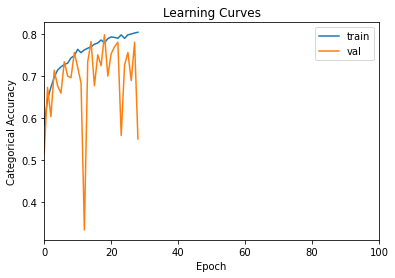

Epoch 1/100
208/208 [==============================] - 1s 4ms/step - loss: 1.1341 - categorical_accuracy: 0.5834 - val_loss: 1.4378 - val_categorical_accuracy: 0.4076
Epoch 2/100
208/208 [==============================] - 1s 3ms/step - loss: 0.8952 - categorical_accuracy: 0.6431 - val_loss: 2.8718 - val_categorical_accuracy: 0.1997
Epoch 3/100
208/208 [==============================] - 1s 3ms/step - loss: 0.8331 - categorical_accuracy: 0.6664 - val_loss: 0.9766 - val_categorical_accuracy: 0.6399
Epoch 4/100
208/208 [==============================] - 1s 4ms/step - loss: 0.7751 - categorical_accuracy: 0.6943 - val_loss: 0.7818 - val_categorical_accuracy: 0.6889
Epoch 5/100
208/208 [==============================] - 1s 4ms/step - loss: 0.7443 - categorical_accuracy: 0.7106 - val_loss: 0.7811 - val_categorical_accuracy: 0.6875
Epoch 6/100
208/208 [==============================] - 1s 4ms/step - loss: 0.7218 - categorical_accuracy: 0.7183 - val_loss: 0.7297 - val_categorical_accuracy: 0.751

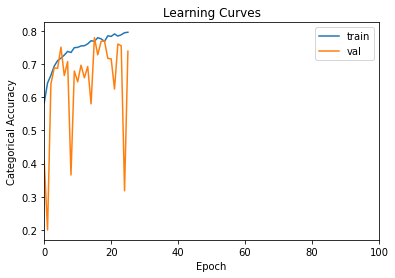

Model accuracy =  0.6051314600606077


In [36]:


accuracy = []
for i in range(5):
    # Define Model
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='selu'),
        tf.keras.layers.Dense(4, activation='softmax')
    ])
    acc = model_NN(model, epochs=100, patience=10)
    accuracy.append(acc)

accuracy = np.median(accuracy)
print("Model accuracy = ", accuracy)

Epoch 1/100
208/208 [==============================] - 1s 4ms/step - loss: 1.0216 - categorical_accuracy: 0.5962 - val_loss: 1.0252 - val_categorical_accuracy: 0.6236
Epoch 2/100
208/208 [==============================] - 1s 3ms/step - loss: 0.8660 - categorical_accuracy: 0.6529 - val_loss: 1.1165 - val_categorical_accuracy: 0.6304
Epoch 3/100
208/208 [==============================] - 1s 4ms/step - loss: 0.8099 - categorical_accuracy: 0.6796 - val_loss: 0.7688 - val_categorical_accuracy: 0.7038
Epoch 4/100
208/208 [==============================] - 1s 4ms/step - loss: 0.7561 - categorical_accuracy: 0.7015 - val_loss: 0.8068 - val_categorical_accuracy: 0.6916
Epoch 5/100
208/208 [==============================] - 1s 4ms/step - loss: 0.7462 - categorical_accuracy: 0.7050 - val_loss: 0.8730 - val_categorical_accuracy: 0.6712
Epoch 6/100
208/208 [==============================] - 1s 4ms/step - loss: 0.7167 - categorical_accuracy: 0.7190 - val_loss: 0.6625 - val_categorical_accuracy: 0.752

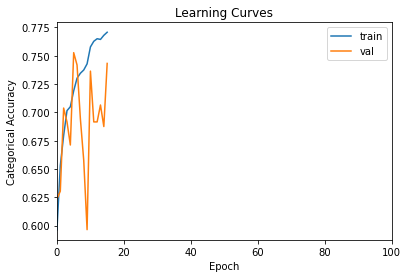

Epoch 1/100
208/208 [==============================] - 1s 4ms/step - loss: 1.0187 - categorical_accuracy: 0.6002 - val_loss: 1.0334 - val_categorical_accuracy: 0.6386
Epoch 2/100
208/208 [==============================] - 1s 3ms/step - loss: 0.8464 - categorical_accuracy: 0.6617 - val_loss: 0.9703 - val_categorical_accuracy: 0.6141
Epoch 3/100
208/208 [==============================] - 1s 3ms/step - loss: 0.8076 - categorical_accuracy: 0.6811 - val_loss: 0.8095 - val_categorical_accuracy: 0.6861
Epoch 4/100
208/208 [==============================] - 1s 4ms/step - loss: 0.7567 - categorical_accuracy: 0.6962 - val_loss: 0.8979 - val_categorical_accuracy: 0.6807
Epoch 5/100
208/208 [==============================] - 1s 4ms/step - loss: 0.7473 - categorical_accuracy: 0.7047 - val_loss: 1.1393 - val_categorical_accuracy: 0.5516
Epoch 6/100
208/208 [==============================] - 1s 4ms/step - loss: 0.7065 - categorical_accuracy: 0.7235 - val_loss: 0.8427 - val_categorical_accuracy: 0.663

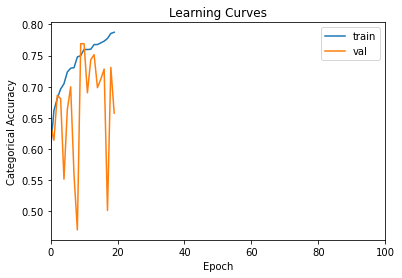

Epoch 1/100
208/208 [==============================] - 1s 4ms/step - loss: 1.0218 - categorical_accuracy: 0.6027 - val_loss: 1.1121 - val_categorical_accuracy: 0.5829
Epoch 2/100
208/208 [==============================] - 1s 3ms/step - loss: 0.8637 - categorical_accuracy: 0.6529 - val_loss: 0.8366 - val_categorical_accuracy: 0.6875
Epoch 3/100
208/208 [==============================] - 1s 3ms/step - loss: 0.8048 - categorical_accuracy: 0.6795 - val_loss: 0.9163 - val_categorical_accuracy: 0.6712
Epoch 4/100
208/208 [==============================] - 1s 4ms/step - loss: 0.7727 - categorical_accuracy: 0.6937 - val_loss: 0.7701 - val_categorical_accuracy: 0.6997
Epoch 5/100
208/208 [==============================] - 1s 4ms/step - loss: 0.7381 - categorical_accuracy: 0.7066 - val_loss: 0.7523 - val_categorical_accuracy: 0.7188
Epoch 6/100
208/208 [==============================] - 1s 3ms/step - loss: 0.7142 - categorical_accuracy: 0.7259 - val_loss: 0.7000 - val_categorical_accuracy: 0.703

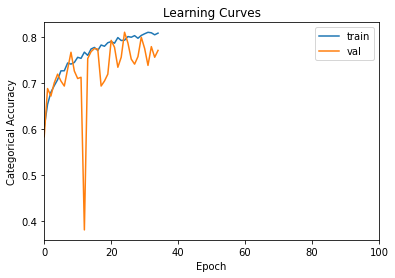

Epoch 1/100
208/208 [==============================] - 1s 4ms/step - loss: 1.0335 - categorical_accuracy: 0.5949 - val_loss: 0.9744 - val_categorical_accuracy: 0.6304
Epoch 2/100
208/208 [==============================] - 1s 3ms/step - loss: 0.8772 - categorical_accuracy: 0.6446 - val_loss: 0.7572 - val_categorical_accuracy: 0.7065
Epoch 3/100
208/208 [==============================] - 1s 3ms/step - loss: 0.8014 - categorical_accuracy: 0.6811 - val_loss: 1.9397 - val_categorical_accuracy: 0.2527
Epoch 4/100
208/208 [==============================] - 1s 4ms/step - loss: 0.7703 - categorical_accuracy: 0.6935 - val_loss: 0.9048 - val_categorical_accuracy: 0.6576
Epoch 5/100
208/208 [==============================] - 1s 3ms/step - loss: 0.7362 - categorical_accuracy: 0.7100 - val_loss: 0.6684 - val_categorical_accuracy: 0.7242
Epoch 6/100
208/208 [==============================] - 1s 3ms/step - loss: 0.7121 - categorical_accuracy: 0.7228 - val_loss: 0.7083 - val_categorical_accuracy: 0.716

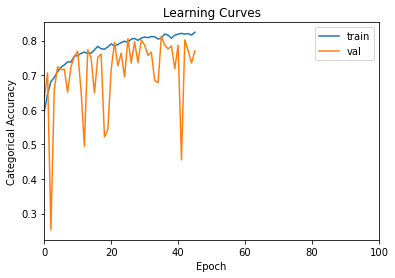

Epoch 1/100
208/208 [==============================] - 1s 4ms/step - loss: 1.0170 - categorical_accuracy: 0.5997 - val_loss: 0.9331 - val_categorical_accuracy: 0.6359
Epoch 2/100
208/208 [==============================] - 1s 3ms/step - loss: 0.8574 - categorical_accuracy: 0.6525 - val_loss: 1.3295 - val_categorical_accuracy: 0.3098
Epoch 3/100
208/208 [==============================] - 1s 3ms/step - loss: 0.8062 - categorical_accuracy: 0.6821 - val_loss: 0.7040 - val_categorical_accuracy: 0.7418
Epoch 4/100
208/208 [==============================] - 1s 3ms/step - loss: 0.7651 - categorical_accuracy: 0.6983 - val_loss: 0.8150 - val_categorical_accuracy: 0.6726
Epoch 5/100
208/208 [==============================] - 1s 3ms/step - loss: 0.7428 - categorical_accuracy: 0.7030 - val_loss: 1.2491 - val_categorical_accuracy: 0.5611
Epoch 6/100
208/208 [==============================] - 1s 3ms/step - loss: 0.7246 - categorical_accuracy: 0.7176 - val_loss: 0.6870 - val_categorical_accuracy: 0.747

Epoch 50/100
208/208 [==============================] - 1s 4ms/step - loss: 0.4774 - categorical_accuracy: 0.8262 - val_loss: 0.5213 - val_categorical_accuracy: 0.8152
Epoch 51/100
208/208 [==============================] - 1s 3ms/step - loss: 0.4748 - categorical_accuracy: 0.8268 - val_loss: 1.2448 - val_categorical_accuracy: 0.4905
Epoch 52/100
208/208 [==============================] - 1s 3ms/step - loss: 0.4782 - categorical_accuracy: 0.8229 - val_loss: 0.5425 - val_categorical_accuracy: 0.8152
Epoch 53/100
208/208 [==============================] - 1s 3ms/step - loss: 0.4697 - categorical_accuracy: 0.8264 - val_loss: 0.5020 - val_categorical_accuracy: 0.8302
Epoch 54/100
208/208 [==============================] - 1s 3ms/step - loss: 0.4714 - categorical_accuracy: 0.8235 - val_loss: 0.5019 - val_categorical_accuracy: 0.8193
Epoch 55/100
208/208 [==============================] - 1s 3ms/step - loss: 0.4646 - categorical_accuracy: 0.8315 - val_loss: 0.5657 - val_categorical_accuracy:

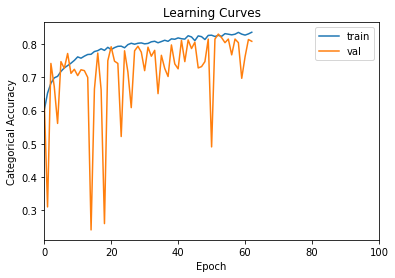

Model accuracy =  0.6664538661974602


In [37]:

accuracy = []
for i in range(5):
    # Define Model
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='elu'),
        tf.keras.layers.Dense(4, activation='softmax')
    ])
    acc = model_NN(model, epochs=100, patience=10)
    accuracy.append(acc)

accuracy = np.median(accuracy)
print("Model accuracy = ", accuracy)

Epoch 1/100
208/208 [==============================] - 1s 5ms/step - loss: 1.0384 - categorical_accuracy: 0.6009 - val_loss: 1.1243 - val_categorical_accuracy: 0.4891
Epoch 2/100
208/208 [==============================] - 1s 4ms/step - loss: 0.9605 - categorical_accuracy: 0.6158 - val_loss: 0.8980 - val_categorical_accuracy: 0.6359
Epoch 3/100
208/208 [==============================] - 1s 4ms/step - loss: 0.9024 - categorical_accuracy: 0.6338 - val_loss: 1.1730 - val_categorical_accuracy: 0.4660
Epoch 4/100
208/208 [==============================] - 1s 4ms/step - loss: 0.8595 - categorical_accuracy: 0.6599 - val_loss: 0.7571 - val_categorical_accuracy: 0.7092
Epoch 5/100
208/208 [==============================] - 1s 4ms/step - loss: 0.8297 - categorical_accuracy: 0.6774 - val_loss: 0.7379 - val_categorical_accuracy: 0.7174
Epoch 6/100
208/208 [==============================] - 1s 4ms/step - loss: 0.7995 - categorical_accuracy: 0.6811 - val_loss: 0.7189 - val_categorical_accuracy: 0.725

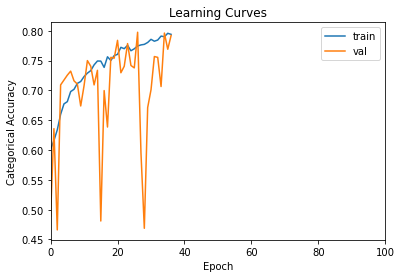

Epoch 1/100
208/208 [==============================] - 2s 6ms/step - loss: 1.0390 - categorical_accuracy: 0.5983 - val_loss: 0.9877 - val_categorical_accuracy: 0.6196
Epoch 2/100
208/208 [==============================] - 1s 4ms/step - loss: 0.9533 - categorical_accuracy: 0.6259 - val_loss: 1.0655 - val_categorical_accuracy: 0.5014
Epoch 3/100
208/208 [==============================] - 1s 4ms/step - loss: 0.9096 - categorical_accuracy: 0.6400 - val_loss: 0.8140 - val_categorical_accuracy: 0.6834
Epoch 4/100
208/208 [==============================] - 1s 4ms/step - loss: 0.8584 - categorical_accuracy: 0.6597 - val_loss: 0.8944 - val_categorical_accuracy: 0.6196
Epoch 5/100
208/208 [==============================] - 1s 4ms/step - loss: 0.8321 - categorical_accuracy: 0.6742 - val_loss: 0.9215 - val_categorical_accuracy: 0.6467
Epoch 6/100
208/208 [==============================] - 1s 4ms/step - loss: 0.8041 - categorical_accuracy: 0.6913 - val_loss: 0.8080 - val_categorical_accuracy: 0.672

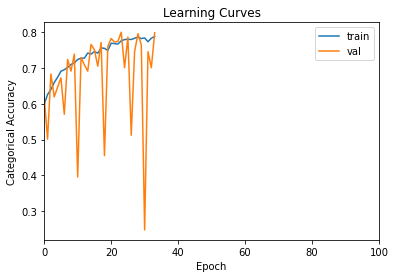

Epoch 1/100
208/208 [==============================] - 1s 5ms/step - loss: 1.0566 - categorical_accuracy: 0.5973 - val_loss: 0.9433 - val_categorical_accuracy: 0.6209
Epoch 2/100
208/208 [==============================] - 1s 4ms/step - loss: 0.9763 - categorical_accuracy: 0.6122 - val_loss: 1.0505 - val_categorical_accuracy: 0.6209
Epoch 3/100
208/208 [==============================] - 1s 4ms/step - loss: 0.9263 - categorical_accuracy: 0.6305 - val_loss: 0.8118 - val_categorical_accuracy: 0.6522
Epoch 4/100
208/208 [==============================] - 1s 4ms/step - loss: 0.8690 - categorical_accuracy: 0.6581 - val_loss: 0.8854 - val_categorical_accuracy: 0.6889
Epoch 5/100
208/208 [==============================] - 1s 4ms/step - loss: 0.8402 - categorical_accuracy: 0.6679 - val_loss: 0.8531 - val_categorical_accuracy: 0.6834
Epoch 6/100
208/208 [==============================] - 1s 4ms/step - loss: 0.8009 - categorical_accuracy: 0.6867 - val_loss: 0.7465 - val_categorical_accuracy: 0.714

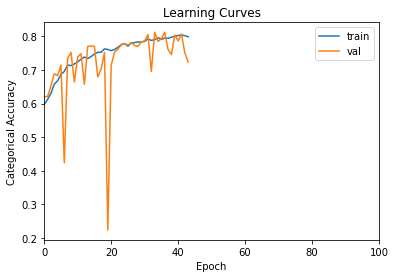

Epoch 1/100
208/208 [==============================] - 1s 4ms/step - loss: 1.0362 - categorical_accuracy: 0.5935 - val_loss: 0.9322 - val_categorical_accuracy: 0.6223
Epoch 2/100
208/208 [==============================] - 1s 4ms/step - loss: 0.9525 - categorical_accuracy: 0.6204 - val_loss: 0.8774 - val_categorical_accuracy: 0.6440
Epoch 3/100
208/208 [==============================] - 1s 4ms/step - loss: 0.9060 - categorical_accuracy: 0.6347 - val_loss: 0.8252 - val_categorical_accuracy: 0.6454
Epoch 4/100
208/208 [==============================] - 1s 4ms/step - loss: 0.8572 - categorical_accuracy: 0.6591 - val_loss: 0.7634 - val_categorical_accuracy: 0.6889
Epoch 5/100
208/208 [==============================] - 1s 4ms/step - loss: 0.8285 - categorical_accuracy: 0.6736 - val_loss: 0.9657 - val_categorical_accuracy: 0.5557
Epoch 6/100
208/208 [==============================] - 1s 4ms/step - loss: 0.7975 - categorical_accuracy: 0.6878 - val_loss: 1.0171 - val_categorical_accuracy: 0.539

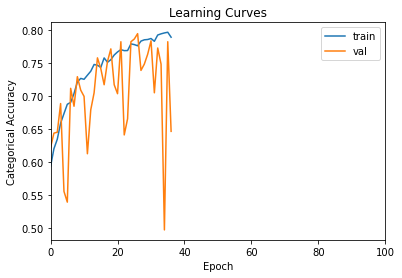

Epoch 1/100
208/208 [==============================] - 1s 5ms/step - loss: 1.0283 - categorical_accuracy: 0.6000 - val_loss: 1.0348 - val_categorical_accuracy: 0.6196
Epoch 2/100
208/208 [==============================] - 1s 5ms/step - loss: 0.9640 - categorical_accuracy: 0.6170 - val_loss: 0.9091 - val_categorical_accuracy: 0.6250
Epoch 3/100
208/208 [==============================] - 1s 5ms/step - loss: 0.9104 - categorical_accuracy: 0.6326 - val_loss: 0.8876 - val_categorical_accuracy: 0.6793
Epoch 4/100
208/208 [==============================] - 1s 4ms/step - loss: 0.8656 - categorical_accuracy: 0.6529 - val_loss: 0.8982 - val_categorical_accuracy: 0.6372
Epoch 5/100
208/208 [==============================] - 1s 4ms/step - loss: 0.8347 - categorical_accuracy: 0.6748 - val_loss: 0.7489 - val_categorical_accuracy: 0.7106
Epoch 6/100
208/208 [==============================] - 1s 4ms/step - loss: 0.7973 - categorical_accuracy: 0.6869 - val_loss: 0.8898 - val_categorical_accuracy: 0.641

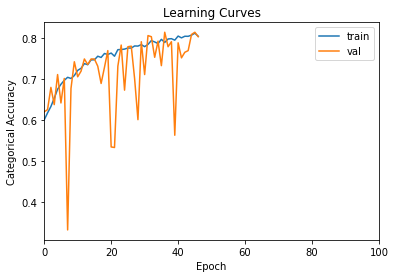

Model accuracy =  0.6319909856505046


In [38]:

accuracy = []
for i in range(5):
    # Define Model
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(50, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(4, activation='softmax')
    ])
    acc = model_NN(model, epochs=100, patience=10)
    accuracy.append(acc)

accuracy = np.median(accuracy)
print("Model accuracy = ", accuracy)

### 1.2) Multilayer Perceptrons weighted <a name="MLPweight"></a>

In [39]:
def model_NN_weighted (model, epochs, patience, weight_caucasian, weight_african, weight_asian, weight_indian):


    # Normalize the dataset
    X_train_n = X_train / 255.0

    # Cross-validation:
    x_training_set, y_training_set, x_testing_set, y_testing_set = cross_validation(X_train_n, Y_train, 0)
    
    # Convert labels into one-hot-encoding format
    y_val_ground = y_testing_set
    y_training_set = onehotencoding(y_training_set)
    y_testing_set = onehotencoding(y_testing_set)

    # Define patience
    callback = tf.keras.callbacks.EarlyStopping(monitor='val_categorical_accuracy', patience=patience, restore_best_weights=True)
    
    # Define class weights for unbalanced datasets
    class_weight = {0.0: weight_caucasian,
                1.0: weight_african,
                2.0: weight_asian,
                3.0: weight_indian}
    
    model.compile(optimizer='sgd',
                  loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
                  metrics=[tf.keras.metrics.CategoricalAccuracy()])

    history = model.fit(x_training_set, y_training_set, epochs=epochs, callbacks=[callback], class_weight=class_weight, validation_data=(x_testing_set, y_testing_set))

    test_loss, test_acc = model.evaluate(x_testing_set,  y_testing_set, verbose=2)
    
    predictions = model.predict(x_testing_set)

    # Find the class with maximum probability
    y_test = []

    for i in range(len(predictions)):
        y_test.append(np.argmax(predictions[i]))
    
    balacc = balanced_accuracy_score(y_val_ground, y_test)

    print('\nTest accuracy:', test_acc)
    print('\n Balanced accuracy:', balacc)
    
    # plot learning curves
    plt.title('Learning Curves')
    plt.xlabel('Epoch')
    plt.ylabel('Categorical Accuracy')
    plt.plot(history.history['categorical_accuracy'], label='train')
    plt.plot(history.history['val_categorical_accuracy'], label='val')
    plt.xlim([0, 100])
    plt.legend()
    plt.show()
    
    return balacc

Epoch 1/100
208/208 [==============================] - 1s 4ms/step - loss: 2.2990 - categorical_accuracy: 0.5118 - val_loss: 1.0455 - val_categorical_accuracy: 0.6209
Epoch 2/100
208/208 [==============================] - 1s 4ms/step - loss: 2.0646 - categorical_accuracy: 0.5697 - val_loss: 2.1588 - val_categorical_accuracy: 0.1875
Epoch 3/100
208/208 [==============================] - 1s 4ms/step - loss: 1.9332 - categorical_accuracy: 0.5979 - val_loss: 1.6827 - val_categorical_accuracy: 0.1209
Epoch 4/100
208/208 [==============================] - 1s 4ms/step - loss: 1.8060 - categorical_accuracy: 0.6164 - val_loss: 0.7403 - val_categorical_accuracy: 0.7201
Epoch 5/100
208/208 [==============================] - 1s 4ms/step - loss: 1.7140 - categorical_accuracy: 0.6299 - val_loss: 0.9959 - val_categorical_accuracy: 0.6236
Epoch 6/100
208/208 [==============================] - 1s 4ms/step - loss: 1.6761 - categorical_accuracy: 0.6442 - val_loss: 1.2656 - val_categorical_accuracy: 0.418

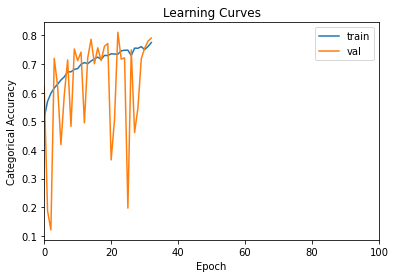

Epoch 1/100
208/208 [==============================] - 1s 4ms/step - loss: 2.2675 - categorical_accuracy: 0.5256 - val_loss: 1.8274 - val_categorical_accuracy: 0.0679
Epoch 2/100
208/208 [==============================] - 1s 4ms/step - loss: 2.0354 - categorical_accuracy: 0.5685 - val_loss: 1.0527 - val_categorical_accuracy: 0.6046
Epoch 3/100
208/208 [==============================] - 1s 4ms/step - loss: 1.8925 - categorical_accuracy: 0.5935 - val_loss: 3.1186 - val_categorical_accuracy: 0.0530
Epoch 4/100
208/208 [==============================] - 1s 4ms/step - loss: 1.8354 - categorical_accuracy: 0.6003 - val_loss: 1.8834 - val_categorical_accuracy: 0.1454
Epoch 5/100
208/208 [==============================] - 1s 4ms/step - loss: 1.6969 - categorical_accuracy: 0.6318 - val_loss: 1.1032 - val_categorical_accuracy: 0.5285
Epoch 6/100
208/208 [==============================] - 1s 4ms/step - loss: 1.6915 - categorical_accuracy: 0.6365 - val_loss: 3.1614 - val_categorical_accuracy: 0.164

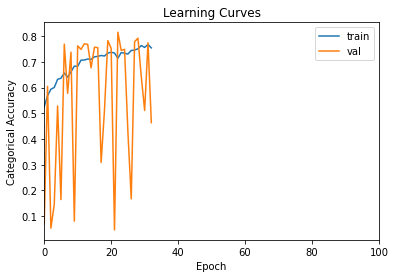

Epoch 1/100
208/208 [==============================] - 1s 4ms/step - loss: 2.2883 - categorical_accuracy: 0.5202 - val_loss: 0.9279 - val_categorical_accuracy: 0.6250
Epoch 2/100
208/208 [==============================] - 1s 4ms/step - loss: 2.0722 - categorical_accuracy: 0.5697 - val_loss: 1.1496 - val_categorical_accuracy: 0.5571
Epoch 3/100
208/208 [==============================] - 1s 4ms/step - loss: 1.9335 - categorical_accuracy: 0.5896 - val_loss: 3.4629 - val_categorical_accuracy: 0.0516
Epoch 4/100
208/208 [==============================] - 1s 4ms/step - loss: 1.8866 - categorical_accuracy: 0.5968 - val_loss: 3.7976 - val_categorical_accuracy: 0.0503
Epoch 5/100
208/208 [==============================] - 1s 4ms/step - loss: 1.7629 - categorical_accuracy: 0.6196 - val_loss: 2.1586 - val_categorical_accuracy: 0.0611
Epoch 6/100
208/208 [==============================] - 1s 4ms/step - loss: 1.6882 - categorical_accuracy: 0.6370 - val_loss: 1.0783 - val_categorical_accuracy: 0.593

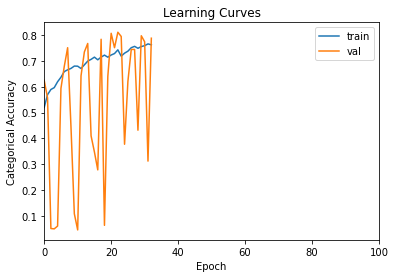

Epoch 1/100
208/208 [==============================] - 2s 6ms/step - loss: 2.2908 - categorical_accuracy: 0.5264 - val_loss: 1.8881 - val_categorical_accuracy: 0.0584
Epoch 2/100
208/208 [==============================] - 1s 4ms/step - loss: 2.0725 - categorical_accuracy: 0.5502 - val_loss: 1.9330 - val_categorical_accuracy: 0.1644
Epoch 3/100
208/208 [==============================] - 1s 4ms/step - loss: 1.9431 - categorical_accuracy: 0.5814 - val_loss: 1.8328 - val_categorical_accuracy: 0.0883
Epoch 4/100
208/208 [==============================] - 1s 4ms/step - loss: 1.7933 - categorical_accuracy: 0.6137 - val_loss: 1.9452 - val_categorical_accuracy: 0.2364
Epoch 5/100
208/208 [==============================] - 1s 4ms/step - loss: 1.7027 - categorical_accuracy: 0.6342 - val_loss: 1.5864 - val_categorical_accuracy: 0.3166
Epoch 6/100
208/208 [==============================] - 1s 4ms/step - loss: 1.6590 - categorical_accuracy: 0.6386 - val_loss: 1.1460 - val_categorical_accuracy: 0.464

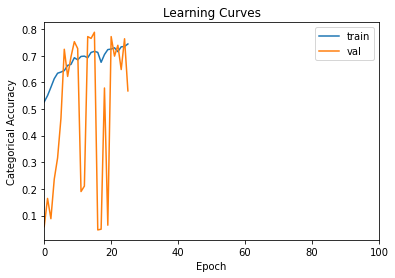

Epoch 1/100
208/208 [==============================] - 1s 4ms/step - loss: 2.2778 - categorical_accuracy: 0.5005 - val_loss: 1.0570 - val_categorical_accuracy: 0.6236
Epoch 2/100
208/208 [==============================] - 1s 4ms/step - loss: 2.0714 - categorical_accuracy: 0.5554 - val_loss: 1.0069 - val_categorical_accuracy: 0.5693
Epoch 3/100
208/208 [==============================] - 1s 4ms/step - loss: 1.9218 - categorical_accuracy: 0.5813 - val_loss: 1.0745 - val_categorical_accuracy: 0.6454
Epoch 4/100
208/208 [==============================] - 1s 4ms/step - loss: 1.8026 - categorical_accuracy: 0.6176 - val_loss: 1.2345 - val_categorical_accuracy: 0.4701
Epoch 5/100
208/208 [==============================] - 1s 4ms/step - loss: 1.7335 - categorical_accuracy: 0.6201 - val_loss: 0.9915 - val_categorical_accuracy: 0.5910
Epoch 6/100
208/208 [==============================] - 1s 4ms/step - loss: 1.6707 - categorical_accuracy: 0.6360 - val_loss: 1.1839 - val_categorical_accuracy: 0.463

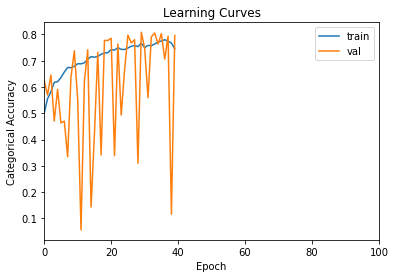

Model accuracy =  0.709543552729968


In [40]:
weight_caucasian=1/(0.6*4)
weight_african=1/(0.046*4)
weight_asian=1/(0.18*4)
weight_indian=1/(0.16*4)


accuracy = []
for i in range(5):
    # Define Model

    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(50, activation='relu'),
        tf.keras.layers.Dense(4, activation='softmax')
    ])
    acc = model_NN_weighted(model, epochs=100, patience=10, weight_caucasian=1, weight_african=10, weight_asian=2, weight_indian=2) 
    accuracy.append(acc)

accuracy = np.median(accuracy)
print("Model accuracy = ", accuracy)

Epoch 1/100
208/208 [==============================] - 1s 4ms/step - loss: 1.8887 - categorical_accuracy: 0.5744 - val_loss: 1.9529 - val_categorical_accuracy: 0.1617
Epoch 2/100
208/208 [==============================] - 1s 4ms/step - loss: 1.7293 - categorical_accuracy: 0.6047 - val_loss: 1.4741 - val_categorical_accuracy: 0.2188
Epoch 3/100
208/208 [==============================] - 1s 4ms/step - loss: 1.6073 - categorical_accuracy: 0.6335 - val_loss: 0.7218 - val_categorical_accuracy: 0.7255
Epoch 4/100
208/208 [==============================] - 1s 4ms/step - loss: 1.4985 - categorical_accuracy: 0.6516 - val_loss: 0.8390 - val_categorical_accuracy: 0.6685
Epoch 5/100
208/208 [==============================] - 1s 4ms/step - loss: 1.4614 - categorical_accuracy: 0.6671 - val_loss: 0.9520 - val_categorical_accuracy: 0.6128
Epoch 6/100
208/208 [==============================] - 1s 4ms/step - loss: 1.4251 - categorical_accuracy: 0.6747 - val_loss: 0.7671 - val_categorical_accuracy: 0.703

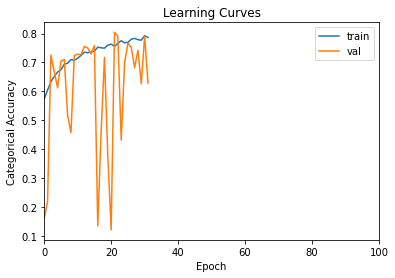

Epoch 1/100
208/208 [==============================] - 1s 4ms/step - loss: 1.9005 - categorical_accuracy: 0.5606 - val_loss: 0.9810 - val_categorical_accuracy: 0.6073
Epoch 2/100
208/208 [==============================] - 1s 4ms/step - loss: 1.7242 - categorical_accuracy: 0.6063 - val_loss: 1.5011 - val_categorical_accuracy: 0.2446
Epoch 3/100
208/208 [==============================] - 1s 4ms/step - loss: 1.6119 - categorical_accuracy: 0.6433 - val_loss: 0.7831 - val_categorical_accuracy: 0.6793
Epoch 4/100
208/208 [==============================] - 1s 4ms/step - loss: 1.5299 - categorical_accuracy: 0.6662 - val_loss: 0.9328 - val_categorical_accuracy: 0.6590
Epoch 5/100
208/208 [==============================] - 1s 4ms/step - loss: 1.4679 - categorical_accuracy: 0.6676 - val_loss: 0.8012 - val_categorical_accuracy: 0.6821
Epoch 6/100
208/208 [==============================] - 1s 4ms/step - loss: 1.4417 - categorical_accuracy: 0.6668 - val_loss: 0.7259 - val_categorical_accuracy: 0.709

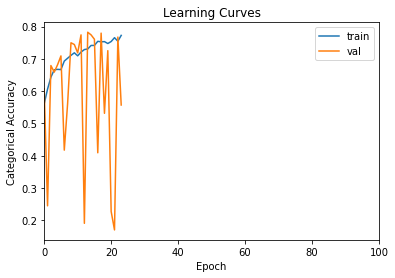

Epoch 1/100
208/208 [==============================] - 1s 4ms/step - loss: 1.9113 - categorical_accuracy: 0.5498 - val_loss: 0.9057 - val_categorical_accuracy: 0.6807
Epoch 2/100
208/208 [==============================] - 1s 4ms/step - loss: 1.6868 - categorical_accuracy: 0.6133 - val_loss: 0.7919 - val_categorical_accuracy: 0.6685
Epoch 3/100
208/208 [==============================] - 1s 4ms/step - loss: 1.5810 - categorical_accuracy: 0.6404 - val_loss: 1.3747 - val_categorical_accuracy: 0.3628
Epoch 4/100
208/208 [==============================] - 1s 4ms/step - loss: 1.5219 - categorical_accuracy: 0.6468 - val_loss: 1.1110 - val_categorical_accuracy: 0.4796
Epoch 5/100
208/208 [==============================] - 1s 4ms/step - loss: 1.4381 - categorical_accuracy: 0.6689 - val_loss: 0.6908 - val_categorical_accuracy: 0.7242
Epoch 6/100
208/208 [==============================] - 1s 4ms/step - loss: 1.4120 - categorical_accuracy: 0.6698 - val_loss: 0.9943 - val_categorical_accuracy: 0.587

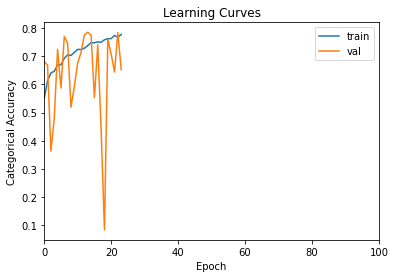

Epoch 1/100
208/208 [==============================] - 1s 4ms/step - loss: 1.9109 - categorical_accuracy: 0.5756 - val_loss: 1.9801 - val_categorical_accuracy: 0.0815
Epoch 2/100
208/208 [==============================] - 1s 4ms/step - loss: 1.7420 - categorical_accuracy: 0.5977 - val_loss: 0.8871 - val_categorical_accuracy: 0.6318
Epoch 3/100
208/208 [==============================] - 1s 4ms/step - loss: 1.5956 - categorical_accuracy: 0.6465 - val_loss: 0.8951 - val_categorical_accuracy: 0.6603
Epoch 4/100
208/208 [==============================] - 1s 4ms/step - loss: 1.5293 - categorical_accuracy: 0.6540 - val_loss: 0.8015 - val_categorical_accuracy: 0.6698
Epoch 5/100
208/208 [==============================] - 1s 4ms/step - loss: 1.4456 - categorical_accuracy: 0.6703 - val_loss: 1.0550 - val_categorical_accuracy: 0.5815
Epoch 6/100
208/208 [==============================] - 1s 4ms/step - loss: 1.3891 - categorical_accuracy: 0.6840 - val_loss: 2.8924 - val_categorical_accuracy: 0.058

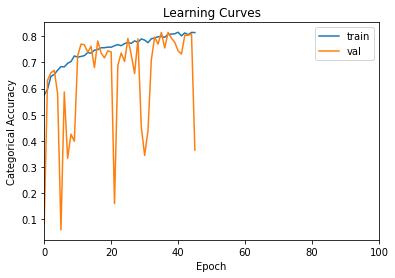

Epoch 1/100
208/208 [==============================] - 1s 4ms/step - loss: 1.9102 - categorical_accuracy: 0.5884 - val_loss: 0.9806 - val_categorical_accuracy: 0.6698
Epoch 2/100
208/208 [==============================] - 1s 4ms/step - loss: 1.7090 - categorical_accuracy: 0.6152 - val_loss: 0.9343 - val_categorical_accuracy: 0.6399
Epoch 3/100
208/208 [==============================] - 1s 4ms/step - loss: 1.6161 - categorical_accuracy: 0.6255 - val_loss: 1.3031 - val_categorical_accuracy: 0.3207
Epoch 4/100
208/208 [==============================] - 1s 4ms/step - loss: 1.5250 - categorical_accuracy: 0.6486 - val_loss: 1.3346 - val_categorical_accuracy: 0.3682
Epoch 5/100
208/208 [==============================] - 1s 4ms/step - loss: 1.4663 - categorical_accuracy: 0.6638 - val_loss: 1.4365 - val_categorical_accuracy: 0.3465
Epoch 6/100
208/208 [==============================] - 1s 4ms/step - loss: 1.4021 - categorical_accuracy: 0.6810 - val_loss: 0.6927 - val_categorical_accuracy: 0.728

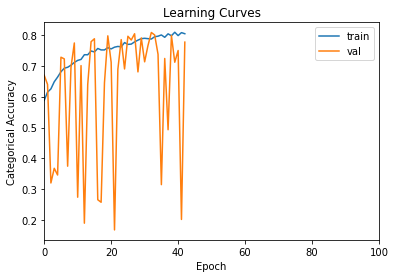

Model accuracy =  0.6863818495172378


In [41]:

accuracy = []
for i in range(5):
    # Define Model

    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(50, activation='relu'),
        tf.keras.layers.Dense(4, activation='softmax')
    ])
    acc = model_NN_weighted(model, epochs=100, patience=10, weight_caucasian=1, weight_african=5, weight_asian=2, weight_indian=2) 
    accuracy.append(acc)

accuracy = np.median(accuracy)
print("Model accuracy = ", accuracy)

## 2) Convolutional Neural Networks with Different Configurations <a name="CNN"></a>

In [11]:
#Reshape data
X_train_CNN = X_train.reshape(-1, 50, 50, 1)
X_test_CNN = X_test.reshape(-1, 50, 50, 1)
print('X_train shape: ',X_train_CNN.shape)
print('X_test shape: ',X_test_CNN.shape)

X_train_CNN = X_train_CNN.astype('float32')
X_test_CNN = X_test_CNN.astype('float32')
X_train_CNN = X_train_CNN / 255.
X_test_CNN = X_test_CNN / 255.

X_train shape:  (7366, 50, 50, 1)
X_test shape:  (1290, 50, 50, 1)


In [12]:
def model_CNN (model, epochs, batch_size, patience):
    
    # Cross-validation:
    x_training_set, y_training_set, x_testing_set, y_testing_set = cross_validation(X_train_CNN, Y_train, 0)

    print(x_training_set.shape)
    print(x_testing_set.shape)
    
    # Convert labels into one-hot-encoding format
    y_val_ground = y_testing_set
    y_training_set = onehotencoding(y_training_set)
    y_testing_set = onehotencoding(y_testing_set)
    
    callback = tf.keras.callbacks.EarlyStopping(monitor='val_categorical_accuracy', patience = patience, restore_best_weights = True)

    train = model.fit(x_training_set, y_training_set, batch_size=batch_size,epochs=epochs,verbose=1,callbacks=[callback],validation_data=(x_testing_set, y_testing_set))
    test_eval = model.evaluate(x_testing_set, y_testing_set, verbose=0)
    
    predictions = model.predict(x_testing_set)

    # Find the class with maximum probability
    y_test = []

    for i in range(len(predictions)):
        y_test.append(np.argmax(predictions[i]))
    
    balacc = balanced_accuracy_score(y_val_ground, y_test)

    print('\nTest accuracy:', test_eval)
    print('\n Balanced accuracy:', balacc)
    
    # plot learning curves
    plt.title('Learning Curves')
    plt.xlabel('Epoch')
    plt.ylabel('Categorical Accuracy')
    plt.plot(train.history['categorical_accuracy'], label='train')
    plt.plot(train.history['val_categorical_accuracy'], label='val')
    plt.xlim([0, 20])
    plt.legend()
    plt.show()
    
    return balacc

### 1st CNN model <a name="CNN1"></a>
    We will use three convolutional layers:
        -The first layer will have 32 3x3 filters,
        -The second layer will have 64 3x3 filters and
        -The third layer will have 128 3x3 filters.
    In addition, there are three max-pooling layers each of size 2 x 2.
    We add the Leaky ReLU activation function which helps the network learn non-linear decision boundaries.

(6630, 50, 50, 1)
(736, 50, 50, 1)
Epoch 1/20
104/104 [==============================] - 30s 281ms/step - loss: 0.8976 - categorical_accuracy: 0.6404 - val_loss: 0.6574 - val_categorical_accuracy: 0.7527
Epoch 2/20
104/104 [==============================] - 27s 264ms/step - loss: 0.5927 - categorical_accuracy: 0.7805 - val_loss: 0.5078 - val_categorical_accuracy: 0.8152
Epoch 3/20
104/104 [==============================] - 29s 278ms/step - loss: 0.5048 - categorical_accuracy: 0.8184 - val_loss: 0.4867 - val_categorical_accuracy: 0.8234
Epoch 4/20
104/104 [==============================] - 28s 266ms/step - loss: 0.4335 - categorical_accuracy: 0.8483 - val_loss: 0.4629 - val_categorical_accuracy: 0.8274
Epoch 5/20
104/104 [==============================] - 28s 267ms/step - loss: 0.3800 - categorical_accuracy: 0.8597 - val_loss: 0.4600 - val_categorical_accuracy: 0.8465
Epoch 6/20
104/104 [==============================] - 28s 268ms/step - loss: 0.3253 - categorical_accuracy: 0.8864 - val

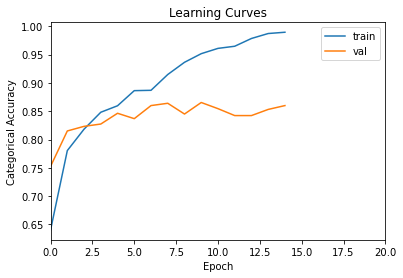

(6630, 50, 50, 1)
(736, 50, 50, 1)
Epoch 1/20
104/104 [==============================] - 28s 266ms/step - loss: 0.9555 - categorical_accuracy: 0.6276 - val_loss: 0.8275 - val_categorical_accuracy: 0.6644
Epoch 2/20
104/104 [==============================] - 27s 262ms/step - loss: 0.6332 - categorical_accuracy: 0.7597 - val_loss: 0.5447 - val_categorical_accuracy: 0.7826
Epoch 3/20
104/104 [==============================] - 27s 262ms/step - loss: 0.4971 - categorical_accuracy: 0.8161 - val_loss: 0.4746 - val_categorical_accuracy: 0.8302
Epoch 4/20
104/104 [==============================] - 28s 265ms/step - loss: 0.4227 - categorical_accuracy: 0.8505 - val_loss: 0.4429 - val_categorical_accuracy: 0.8329
Epoch 5/20
104/104 [==============================] - 28s 272ms/step - loss: 0.3816 - categorical_accuracy: 0.8603 - val_loss: 0.4816 - val_categorical_accuracy: 0.8315
Epoch 6/20
104/104 [==============================] - 27s 262ms/step - loss: 0.3252 - categorical_accuracy: 0.8837 - val

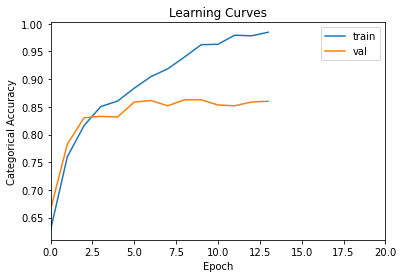

(6630, 50, 50, 1)
(736, 50, 50, 1)
Epoch 1/20
104/104 [==============================] - 28s 263ms/step - loss: 0.9369 - categorical_accuracy: 0.6303 - val_loss: 0.6740 - val_categorical_accuracy: 0.7418
Epoch 2/20
104/104 [==============================] - 27s 263ms/step - loss: 0.6430 - categorical_accuracy: 0.7564 - val_loss: 0.5913 - val_categorical_accuracy: 0.7595
Epoch 3/20
104/104 [==============================] - 27s 262ms/step - loss: 0.5409 - categorical_accuracy: 0.8012 - val_loss: 0.4991 - val_categorical_accuracy: 0.8139
Epoch 4/20
104/104 [==============================] - 28s 269ms/step - loss: 0.4557 - categorical_accuracy: 0.8362 - val_loss: 0.4487 - val_categorical_accuracy: 0.8302
Epoch 5/20
104/104 [==============================] - 27s 261ms/step - loss: 0.4193 - categorical_accuracy: 0.8505 - val_loss: 0.4390 - val_categorical_accuracy: 0.8465
Epoch 6/20
104/104 [==============================] - 27s 263ms/step - loss: 0.3565 - categorical_accuracy: 0.8709 - val

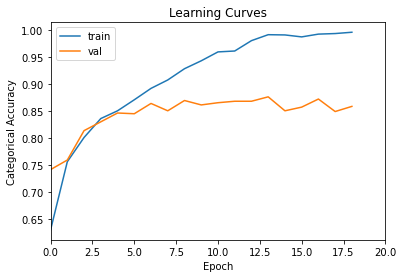

(6630, 50, 50, 1)
(736, 50, 50, 1)
Epoch 1/20
104/104 [==============================] - 28s 264ms/step - loss: 0.9508 - categorical_accuracy: 0.6249 - val_loss: 0.7084 - val_categorical_accuracy: 0.7215
Epoch 2/20
104/104 [==============================] - 29s 277ms/step - loss: 0.6440 - categorical_accuracy: 0.7587 - val_loss: 0.5352 - val_categorical_accuracy: 0.7921
Epoch 3/20
104/104 [==============================] - 28s 265ms/step - loss: 0.5380 - categorical_accuracy: 0.8041 - val_loss: 0.5636 - val_categorical_accuracy: 0.7867
Epoch 4/20
104/104 [==============================] - 27s 262ms/step - loss: 0.4560 - categorical_accuracy: 0.8371 - val_loss: 0.4760 - val_categorical_accuracy: 0.8288
Epoch 5/20
104/104 [==============================] - 28s 266ms/step - loss: 0.3938 - categorical_accuracy: 0.8596 - val_loss: 0.4745 - val_categorical_accuracy: 0.8329
Epoch 6/20
104/104 [==============================] - 28s 266ms/step - loss: 0.3503 - categorical_accuracy: 0.8757 - val

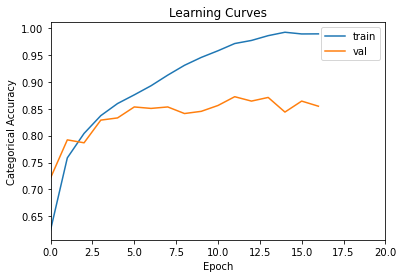

(6630, 50, 50, 1)
(736, 50, 50, 1)
Epoch 1/20
104/104 [==============================] - 28s 263ms/step - loss: 0.9853 - categorical_accuracy: 0.6170 - val_loss: 0.8463 - val_categorical_accuracy: 0.6549
Epoch 2/20
104/104 [==============================] - 28s 267ms/step - loss: 0.7065 - categorical_accuracy: 0.7296 - val_loss: 0.5868 - val_categorical_accuracy: 0.7772
Epoch 3/20
104/104 [==============================] - 28s 268ms/step - loss: 0.5586 - categorical_accuracy: 0.8029 - val_loss: 0.5097 - val_categorical_accuracy: 0.8152
Epoch 4/20
104/104 [==============================] - 27s 262ms/step - loss: 0.4837 - categorical_accuracy: 0.8303 - val_loss: 0.5164 - val_categorical_accuracy: 0.8152
Epoch 5/20
104/104 [==============================] - 28s 271ms/step - loss: 0.4281 - categorical_accuracy: 0.8483 - val_loss: 0.4850 - val_categorical_accuracy: 0.8356
Epoch 6/20
104/104 [==============================] - 28s 274ms/step - loss: 0.3781 - categorical_accuracy: 0.8629 - val

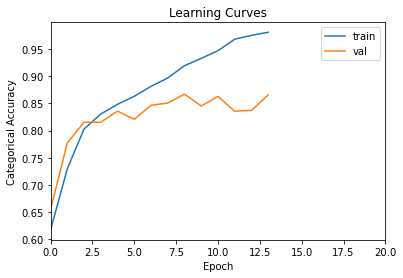

Model accuracy =  0.7580646219237025


In [10]:
#Define parameters
batch_size = 64
epochs = 20
num_classes = 4
patience = 5


accuracy = []
for i in range(5):
    
    #Define model
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(50,50,1),padding='same')) #Convolution layer
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D((2, 2),padding='same')) #Pooling layer
    model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
    model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
    model.add(LeakyReLU(alpha=0.1))                  
    model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
    model.add(Flatten())
    model.add(Dense(128, activation='linear')) #Fully connected layer
    model.add(LeakyReLU(alpha=0.1))                  
    model.add(Dense(num_classes, activation='softmax')) #Output layer

    model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False), optimizer=keras.optimizers.Adam(),metrics=['categorical_accuracy'])

    
    acc = model_CNN(model, epochs, batch_size, patience)
    accuracy.append(acc)

accuracy = np.median(accuracy)
print("Model accuracy = ", accuracy)


### 2nd CNN model<a name="CNN2"></a>
    We will use a similar approach but without the Leaky ReLu activation function.

(6630, 50, 50, 1)
(736, 50, 50, 1)
Epoch 1/20
104/104 [==============================] - 26s 242ms/step - loss: 0.8460 - categorical_accuracy: 0.6713 - val_loss: 0.6449 - val_categorical_accuracy: 0.7677
Epoch 2/20
104/104 [==============================] - 24s 235ms/step - loss: 0.5772 - categorical_accuracy: 0.7830 - val_loss: 0.4905 - val_categorical_accuracy: 0.8315
Epoch 3/20
104/104 [==============================] - 24s 234ms/step - loss: 0.4519 - categorical_accuracy: 0.8347 - val_loss: 0.4812 - val_categorical_accuracy: 0.8302
Epoch 4/20
104/104 [==============================] - 24s 235ms/step - loss: 0.3954 - categorical_accuracy: 0.8576 - val_loss: 0.4559 - val_categorical_accuracy: 0.8438
Epoch 5/20
104/104 [==============================] - 25s 240ms/step - loss: 0.3238 - categorical_accuracy: 0.8870 - val_loss: 0.4357 - val_categorical_accuracy: 0.8533
Epoch 6/20
104/104 [==============================] - 26s 251ms/step - loss: 0.2735 - categorical_accuracy: 0.9011 - val

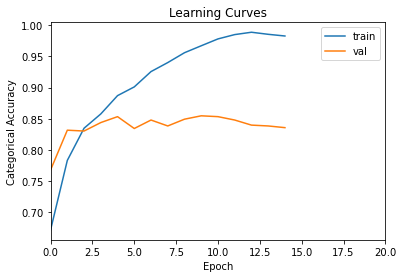

(6630, 50, 50, 1)
(736, 50, 50, 1)
Epoch 1/20
104/104 [==============================] - 25s 233ms/step - loss: 0.9762 - categorical_accuracy: 0.6199 - val_loss: 0.6824 - val_categorical_accuracy: 0.7405
Epoch 2/20
104/104 [==============================] - 25s 236ms/step - loss: 0.6345 - categorical_accuracy: 0.7640 - val_loss: 0.5412 - val_categorical_accuracy: 0.8003
Epoch 3/20
104/104 [==============================] - 24s 233ms/step - loss: 0.5257 - categorical_accuracy: 0.8097 - val_loss: 0.4893 - val_categorical_accuracy: 0.8302
Epoch 4/20
104/104 [==============================] - 24s 232ms/step - loss: 0.4713 - categorical_accuracy: 0.8320 - val_loss: 0.5017 - val_categorical_accuracy: 0.8139
Epoch 5/20
104/104 [==============================] - 24s 234ms/step - loss: 0.3944 - categorical_accuracy: 0.8605 - val_loss: 0.4481 - val_categorical_accuracy: 0.8519
Epoch 6/20
104/104 [==============================] - 24s 233ms/step - loss: 0.3550 - categorical_accuracy: 0.8751 - val

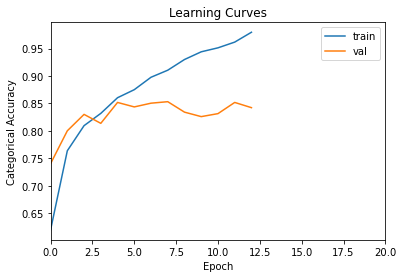

(6630, 50, 50, 1)
(736, 50, 50, 1)
Epoch 1/20
104/104 [==============================] - 25s 237ms/step - loss: 0.8922 - categorical_accuracy: 0.6496 - val_loss: 0.6532 - val_categorical_accuracy: 0.7690
Epoch 2/20
104/104 [==============================] - 24s 233ms/step - loss: 0.5952 - categorical_accuracy: 0.7836 - val_loss: 0.5119 - val_categorical_accuracy: 0.8125
Epoch 3/20
104/104 [==============================] - 24s 234ms/step - loss: 0.4921 - categorical_accuracy: 0.8158 - val_loss: 0.4644 - val_categorical_accuracy: 0.8329
Epoch 4/20
104/104 [==============================] - 24s 232ms/step - loss: 0.4145 - categorical_accuracy: 0.8531 - val_loss: 0.4254 - val_categorical_accuracy: 0.8438
Epoch 5/20
104/104 [==============================] - 24s 235ms/step - loss: 0.3583 - categorical_accuracy: 0.8719 - val_loss: 0.4702 - val_categorical_accuracy: 0.8247
Epoch 6/20
104/104 [==============================] - 24s 234ms/step - loss: 0.2938 - categorical_accuracy: 0.8946 - val

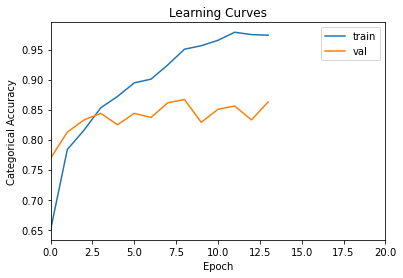

(6630, 50, 50, 1)
(736, 50, 50, 1)
Epoch 1/20
104/104 [==============================] - 25s 236ms/step - loss: 0.9077 - categorical_accuracy: 0.6585 - val_loss: 0.6448 - val_categorical_accuracy: 0.7378
Epoch 2/20
104/104 [==============================] - 24s 233ms/step - loss: 0.5919 - categorical_accuracy: 0.7814 - val_loss: 0.5151 - val_categorical_accuracy: 0.8207
Epoch 3/20
104/104 [==============================] - 24s 232ms/step - loss: 0.4896 - categorical_accuracy: 0.8207 - val_loss: 0.4958 - val_categorical_accuracy: 0.8261
Epoch 4/20
104/104 [==============================] - 24s 234ms/step - loss: 0.4172 - categorical_accuracy: 0.8508 - val_loss: 0.4616 - val_categorical_accuracy: 0.8397
Epoch 5/20
104/104 [==============================] - 24s 232ms/step - loss: 0.3666 - categorical_accuracy: 0.8649 - val_loss: 0.5176 - val_categorical_accuracy: 0.8057
Epoch 6/20
104/104 [==============================] - 24s 232ms/step - loss: 0.2969 - categorical_accuracy: 0.8943 - val

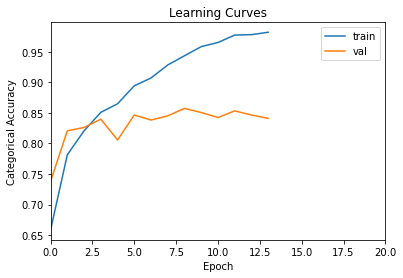

(6630, 50, 50, 1)
(736, 50, 50, 1)
Epoch 1/20
104/104 [==============================] - 25s 236ms/step - loss: 0.8761 - categorical_accuracy: 0.6573 - val_loss: 0.6161 - val_categorical_accuracy: 0.7622
Epoch 2/20
104/104 [==============================] - 24s 232ms/step - loss: 0.5977 - categorical_accuracy: 0.7765 - val_loss: 0.5135 - val_categorical_accuracy: 0.8098
Epoch 3/20
104/104 [==============================] - 24s 233ms/step - loss: 0.4906 - categorical_accuracy: 0.8192 - val_loss: 0.4805 - val_categorical_accuracy: 0.8356
Epoch 4/20
104/104 [==============================] - 24s 233ms/step - loss: 0.4161 - categorical_accuracy: 0.8517 - val_loss: 0.4459 - val_categorical_accuracy: 0.8410
Epoch 5/20
104/104 [==============================] - 24s 232ms/step - loss: 0.3493 - categorical_accuracy: 0.8747 - val_loss: 0.4278 - val_categorical_accuracy: 0.8438
Epoch 6/20
104/104 [==============================] - 24s 234ms/step - loss: 0.2997 - categorical_accuracy: 0.8920 - val

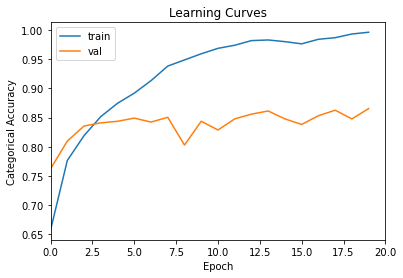

Model accuracy =  0.7430390776683109


In [11]:
#Define parameters
batch_size = 64
epochs = 20
num_classes = 4
patience = 5


accuracy = []
for i in range(5):
    #Define model
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(50,50,1),padding='same')) #Convolution layer
    model.add(MaxPooling2D((2, 2),padding='same')) #Pooling layer
    model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
    model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))                 
    model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
    model.add(Flatten())
    model.add(Dense(128, activation='linear')) #Fully connected layer                 
    model.add(Dense(num_classes, activation='softmax')) #Output layer
    model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False), optimizer=keras.optimizers.Adam(),metrics=['categorical_accuracy'])


    acc = model_CNN(model, epochs, batch_size, patience)
    accuracy.append(acc)

accuracy = np.median(accuracy)
print("Model accuracy = ", accuracy)

### 3rd CNN model<a name="CNN3"></a>
    Testing a model with only one convolutional layer and no Leaky ReLu activation function.

(6630, 50, 50, 1)
(736, 50, 50, 1)
Epoch 1/20
104/104 [==============================] - 10s 92ms/step - loss: 0.9528 - categorical_accuracy: 0.6551 - val_loss: 0.6814 - val_categorical_accuracy: 0.7310
Epoch 2/20
104/104 [==============================] - 9s 89ms/step - loss: 0.6403 - categorical_accuracy: 0.7692 - val_loss: 0.5700 - val_categorical_accuracy: 0.7948
Epoch 3/20
104/104 [==============================] - 9s 90ms/step - loss: 0.5332 - categorical_accuracy: 0.8050 - val_loss: 0.5154 - val_categorical_accuracy: 0.8111
Epoch 4/20
104/104 [==============================] - 9s 89ms/step - loss: 0.4527 - categorical_accuracy: 0.8342 - val_loss: 0.4982 - val_categorical_accuracy: 0.8247
Epoch 5/20
104/104 [==============================] - 10s 93ms/step - loss: 0.3982 - categorical_accuracy: 0.8551 - val_loss: 0.4982 - val_categorical_accuracy: 0.8261
Epoch 6/20
104/104 [==============================] - 9s 90ms/step - loss: 0.3550 - categorical_accuracy: 0.8710 - val_loss: 0.5

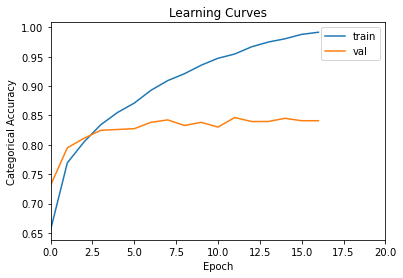

(6630, 50, 50, 1)
(736, 50, 50, 1)
Epoch 1/20
104/104 [==============================] - 10s 91ms/step - loss: 1.0813 - categorical_accuracy: 0.6238 - val_loss: 0.7084 - val_categorical_accuracy: 0.7092
Epoch 2/20
104/104 [==============================] - 9s 89ms/step - loss: 0.6735 - categorical_accuracy: 0.7468 - val_loss: 0.5940 - val_categorical_accuracy: 0.7745
Epoch 3/20
104/104 [==============================] - 9s 89ms/step - loss: 0.5741 - categorical_accuracy: 0.7830 - val_loss: 0.5423 - val_categorical_accuracy: 0.8084
Epoch 4/20
104/104 [==============================] - 9s 89ms/step - loss: 0.5140 - categorical_accuracy: 0.8078 - val_loss: 0.5178 - val_categorical_accuracy: 0.8139
Epoch 5/20
104/104 [==============================] - 9s 88ms/step - loss: 0.4596 - categorical_accuracy: 0.8339 - val_loss: 0.4991 - val_categorical_accuracy: 0.8315
Epoch 6/20
104/104 [==============================] - 9s 88ms/step - loss: 0.4041 - categorical_accuracy: 0.8551 - val_loss: 0.49

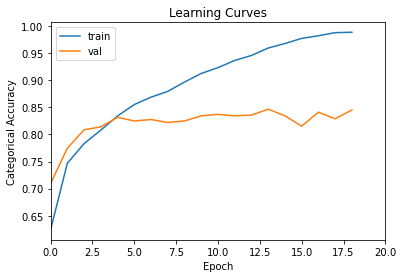

(6630, 50, 50, 1)
(736, 50, 50, 1)
Epoch 1/20
104/104 [==============================] - 10s 91ms/step - loss: 1.0932 - categorical_accuracy: 0.6024 - val_loss: 0.7881 - val_categorical_accuracy: 0.7065
Epoch 2/20
104/104 [==============================] - 9s 89ms/step - loss: 0.7149 - categorical_accuracy: 0.7235 - val_loss: 0.6032 - val_categorical_accuracy: 0.7649
Epoch 3/20
104/104 [==============================] - 9s 89ms/step - loss: 0.5761 - categorical_accuracy: 0.7858 - val_loss: 0.5453 - val_categorical_accuracy: 0.8003
Epoch 4/20
104/104 [==============================] - 9s 90ms/step - loss: 0.4922 - categorical_accuracy: 0.8178 - val_loss: 0.5194 - val_categorical_accuracy: 0.8152
Epoch 5/20
104/104 [==============================] - 9s 89ms/step - loss: 0.4456 - categorical_accuracy: 0.8376 - val_loss: 0.5096 - val_categorical_accuracy: 0.8139
Epoch 6/20
104/104 [==============================] - 9s 89ms/step - loss: 0.3990 - categorical_accuracy: 0.8529 - val_loss: 0.50

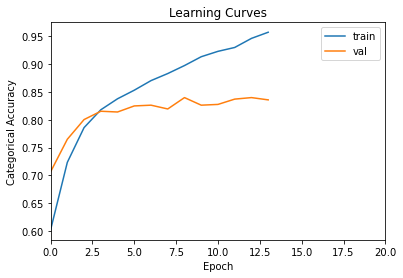

(6630, 50, 50, 1)
(736, 50, 50, 1)
Epoch 1/20
104/104 [==============================] - 10s 94ms/step - loss: 1.0716 - categorical_accuracy: 0.6243 - val_loss: 0.6990 - val_categorical_accuracy: 0.7201
Epoch 2/20
104/104 [==============================] - 9s 88ms/step - loss: 0.6557 - categorical_accuracy: 0.7555 - val_loss: 0.5696 - val_categorical_accuracy: 0.7948
Epoch 3/20
104/104 [==============================] - 9s 88ms/step - loss: 0.5459 - categorical_accuracy: 0.8006 - val_loss: 0.5132 - val_categorical_accuracy: 0.8125
Epoch 4/20
104/104 [==============================] - 9s 89ms/step - loss: 0.4599 - categorical_accuracy: 0.8351 - val_loss: 0.4967 - val_categorical_accuracy: 0.8139
Epoch 5/20
104/104 [==============================] - 9s 88ms/step - loss: 0.4082 - categorical_accuracy: 0.8520 - val_loss: 0.4787 - val_categorical_accuracy: 0.8274
Epoch 6/20
104/104 [==============================] - 9s 88ms/step - loss: 0.3515 - categorical_accuracy: 0.8739 - val_loss: 0.46

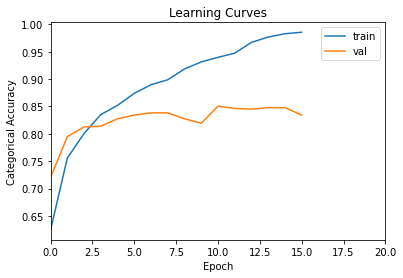

(6630, 50, 50, 1)
(736, 50, 50, 1)
Epoch 1/20
104/104 [==============================] - 10s 91ms/step - loss: 0.9968 - categorical_accuracy: 0.6321 - val_loss: 0.7003 - val_categorical_accuracy: 0.7378
Epoch 2/20
104/104 [==============================] - 9s 91ms/step - loss: 0.6517 - categorical_accuracy: 0.7557 - val_loss: 0.5714 - val_categorical_accuracy: 0.7799
Epoch 3/20
104/104 [==============================] - 10s 93ms/step - loss: 0.5341 - categorical_accuracy: 0.8038 - val_loss: 0.5061 - val_categorical_accuracy: 0.8139
Epoch 4/20
104/104 [==============================] - 9s 89ms/step - loss: 0.4678 - categorical_accuracy: 0.8279 - val_loss: 0.5117 - val_categorical_accuracy: 0.8125
Epoch 5/20
104/104 [==============================] - 9s 90ms/step - loss: 0.4141 - categorical_accuracy: 0.8496 - val_loss: 0.4882 - val_categorical_accuracy: 0.8193
Epoch 6/20
104/104 [==============================] - 9s 90ms/step - loss: 0.3608 - categorical_accuracy: 0.8738 - val_loss: 0.4

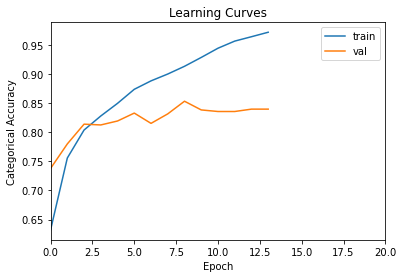

Model accuracy =  0.7491562114642913


In [12]:
#Define parameters
batch_size = 64
epochs = 20
num_classes = 4
patience = 5

accuracy = []
for i in range(5):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(50,50,1),padding='same'))
    model.add(MaxPooling2D((2, 2),padding='same'))
    model.add(Flatten())
    model.add(Dense(128, activation='linear'))
    model.add(LeakyReLU(alpha=0.1))                  
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False), optimizer=keras.optimizers.Adam(),metrics=['categorical_accuracy'])


    acc = model_CNN(model, epochs, batch_size, patience)
    accuracy.append(acc)

accuracy = np.median(accuracy)
print("Model accuracy = ", accuracy)

### 4th CNN model <a name="CNN4"></a>
    We will use two convolutional layers:
        -The first layer will have 32 3x3 filters,
        -The second layer will have 64 3x3 filters and
    In addition, there are three max-pooling layers each of size 2 x 2.
    We add the Leaky ReLU activation function which helps the network learn non-linear decision boundaries.

(6630, 50, 50, 1)
(736, 50, 50, 1)
Epoch 1/20
104/104 [==============================] - 21s 194ms/step - loss: 0.9439 - categorical_accuracy: 0.6323 - val_loss: 0.7514 - val_categorical_accuracy: 0.6997
Epoch 2/20
104/104 [==============================] - 20s 194ms/step - loss: 0.6424 - categorical_accuracy: 0.7624 - val_loss: 0.5948 - val_categorical_accuracy: 0.7840
Epoch 3/20
104/104 [==============================] - 20s 194ms/step - loss: 0.5321 - categorical_accuracy: 0.8035 - val_loss: 0.5210 - val_categorical_accuracy: 0.8071
Epoch 4/20
104/104 [==============================] - 20s 194ms/step - loss: 0.4729 - categorical_accuracy: 0.8302 - val_loss: 0.4748 - val_categorical_accuracy: 0.8261
Epoch 5/20
104/104 [==============================] - 20s 196ms/step - loss: 0.4115 - categorical_accuracy: 0.8554 - val_loss: 0.4574 - val_categorical_accuracy: 0.8302
Epoch 6/20
104/104 [==============================] - 21s 198ms/step - loss: 0.3571 - categorical_accuracy: 0.8697 - val

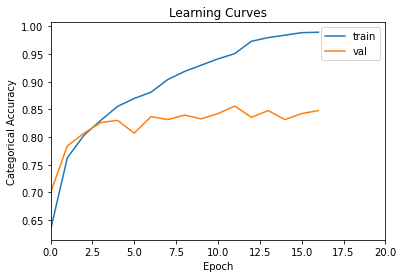

(6630, 50, 50, 1)
(736, 50, 50, 1)
Epoch 1/20
104/104 [==============================] - 21s 195ms/step - loss: 0.9230 - categorical_accuracy: 0.6389 - val_loss: 0.7075 - val_categorical_accuracy: 0.7120
Epoch 2/20
104/104 [==============================] - 20s 194ms/step - loss: 0.6178 - categorical_accuracy: 0.7712 - val_loss: 0.5482 - val_categorical_accuracy: 0.8030
Epoch 3/20
104/104 [==============================] - 20s 194ms/step - loss: 0.4971 - categorical_accuracy: 0.8220 - val_loss: 0.5293 - val_categorical_accuracy: 0.8071
Epoch 4/20
104/104 [==============================] - 20s 194ms/step - loss: 0.4392 - categorical_accuracy: 0.8431 - val_loss: 0.4866 - val_categorical_accuracy: 0.8288
Epoch 5/20
104/104 [==============================] - 20s 195ms/step - loss: 0.3834 - categorical_accuracy: 0.8573 - val_loss: 0.4628 - val_categorical_accuracy: 0.8342
Epoch 6/20
104/104 [==============================] - 20s 194ms/step - loss: 0.3342 - categorical_accuracy: 0.8801 - val

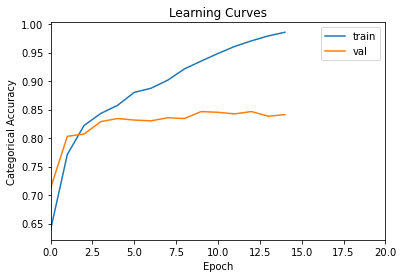

(6630, 50, 50, 1)
(736, 50, 50, 1)
Epoch 1/20
104/104 [==============================] - 21s 196ms/step - loss: 0.8756 - categorical_accuracy: 0.6640 - val_loss: 0.6393 - val_categorical_accuracy: 0.7595
Epoch 2/20
104/104 [==============================] - 20s 195ms/step - loss: 0.5560 - categorical_accuracy: 0.7953 - val_loss: 0.5157 - val_categorical_accuracy: 0.8071
Epoch 3/20
104/104 [==============================] - 20s 194ms/step - loss: 0.4462 - categorical_accuracy: 0.8395 - val_loss: 0.4797 - val_categorical_accuracy: 0.8302
Epoch 4/20
104/104 [==============================] - 20s 194ms/step - loss: 0.3911 - categorical_accuracy: 0.8599 - val_loss: 0.4535 - val_categorical_accuracy: 0.8383
Epoch 5/20
104/104 [==============================] - 20s 195ms/step - loss: 0.3435 - categorical_accuracy: 0.8754 - val_loss: 0.4433 - val_categorical_accuracy: 0.8410
Epoch 6/20
104/104 [==============================] - 20s 195ms/step - loss: 0.2975 - categorical_accuracy: 0.8928 - val

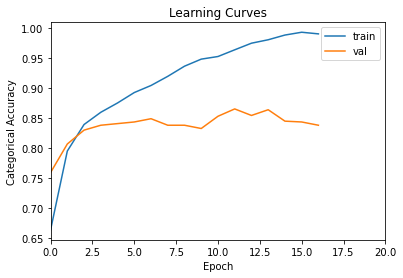

(6630, 50, 50, 1)
(736, 50, 50, 1)
Epoch 1/20
104/104 [==============================] - 21s 199ms/step - loss: 0.9007 - categorical_accuracy: 0.6481 - val_loss: 0.8531 - val_categorical_accuracy: 0.6807
Epoch 2/20
104/104 [==============================] - 20s 196ms/step - loss: 0.6161 - categorical_accuracy: 0.7759 - val_loss: 0.5326 - val_categorical_accuracy: 0.8152
Epoch 3/20
104/104 [==============================] - 20s 195ms/step - loss: 0.4821 - categorical_accuracy: 0.8253 - val_loss: 0.5103 - val_categorical_accuracy: 0.8125
Epoch 4/20
104/104 [==============================] - 20s 197ms/step - loss: 0.4409 - categorical_accuracy: 0.8416 - val_loss: 0.5523 - val_categorical_accuracy: 0.8043
Epoch 5/20
104/104 [==============================] - 21s 200ms/step - loss: 0.3837 - categorical_accuracy: 0.8572 - val_loss: 0.4904 - val_categorical_accuracy: 0.8234
Epoch 6/20
104/104 [==============================] - 21s 202ms/step - loss: 0.3432 - categorical_accuracy: 0.8781 - val

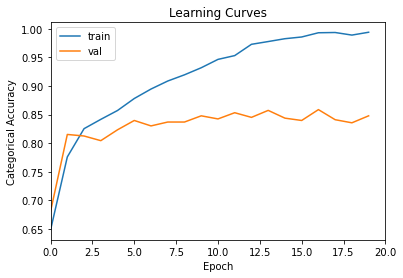

(6630, 50, 50, 1)
(736, 50, 50, 1)
Epoch 1/20
104/104 [==============================] - 21s 194ms/step - loss: 0.8925 - categorical_accuracy: 0.6552 - val_loss: 0.6670 - val_categorical_accuracy: 0.7541
Epoch 2/20
104/104 [==============================] - 20s 192ms/step - loss: 0.6043 - categorical_accuracy: 0.7769 - val_loss: 0.5474 - val_categorical_accuracy: 0.7921
Epoch 3/20
104/104 [==============================] - 20s 193ms/step - loss: 0.4912 - categorical_accuracy: 0.8216 - val_loss: 0.5706 - val_categorical_accuracy: 0.7989
Epoch 4/20
104/104 [==============================] - 20s 194ms/step - loss: 0.4306 - categorical_accuracy: 0.8446 - val_loss: 0.4894 - val_categorical_accuracy: 0.8329
Epoch 5/20
104/104 [==============================] - 20s 193ms/step - loss: 0.3854 - categorical_accuracy: 0.8563 - val_loss: 0.4947 - val_categorical_accuracy: 0.8424
Epoch 6/20
104/104 [==============================] - 20s 193ms/step - loss: 0.3331 - categorical_accuracy: 0.8792 - val

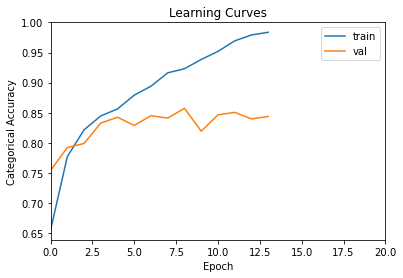

Model accuracy =  0.7479660456678211


In [13]:
#Define parameters
batch_size = 64
epochs = 20
num_classes = 4
patience = 5

accuracy = []
for i in range(5):
    #Define model
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(50,50,1),padding='same')) #Convolution layer
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D((2, 2),padding='same')) #Pooling layer
    model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

    model.add(Flatten())
    model.add(Dense(128, activation='linear')) #Fully connected layer
    model.add(LeakyReLU(alpha=0.1))                  
    model.add(Dense(num_classes, activation='softmax')) #Output layer

    model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False), optimizer=keras.optimizers.Adam(),metrics=['categorical_accuracy'])

    
    acc = model_CNN(model, epochs, batch_size, patience)
    accuracy.append(acc)

accuracy = np.median(accuracy)
print("Model accuracy = ", accuracy)

### 5th CNN model <a name="CNN4"></a>
    We will use two convolutional layers, changing the dimension of the filters.

    In addition, there are three max-pooling layers each of size 2 x 2.
    We add the Leaky ReLU activation function which helps the network learn non-linear decision boundaries.

(6630, 50, 50, 1)
(736, 50, 50, 1)
Epoch 1/20
104/104 [==============================] - 20s 190ms/step - loss: 0.9062 - categorical_accuracy: 0.6427 - val_loss: 0.7070 - val_categorical_accuracy: 0.7405
Epoch 2/20
104/104 [==============================] - 20s 188ms/step - loss: 0.6022 - categorical_accuracy: 0.7787 - val_loss: 0.5440 - val_categorical_accuracy: 0.8030
Epoch 3/20
104/104 [==============================] - 20s 189ms/step - loss: 0.4975 - categorical_accuracy: 0.8196 - val_loss: 0.5074 - val_categorical_accuracy: 0.8098
Epoch 4/20
104/104 [==============================] - 20s 189ms/step - loss: 0.4392 - categorical_accuracy: 0.8391 - val_loss: 0.5252 - val_categorical_accuracy: 0.8179
Epoch 5/20
104/104 [==============================] - 20s 190ms/step - loss: 0.3958 - categorical_accuracy: 0.8600 - val_loss: 0.4697 - val_categorical_accuracy: 0.8410
Epoch 6/20
104/104 [==============================] - 20s 189ms/step - loss: 0.3470 - categorical_accuracy: 0.8753 - val

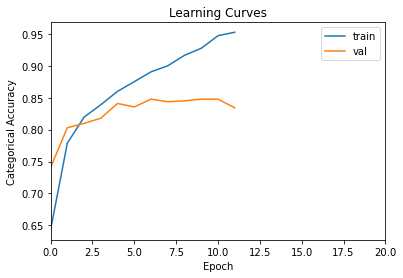

(6630, 50, 50, 1)
(736, 50, 50, 1)
Epoch 1/20
104/104 [==============================] - 20s 188ms/step - loss: 0.9232 - categorical_accuracy: 0.6394 - val_loss: 0.7014 - val_categorical_accuracy: 0.7310
Epoch 2/20
104/104 [==============================] - 20s 188ms/step - loss: 0.6391 - categorical_accuracy: 0.7560 - val_loss: 0.6184 - val_categorical_accuracy: 0.7812
Epoch 3/20
104/104 [==============================] - 20s 190ms/step - loss: 0.5336 - categorical_accuracy: 0.8087 - val_loss: 0.5639 - val_categorical_accuracy: 0.8071
Epoch 4/20
104/104 [==============================] - 20s 189ms/step - loss: 0.4643 - categorical_accuracy: 0.8335 - val_loss: 0.4935 - val_categorical_accuracy: 0.8288
Epoch 5/20
104/104 [==============================] - 20s 190ms/step - loss: 0.4157 - categorical_accuracy: 0.8516 - val_loss: 0.5592 - val_categorical_accuracy: 0.8071
Epoch 6/20
104/104 [==============================] - 20s 190ms/step - loss: 0.3729 - categorical_accuracy: 0.8667 - val

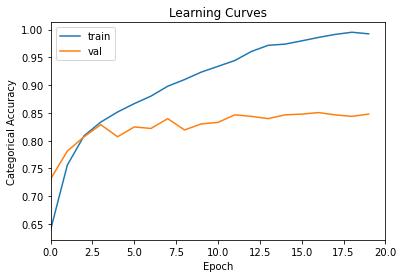

(6630, 50, 50, 1)
(736, 50, 50, 1)
Epoch 1/20
104/104 [==============================] - 22s 206ms/step - loss: 0.8883 - categorical_accuracy: 0.6532 - val_loss: 0.7171 - val_categorical_accuracy: 0.7106
Epoch 2/20
104/104 [==============================] - 20s 191ms/step - loss: 0.6123 - categorical_accuracy: 0.7744 - val_loss: 0.5458 - val_categorical_accuracy: 0.7976
Epoch 3/20
104/104 [==============================] - 20s 188ms/step - loss: 0.4920 - categorical_accuracy: 0.8238 - val_loss: 0.4989 - val_categorical_accuracy: 0.8261
Epoch 4/20
104/104 [==============================] - 20s 189ms/step - loss: 0.4281 - categorical_accuracy: 0.8472 - val_loss: 0.5843 - val_categorical_accuracy: 0.7853
Epoch 5/20
104/104 [==============================] - 20s 188ms/step - loss: 0.3905 - categorical_accuracy: 0.8618 - val_loss: 0.4681 - val_categorical_accuracy: 0.8302
Epoch 6/20
104/104 [==============================] - 20s 189ms/step - loss: 0.3395 - categorical_accuracy: 0.8787 - val

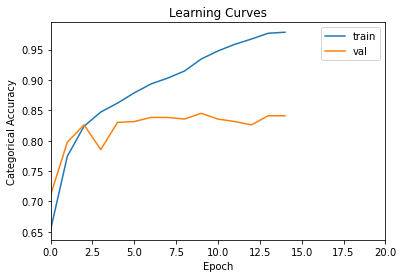

(6630, 50, 50, 1)
(736, 50, 50, 1)
Epoch 1/20
104/104 [==============================] - 20s 189ms/step - loss: 0.8949 - categorical_accuracy: 0.6487 - val_loss: 0.6494 - val_categorical_accuracy: 0.7554
Epoch 2/20
104/104 [==============================] - 20s 188ms/step - loss: 0.6139 - categorical_accuracy: 0.7721 - val_loss: 0.5359 - val_categorical_accuracy: 0.8030
Epoch 3/20
104/104 [==============================] - 20s 188ms/step - loss: 0.5023 - categorical_accuracy: 0.8199 - val_loss: 0.5504 - val_categorical_accuracy: 0.7867
Epoch 4/20
104/104 [==============================] - 20s 189ms/step - loss: 0.4432 - categorical_accuracy: 0.8376 - val_loss: 0.5592 - val_categorical_accuracy: 0.7989
Epoch 5/20
104/104 [==============================] - 20s 189ms/step - loss: 0.4173 - categorical_accuracy: 0.8474 - val_loss: 0.4627 - val_categorical_accuracy: 0.8302
Epoch 6/20
104/104 [==============================] - 20s 190ms/step - loss: 0.3594 - categorical_accuracy: 0.8719 - val

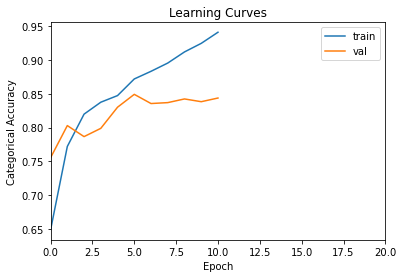

(6630, 50, 50, 1)
(736, 50, 50, 1)
Epoch 1/20
104/104 [==============================] - 20s 188ms/step - loss: 0.8696 - categorical_accuracy: 0.6593 - val_loss: 0.6945 - val_categorical_accuracy: 0.6984
Epoch 2/20
104/104 [==============================] - 20s 191ms/step - loss: 0.6088 - categorical_accuracy: 0.7768 - val_loss: 0.6036 - val_categorical_accuracy: 0.7582
Epoch 3/20
104/104 [==============================] - 20s 190ms/step - loss: 0.4935 - categorical_accuracy: 0.8268 - val_loss: 0.5062 - val_categorical_accuracy: 0.8152
Epoch 4/20
104/104 [==============================] - 20s 189ms/step - loss: 0.4327 - categorical_accuracy: 0.8454 - val_loss: 0.4680 - val_categorical_accuracy: 0.8342
Epoch 5/20
104/104 [==============================] - 20s 189ms/step - loss: 0.3869 - categorical_accuracy: 0.8630 - val_loss: 0.4785 - val_categorical_accuracy: 0.8274
Epoch 6/20
104/104 [==============================] - 20s 190ms/step - loss: 0.3525 - categorical_accuracy: 0.8706 - val

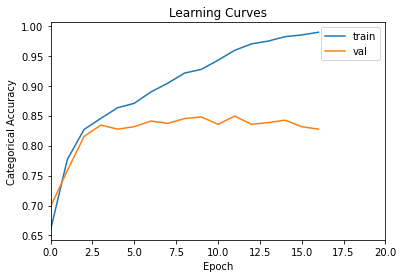

Model accuracy =  0.7277619580950132


In [14]:
#Define parameters
batch_size = 64
epochs = 20
num_classes = 4
patience = 5


accuracy = []
for i in range(5):
    
    #Define model
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(2, 2),activation='linear',input_shape=(50,50,1),padding='same')) #Convolution layer
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D((2, 2),padding='same')) #Pooling layer
    
    model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

    model.add(Flatten())
    model.add(Dense(128, activation='linear')) #Fully connected layer
    model.add(LeakyReLU(alpha=0.1))                  
    model.add(Dense(num_classes, activation='softmax')) #Output layer

    model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False), optimizer=keras.optimizers.Adam(),metrics=['categorical_accuracy'])

    
    acc = model_CNN(model, epochs, batch_size, patience)
    accuracy.append(acc)

accuracy = np.median(accuracy)
print("Model accuracy = ", accuracy)


(6630, 50, 50, 1)
(736, 50, 50, 1)
Epoch 1/20
104/104 [==============================] - 22s 203ms/step - loss: 0.9330 - categorical_accuracy: 0.6389 - val_loss: 0.7880 - val_categorical_accuracy: 0.7011
Epoch 2/20
104/104 [==============================] - 21s 201ms/step - loss: 0.6390 - categorical_accuracy: 0.7599 - val_loss: 0.5299 - val_categorical_accuracy: 0.8139
Epoch 3/20
104/104 [==============================] - 21s 203ms/step - loss: 0.4981 - categorical_accuracy: 0.8198 - val_loss: 0.5308 - val_categorical_accuracy: 0.8043
Epoch 4/20
104/104 [==============================] - 21s 202ms/step - loss: 0.4330 - categorical_accuracy: 0.8419 - val_loss: 0.4660 - val_categorical_accuracy: 0.8342
Epoch 5/20
104/104 [==============================] - 21s 203ms/step - loss: 0.3711 - categorical_accuracy: 0.8695 - val_loss: 0.4588 - val_categorical_accuracy: 0.8451
Epoch 6/20
104/104 [==============================] - 21s 203ms/step - loss: 0.3208 - categorical_accuracy: 0.8899 - val

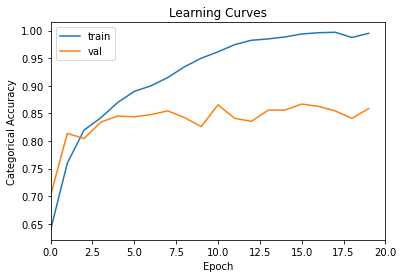

(6630, 50, 50, 1)
(736, 50, 50, 1)
Epoch 1/20
104/104 [==============================] - 21s 202ms/step - loss: 0.9030 - categorical_accuracy: 0.6472 - val_loss: 0.6757 - val_categorical_accuracy: 0.7432
Epoch 2/20
104/104 [==============================] - 21s 201ms/step - loss: 0.5840 - categorical_accuracy: 0.7879 - val_loss: 0.5358 - val_categorical_accuracy: 0.8125
Epoch 3/20
104/104 [==============================] - 21s 202ms/step - loss: 0.4878 - categorical_accuracy: 0.8246 - val_loss: 0.5161 - val_categorical_accuracy: 0.8125
Epoch 4/20
104/104 [==============================] - 21s 203ms/step - loss: 0.4424 - categorical_accuracy: 0.8356 - val_loss: 0.4618 - val_categorical_accuracy: 0.8315
Epoch 5/20
104/104 [==============================] - 21s 205ms/step - loss: 0.3891 - categorical_accuracy: 0.8587 - val_loss: 0.4480 - val_categorical_accuracy: 0.8410
Epoch 6/20
104/104 [==============================] - 21s 204ms/step - loss: 0.3222 - categorical_accuracy: 0.8827 - val

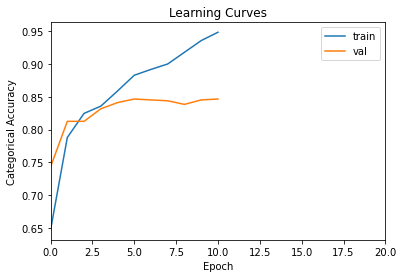

(6630, 50, 50, 1)
(736, 50, 50, 1)
Epoch 1/20
104/104 [==============================] - 22s 204ms/step - loss: 0.8998 - categorical_accuracy: 0.6456 - val_loss: 0.6806 - val_categorical_accuracy: 0.7418
Epoch 2/20
104/104 [==============================] - 21s 201ms/step - loss: 0.6039 - categorical_accuracy: 0.7763 - val_loss: 0.5538 - val_categorical_accuracy: 0.7962
Epoch 3/20
104/104 [==============================] - 21s 204ms/step - loss: 0.5044 - categorical_accuracy: 0.8145 - val_loss: 0.4908 - val_categorical_accuracy: 0.8207
Epoch 4/20
104/104 [==============================] - 21s 201ms/step - loss: 0.4305 - categorical_accuracy: 0.8466 - val_loss: 0.4789 - val_categorical_accuracy: 0.8302
Epoch 5/20
104/104 [==============================] - 21s 201ms/step - loss: 0.3792 - categorical_accuracy: 0.8630 - val_loss: 0.4783 - val_categorical_accuracy: 0.8410
Epoch 6/20
104/104 [==============================] - 21s 201ms/step - loss: 0.3369 - categorical_accuracy: 0.8787 - val

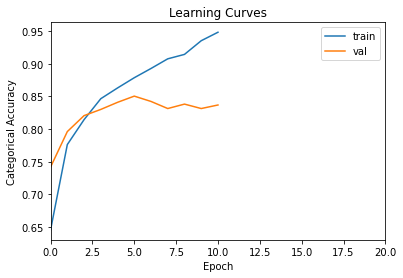

(6630, 50, 50, 1)
(736, 50, 50, 1)
Epoch 1/20
104/104 [==============================] - 21s 201ms/step - loss: 0.9127 - categorical_accuracy: 0.6449 - val_loss: 0.6528 - val_categorical_accuracy: 0.7500
Epoch 2/20
104/104 [==============================] - 21s 201ms/step - loss: 0.6125 - categorical_accuracy: 0.7750 - val_loss: 0.6035 - val_categorical_accuracy: 0.7935
Epoch 3/20
104/104 [==============================] - 21s 200ms/step - loss: 0.4964 - categorical_accuracy: 0.8199 - val_loss: 0.5123 - val_categorical_accuracy: 0.8084
Epoch 4/20
104/104 [==============================] - 21s 202ms/step - loss: 0.4089 - categorical_accuracy: 0.8498 - val_loss: 0.4669 - val_categorical_accuracy: 0.8274
Epoch 5/20
104/104 [==============================] - 21s 200ms/step - loss: 0.3667 - categorical_accuracy: 0.8691 - val_loss: 0.4444 - val_categorical_accuracy: 0.8465
Epoch 6/20
104/104 [==============================] - 21s 202ms/step - loss: 0.3113 - categorical_accuracy: 0.8864 - val

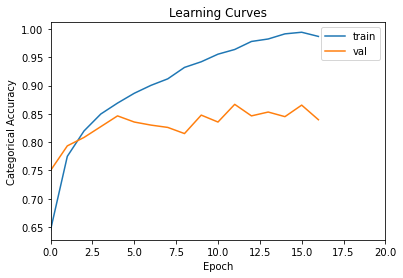

(6630, 50, 50, 1)
(736, 50, 50, 1)
Epoch 1/20
104/104 [==============================] - 21s 202ms/step - loss: 0.8705 - categorical_accuracy: 0.6573 - val_loss: 0.6296 - val_categorical_accuracy: 0.7391
Epoch 2/20
104/104 [==============================] - 21s 201ms/step - loss: 0.5911 - categorical_accuracy: 0.7824 - val_loss: 0.5210 - val_categorical_accuracy: 0.8152
Epoch 3/20
104/104 [==============================] - 21s 199ms/step - loss: 0.4894 - categorical_accuracy: 0.8235 - val_loss: 0.4865 - val_categorical_accuracy: 0.8274
Epoch 4/20
104/104 [==============================] - 23s 218ms/step - loss: 0.4333 - categorical_accuracy: 0.8434 - val_loss: 0.4575 - val_categorical_accuracy: 0.8342
Epoch 5/20
104/104 [==============================] - 21s 200ms/step - loss: 0.3791 - categorical_accuracy: 0.8621 - val_loss: 0.4577 - val_categorical_accuracy: 0.8383
Epoch 6/20
104/104 [==============================] - 21s 203ms/step - loss: 0.3417 - categorical_accuracy: 0.8781 - val

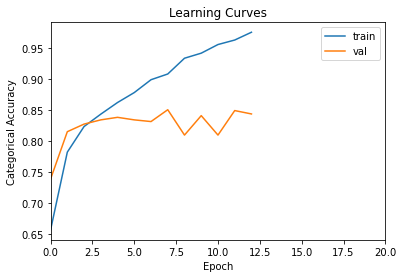

Model accuracy =  0.7494922373777789


In [15]:
#Define parameters
batch_size = 64
epochs = 20
num_classes = 4
patience = 5


accuracy = []
for i in range(5):
    
    #Define model
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(4, 4),activation='linear',input_shape=(50,50,1),padding='same')) #Convolution layer
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D((2, 2),padding='same')) #Pooling layer
    
    model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

    model.add(Flatten())
    model.add(Dense(128, activation='linear')) #Fully connected layer
    model.add(LeakyReLU(alpha=0.1))                  
    model.add(Dense(num_classes, activation='softmax')) #Output layer

    model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False), optimizer=keras.optimizers.Adam(),metrics=['categorical_accuracy'])

    
    acc = model_CNN(model, epochs, batch_size, patience)
    accuracy.append(acc)

accuracy = np.median(accuracy)
print("Model accuracy = ", accuracy)


(6630, 50, 50, 1)
(736, 50, 50, 1)
Epoch 1/20
104/104 [==============================] - 29s 278ms/step - loss: 0.9166 - categorical_accuracy: 0.6427 - val_loss: 0.6920 - val_categorical_accuracy: 0.7391
Epoch 2/20
104/104 [==============================] - 30s 293ms/step - loss: 0.5953 - categorical_accuracy: 0.7784 - val_loss: 0.5266 - val_categorical_accuracy: 0.7989
Epoch 3/20
104/104 [==============================] - 30s 286ms/step - loss: 0.4913 - categorical_accuracy: 0.8151 - val_loss: 0.5268 - val_categorical_accuracy: 0.8179
Epoch 4/20
104/104 [==============================] - 31s 302ms/step - loss: 0.4227 - categorical_accuracy: 0.8465 - val_loss: 0.5073 - val_categorical_accuracy: 0.8098
Epoch 5/20
104/104 [==============================] - 30s 293ms/step - loss: 0.3611 - categorical_accuracy: 0.8671 - val_loss: 0.4387 - val_categorical_accuracy: 0.8451
Epoch 6/20
104/104 [==============================] - 32s 308ms/step - loss: 0.3109 - categorical_accuracy: 0.8872 - val

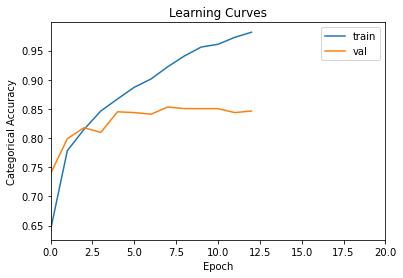

(6630, 50, 50, 1)
(736, 50, 50, 1)
Epoch 1/20
104/104 [==============================] - 28s 266ms/step - loss: 0.9925 - categorical_accuracy: 0.6198 - val_loss: 0.9073 - val_categorical_accuracy: 0.6332
Epoch 2/20
104/104 [==============================] - 28s 267ms/step - loss: 0.6931 - categorical_accuracy: 0.7371 - val_loss: 0.5504 - val_categorical_accuracy: 0.7989
Epoch 3/20
104/104 [==============================] - 29s 281ms/step - loss: 0.5234 - categorical_accuracy: 0.8084 - val_loss: 0.5063 - val_categorical_accuracy: 0.8179
Epoch 4/20
104/104 [==============================] - 27s 261ms/step - loss: 0.4559 - categorical_accuracy: 0.8353 - val_loss: 0.4632 - val_categorical_accuracy: 0.8383
Epoch 5/20
104/104 [==============================] - 27s 263ms/step - loss: 0.3890 - categorical_accuracy: 0.8614 - val_loss: 0.4601 - val_categorical_accuracy: 0.8410
Epoch 6/20
104/104 [==============================] - 28s 272ms/step - loss: 0.3506 - categorical_accuracy: 0.8751 - val

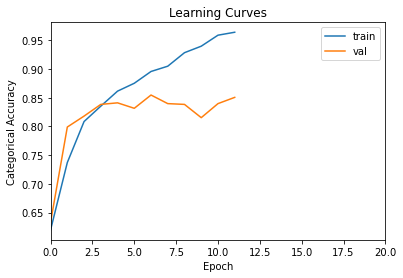

(6630, 50, 50, 1)
(736, 50, 50, 1)
Epoch 1/20
104/104 [==============================] - 29s 276ms/step - loss: 0.8650 - categorical_accuracy: 0.6677 - val_loss: 0.5765 - val_categorical_accuracy: 0.7880
Epoch 2/20
104/104 [==============================] - 29s 283ms/step - loss: 0.5503 - categorical_accuracy: 0.7958 - val_loss: 0.5375 - val_categorical_accuracy: 0.8139
Epoch 3/20
104/104 [==============================] - 34s 324ms/step - loss: 0.4673 - categorical_accuracy: 0.8268 - val_loss: 0.4960 - val_categorical_accuracy: 0.8329
Epoch 4/20
104/104 [==============================] - 31s 295ms/step - loss: 0.3961 - categorical_accuracy: 0.8541 - val_loss: 0.4408 - val_categorical_accuracy: 0.8397
Epoch 5/20
104/104 [==============================] - 30s 290ms/step - loss: 0.3490 - categorical_accuracy: 0.8710 - val_loss: 0.4311 - val_categorical_accuracy: 0.8478
Epoch 6/20
104/104 [==============================] - 35s 336ms/step - loss: 0.2928 - categorical_accuracy: 0.8941 - val

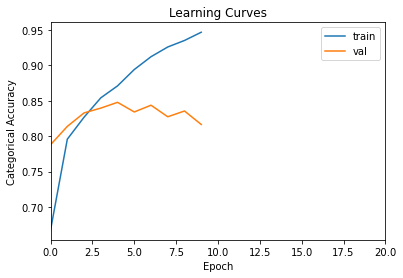

(6630, 50, 50, 1)
(736, 50, 50, 1)
Epoch 1/20
104/104 [==============================] - 30s 287ms/step - loss: 0.9026 - categorical_accuracy: 0.6501 - val_loss: 0.6448 - val_categorical_accuracy: 0.7527
Epoch 2/20
104/104 [==============================] - 30s 290ms/step - loss: 0.6064 - categorical_accuracy: 0.7766 - val_loss: 0.6170 - val_categorical_accuracy: 0.7785
Epoch 3/20
104/104 [==============================] - 29s 280ms/step - loss: 0.5081 - categorical_accuracy: 0.8181 - val_loss: 0.5245 - val_categorical_accuracy: 0.8003
Epoch 4/20
104/104 [==============================] - 29s 277ms/step - loss: 0.4347 - categorical_accuracy: 0.8419 - val_loss: 0.4676 - val_categorical_accuracy: 0.8234
Epoch 5/20
104/104 [==============================] - 30s 287ms/step - loss: 0.3847 - categorical_accuracy: 0.8637 - val_loss: 0.4328 - val_categorical_accuracy: 0.8410
Epoch 6/20
104/104 [==============================] - 30s 288ms/step - loss: 0.3277 - categorical_accuracy: 0.8830 - val

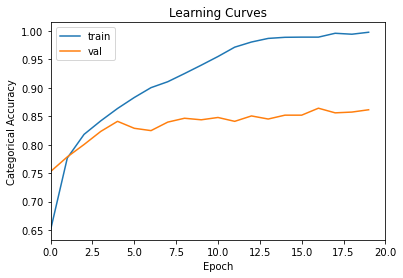

(6630, 50, 50, 1)
(736, 50, 50, 1)
Epoch 1/20
104/104 [==============================] - 30s 287ms/step - loss: 0.8965 - categorical_accuracy: 0.6525 - val_loss: 0.6241 - val_categorical_accuracy: 0.7690
Epoch 2/20
104/104 [==============================] - 32s 306ms/step - loss: 0.5932 - categorical_accuracy: 0.7780 - val_loss: 0.5253 - val_categorical_accuracy: 0.8125
Epoch 3/20
104/104 [==============================] - 29s 279ms/step - loss: 0.4911 - categorical_accuracy: 0.8237 - val_loss: 0.5552 - val_categorical_accuracy: 0.8030
Epoch 4/20
104/104 [==============================] - 29s 282ms/step - loss: 0.4249 - categorical_accuracy: 0.8439 - val_loss: 0.4612 - val_categorical_accuracy: 0.8329
Epoch 5/20
104/104 [==============================] - 28s 268ms/step - loss: 0.3724 - categorical_accuracy: 0.8668 - val_loss: 0.5245 - val_categorical_accuracy: 0.8302
Epoch 6/20
104/104 [==============================] - 31s 303ms/step - loss: 0.3329 - categorical_accuracy: 0.8783 - val

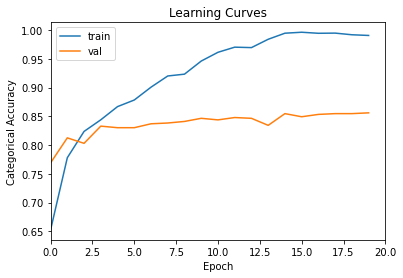

Model accuracy =  0.7607370801520876


In [15]:
#Define parameters
batch_size = 64
epochs = 20
num_classes = 4
patience = 5


accuracy = []
for i in range(5):
    
    #Define model
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(4, 4),activation='linear',input_shape=(50,50,1),padding='same')) #Convolution layer
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D((2, 2),padding='same')) #Pooling layer
    
    model.add(Conv2D(64, (4, 4), activation='linear',padding='same'))
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

    model.add(Flatten())
    model.add(Dense(128, activation='linear')) #Fully connected layer
    model.add(LeakyReLU(alpha=0.1))                  
    model.add(Dense(num_classes, activation='softmax')) #Output layer

    model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False), optimizer=keras.optimizers.Adam(),metrics=['categorical_accuracy'])

    
    acc = model_CNN(model, epochs, batch_size, patience)
    accuracy.append(acc)

accuracy = np.median(accuracy)
print("Model accuracy = ", accuracy)


(6630, 50, 50, 1)
(736, 50, 50, 1)
Epoch 1/20
104/104 [==============================] - 29s 275ms/step - loss: 0.9241 - categorical_accuracy: 0.6368 - val_loss: 0.6850 - val_categorical_accuracy: 0.7514
Epoch 2/20
104/104 [==============================] - 29s 277ms/step - loss: 0.6192 - categorical_accuracy: 0.7719 - val_loss: 0.5062 - val_categorical_accuracy: 0.8234
Epoch 3/20
104/104 [==============================] - 30s 292ms/step - loss: 0.5108 - categorical_accuracy: 0.8128 - val_loss: 0.4793 - val_categorical_accuracy: 0.8424
Epoch 4/20
104/104 [==============================] - 30s 286ms/step - loss: 0.4239 - categorical_accuracy: 0.8495 - val_loss: 0.4556 - val_categorical_accuracy: 0.8492
Epoch 5/20
104/104 [==============================] - 28s 274ms/step - loss: 0.3758 - categorical_accuracy: 0.8661 - val_loss: 0.4513 - val_categorical_accuracy: 0.8438
Epoch 6/20
104/104 [==============================] - 28s 273ms/step - loss: 0.3105 - categorical_accuracy: 0.8860 - val

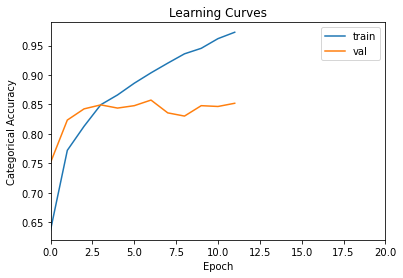

(6630, 50, 50, 1)
(736, 50, 50, 1)
Epoch 1/20
104/104 [==============================] - 28s 264ms/step - loss: 0.9085 - categorical_accuracy: 0.6471 - val_loss: 0.6482 - val_categorical_accuracy: 0.7446
Epoch 2/20
104/104 [==============================] - 27s 263ms/step - loss: 0.5606 - categorical_accuracy: 0.7956 - val_loss: 0.5044 - val_categorical_accuracy: 0.8274
Epoch 3/20
104/104 [==============================] - 28s 273ms/step - loss: 0.4534 - categorical_accuracy: 0.8370 - val_loss: 0.4794 - val_categorical_accuracy: 0.8274
Epoch 4/20
104/104 [==============================] - 30s 293ms/step - loss: 0.3883 - categorical_accuracy: 0.8587 - val_loss: 0.4364 - val_categorical_accuracy: 0.8465
Epoch 5/20
104/104 [==============================] - 27s 260ms/step - loss: 0.3550 - categorical_accuracy: 0.8730 - val_loss: 0.4586 - val_categorical_accuracy: 0.8438
Epoch 6/20
104/104 [==============================] - 29s 277ms/step - loss: 0.2965 - categorical_accuracy: 0.8900 - val

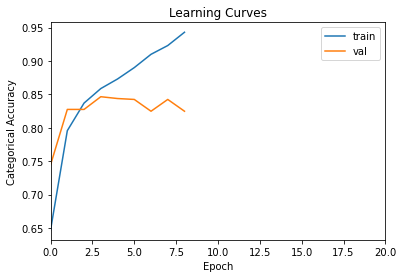

(6630, 50, 50, 1)
(736, 50, 50, 1)
Epoch 1/20
104/104 [==============================] - 27s 255ms/step - loss: 0.8688 - categorical_accuracy: 0.6567 - val_loss: 0.5856 - val_categorical_accuracy: 0.7772
Epoch 2/20
104/104 [==============================] - 30s 292ms/step - loss: 0.5704 - categorical_accuracy: 0.7934 - val_loss: 0.5956 - val_categorical_accuracy: 0.7704
Epoch 3/20
104/104 [==============================] - 30s 286ms/step - loss: 0.4872 - categorical_accuracy: 0.8232 - val_loss: 0.5100 - val_categorical_accuracy: 0.8139
Epoch 4/20
104/104 [==============================] - 29s 280ms/step - loss: 0.4265 - categorical_accuracy: 0.8448 - val_loss: 0.4754 - val_categorical_accuracy: 0.8383
Epoch 5/20
104/104 [==============================] - 27s 256ms/step - loss: 0.3619 - categorical_accuracy: 0.8682 - val_loss: 0.4457 - val_categorical_accuracy: 0.8424
Epoch 6/20
104/104 [==============================] - 26s 254ms/step - loss: 0.3175 - categorical_accuracy: 0.8848 - val

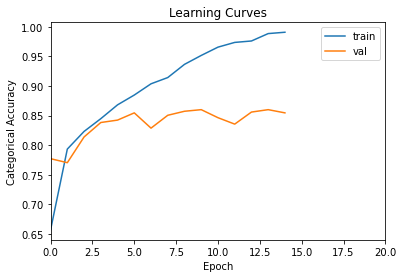

(6630, 50, 50, 1)
(736, 50, 50, 1)
Epoch 1/20
104/104 [==============================] - 31s 297ms/step - loss: 0.9785 - categorical_accuracy: 0.6216 - val_loss: 0.7940 - val_categorical_accuracy: 0.6821
Epoch 2/20
104/104 [==============================] - 28s 270ms/step - loss: 0.6739 - categorical_accuracy: 0.7513 - val_loss: 0.5599 - val_categorical_accuracy: 0.8003
Epoch 3/20
104/104 [==============================] - 27s 262ms/step - loss: 0.5491 - categorical_accuracy: 0.8038 - val_loss: 0.5213 - val_categorical_accuracy: 0.8234
Epoch 4/20
104/104 [==============================] - 27s 259ms/step - loss: 0.4680 - categorical_accuracy: 0.8356 - val_loss: 0.5039 - val_categorical_accuracy: 0.8207
Epoch 5/20
104/104 [==============================] - 30s 289ms/step - loss: 0.4022 - categorical_accuracy: 0.8552 - val_loss: 0.4646 - val_categorical_accuracy: 0.8342
Epoch 6/20
104/104 [==============================] - 30s 284ms/step - loss: 0.3648 - categorical_accuracy: 0.8682 - val

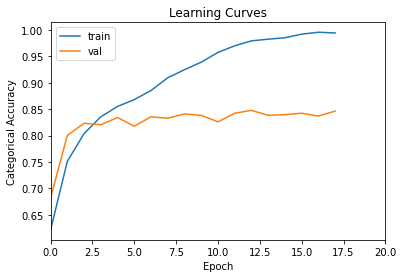

(6630, 50, 50, 1)
(736, 50, 50, 1)
Epoch 1/20
104/104 [==============================] - 28s 263ms/step - loss: 0.9135 - categorical_accuracy: 0.6433 - val_loss: 0.7288 - val_categorical_accuracy: 0.7174
Epoch 2/20
104/104 [==============================] - 27s 262ms/step - loss: 0.6188 - categorical_accuracy: 0.7753 - val_loss: 0.5227 - val_categorical_accuracy: 0.8139
Epoch 3/20
104/104 [==============================] - 28s 273ms/step - loss: 0.5223 - categorical_accuracy: 0.8110 - val_loss: 0.4877 - val_categorical_accuracy: 0.8370
Epoch 4/20
104/104 [==============================] - 27s 264ms/step - loss: 0.4553 - categorical_accuracy: 0.8389 - val_loss: 0.4973 - val_categorical_accuracy: 0.8234
Epoch 5/20
104/104 [==============================] - 27s 262ms/step - loss: 0.3885 - categorical_accuracy: 0.8617 - val_loss: 0.5722 - val_categorical_accuracy: 0.7948
Epoch 6/20
104/104 [==============================] - 29s 281ms/step - loss: 0.3604 - categorical_accuracy: 0.8662 - val

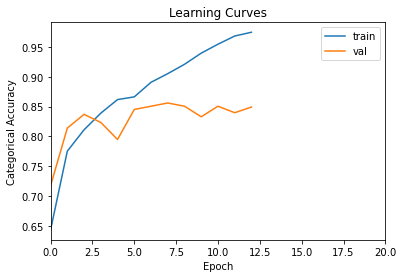

Model accuracy =  0.746553957917913


In [16]:
#Define parameters
batch_size = 64
epochs = 20
num_classes = 4
patience = 5


accuracy = []
for i in range(5):
    
    #Define model
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(4, 4),input_shape=(50,50,1),padding='same')) #Convolution layer
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D((2, 2),padding='same')) #Pooling layer
    
    model.add(Conv2D(64, (4, 4), padding='same'))
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

    model.add(Flatten())
    model.add(Dense(128, activation='linear')) #Fully connected layer
    model.add(LeakyReLU(alpha=0.1))                  
    model.add(Dense(num_classes, activation='softmax')) #Output layer

    model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False), optimizer=keras.optimizers.Adam(),metrics=['categorical_accuracy'])

    
    acc = model_CNN(model, epochs, batch_size, patience)
    accuracy.append(acc)

accuracy = np.median(accuracy)
print("Model accuracy = ", accuracy)

(6630, 50, 50, 1)
(736, 50, 50, 1)
Epoch 1/20
104/104 [==============================] - 28s 267ms/step - loss: 0.9749 - categorical_accuracy: 0.6179 - val_loss: 0.7338 - val_categorical_accuracy: 0.7024
Epoch 2/20
104/104 [==============================] - 28s 266ms/step - loss: 0.6676 - categorical_accuracy: 0.7505 - val_loss: 0.5530 - val_categorical_accuracy: 0.7908
Epoch 3/20
104/104 [==============================] - 29s 275ms/step - loss: 0.5607 - categorical_accuracy: 0.7955 - val_loss: 0.5381 - val_categorical_accuracy: 0.8016
Epoch 4/20
104/104 [==============================] - 29s 283ms/step - loss: 0.4890 - categorical_accuracy: 0.8246 - val_loss: 0.4813 - val_categorical_accuracy: 0.8329
Epoch 5/20
104/104 [==============================] - 29s 283ms/step - loss: 0.4353 - categorical_accuracy: 0.8421 - val_loss: 0.4646 - val_categorical_accuracy: 0.8329
Epoch 6/20
104/104 [==============================] - 30s 290ms/step - loss: 0.3954 - categorical_accuracy: 0.8593 - val

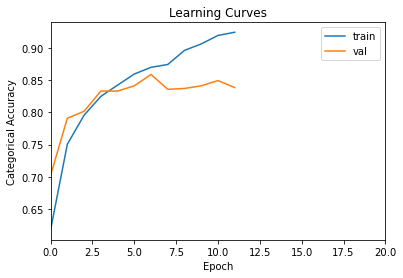

(6630, 50, 50, 1)
(736, 50, 50, 1)
Epoch 1/20
104/104 [==============================] - 28s 268ms/step - loss: 0.9762 - categorical_accuracy: 0.6140 - val_loss: 0.7728 - val_categorical_accuracy: 0.7065
Epoch 2/20
104/104 [==============================] - 29s 282ms/step - loss: 0.6739 - categorical_accuracy: 0.7463 - val_loss: 0.5578 - val_categorical_accuracy: 0.7908
Epoch 3/20
104/104 [==============================] - 31s 294ms/step - loss: 0.5357 - categorical_accuracy: 0.8044 - val_loss: 0.5143 - val_categorical_accuracy: 0.8098
Epoch 4/20
104/104 [==============================] - 30s 291ms/step - loss: 0.4632 - categorical_accuracy: 0.8360 - val_loss: 0.4742 - val_categorical_accuracy: 0.8288
Epoch 5/20
104/104 [==============================] - 29s 275ms/step - loss: 0.4373 - categorical_accuracy: 0.8445 - val_loss: 0.4922 - val_categorical_accuracy: 0.8179
Epoch 6/20
104/104 [==============================] - 28s 273ms/step - loss: 0.3864 - categorical_accuracy: 0.8615 - val

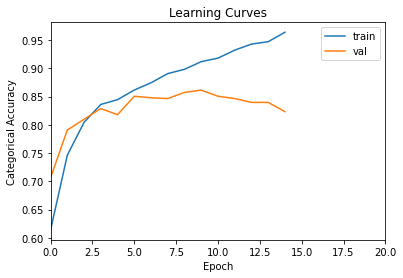

(6630, 50, 50, 1)
(736, 50, 50, 1)
Epoch 1/20
104/104 [==============================] - 30s 283ms/step - loss: 0.9262 - categorical_accuracy: 0.6400 - val_loss: 0.6778 - val_categorical_accuracy: 0.7418
Epoch 2/20
104/104 [==============================] - 30s 289ms/step - loss: 0.6285 - categorical_accuracy: 0.7661 - val_loss: 0.6101 - val_categorical_accuracy: 0.7758
Epoch 3/20
104/104 [==============================] - 31s 300ms/step - loss: 0.5231 - categorical_accuracy: 0.8124 - val_loss: 0.5004 - val_categorical_accuracy: 0.8234
Epoch 4/20
104/104 [==============================] - 31s 299ms/step - loss: 0.4817 - categorical_accuracy: 0.8281 - val_loss: 0.4836 - val_categorical_accuracy: 0.8356
Epoch 5/20
104/104 [==============================] - 30s 289ms/step - loss: 0.4230 - categorical_accuracy: 0.8480 - val_loss: 0.4782 - val_categorical_accuracy: 0.8438
Epoch 6/20
104/104 [==============================] - 30s 289ms/step - loss: 0.3758 - categorical_accuracy: 0.8655 - val

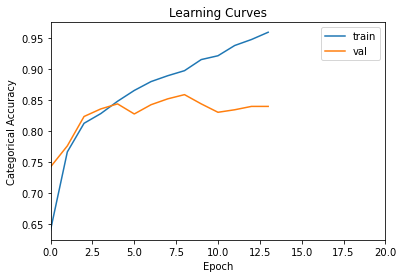

(6630, 50, 50, 1)
(736, 50, 50, 1)
Epoch 1/20
104/104 [==============================] - 29s 278ms/step - loss: 0.9439 - categorical_accuracy: 0.6293 - val_loss: 0.6934 - val_categorical_accuracy: 0.7242
Epoch 2/20
104/104 [==============================] - 31s 301ms/step - loss: 0.6690 - categorical_accuracy: 0.7445 - val_loss: 0.5532 - val_categorical_accuracy: 0.7989
Epoch 3/20
104/104 [==============================] - 30s 289ms/step - loss: 0.5455 - categorical_accuracy: 0.8057 - val_loss: 0.4929 - val_categorical_accuracy: 0.8152
Epoch 4/20
104/104 [==============================] - 30s 287ms/step - loss: 0.4900 - categorical_accuracy: 0.8238 - val_loss: 0.5139 - val_categorical_accuracy: 0.8043
Epoch 5/20
104/104 [==============================] - 31s 297ms/step - loss: 0.4478 - categorical_accuracy: 0.8388 - val_loss: 0.4790 - val_categorical_accuracy: 0.8274
Epoch 6/20
104/104 [==============================] - 30s 286ms/step - loss: 0.4112 - categorical_accuracy: 0.8532 - val

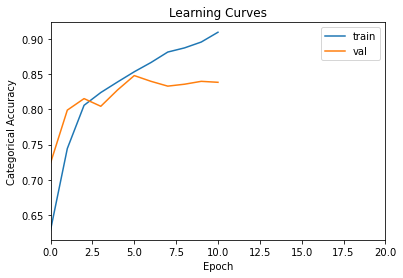

(6630, 50, 50, 1)
(736, 50, 50, 1)
Epoch 1/20
104/104 [==============================] - 33s 317ms/step - loss: 0.8628 - categorical_accuracy: 0.6590 - val_loss: 0.6021 - val_categorical_accuracy: 0.7554
Epoch 2/20
104/104 [==============================] - 34s 329ms/step - loss: 0.5735 - categorical_accuracy: 0.7911 - val_loss: 0.5037 - val_categorical_accuracy: 0.8139
Epoch 3/20
104/104 [==============================] - 29s 281ms/step - loss: 0.4797 - categorical_accuracy: 0.8287 - val_loss: 0.5217 - val_categorical_accuracy: 0.8071
Epoch 4/20
104/104 [==============================] - 31s 298ms/step - loss: 0.4423 - categorical_accuracy: 0.8382 - val_loss: 0.4667 - val_categorical_accuracy: 0.8370
Epoch 5/20
104/104 [==============================] - 32s 312ms/step - loss: 0.4015 - categorical_accuracy: 0.8540 - val_loss: 0.4481 - val_categorical_accuracy: 0.8451
Epoch 6/20
104/104 [==============================] - 29s 274ms/step - loss: 0.3406 - categorical_accuracy: 0.8766 - val

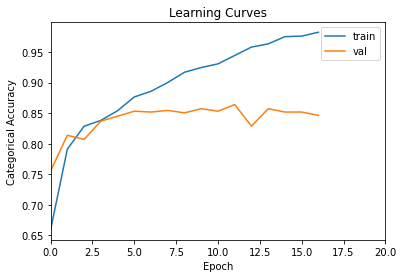

Model accuracy =  0.76010452059392


In [17]:
#Define parameters
batch_size = 64
epochs = 20
num_classes = 4
patience = 5


accuracy = []
for i in range(5):
    
    #Define model
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(4, 4),activation='relu',input_shape=(50,50,1),padding='same')) #Convolution layer
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D((2, 2),padding='same')) #Pooling layer
    
    model.add(Conv2D(64, (4, 4), activation='relu',padding='same'))
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

    model.add(Flatten())
    model.add(Dense(128, activation='relu')) #Fully connected layer
    model.add(LeakyReLU(alpha=0.1))                  
    model.add(Dense(num_classes, activation='softmax')) #Output layer

    model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False), optimizer=keras.optimizers.Adam(),metrics=['categorical_accuracy'])

    
    acc = model_CNN(model, epochs, batch_size, patience)
    accuracy.append(acc)

accuracy = np.median(accuracy)
print("Model accuracy = ", accuracy)

(6630, 50, 50, 1)
(736, 50, 50, 1)
Epoch 1/20
104/104 [==============================] - 41s 393ms/step - loss: 0.8580 - categorical_accuracy: 0.6725 - val_loss: 0.6342 - val_categorical_accuracy: 0.7663
Epoch 2/20
104/104 [==============================] - 38s 369ms/step - loss: 0.5518 - categorical_accuracy: 0.7959 - val_loss: 0.5221 - val_categorical_accuracy: 0.8152
Epoch 3/20
104/104 [==============================] - 38s 362ms/step - loss: 0.4535 - categorical_accuracy: 0.8341 - val_loss: 0.4811 - val_categorical_accuracy: 0.8234
Epoch 4/20
104/104 [==============================] - 44s 424ms/step - loss: 0.3925 - categorical_accuracy: 0.8578 - val_loss: 0.4929 - val_categorical_accuracy: 0.8125
Epoch 5/20
104/104 [==============================] - 43s 418ms/step - loss: 0.3325 - categorical_accuracy: 0.8821 - val_loss: 0.4474 - val_categorical_accuracy: 0.8505
Epoch 6/20
104/104 [==============================] - 39s 372ms/step - loss: 0.2863 - categorical_accuracy: 0.8994 - val

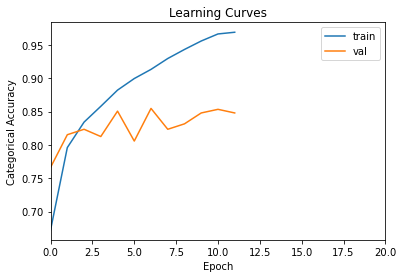

(6630, 50, 50, 1)
(736, 50, 50, 1)
Epoch 1/20
104/104 [==============================] - 38s 359ms/step - loss: 0.9019 - categorical_accuracy: 0.6549 - val_loss: 0.7496 - val_categorical_accuracy: 0.7228
Epoch 2/20
104/104 [==============================] - 38s 362ms/step - loss: 0.6093 - categorical_accuracy: 0.7765 - val_loss: 0.5129 - val_categorical_accuracy: 0.8207
Epoch 3/20
104/104 [==============================] - 41s 391ms/step - loss: 0.5045 - categorical_accuracy: 0.8199 - val_loss: 0.5443 - val_categorical_accuracy: 0.7935
Epoch 4/20
104/104 [==============================] - 40s 387ms/step - loss: 0.4355 - categorical_accuracy: 0.8428 - val_loss: 0.5108 - val_categorical_accuracy: 0.8043
Epoch 5/20
104/104 [==============================] - 40s 381ms/step - loss: 0.3804 - categorical_accuracy: 0.8624 - val_loss: 0.4344 - val_categorical_accuracy: 0.8465
Epoch 6/20
104/104 [==============================] - 37s 359ms/step - loss: 0.3325 - categorical_accuracy: 0.8824 - val

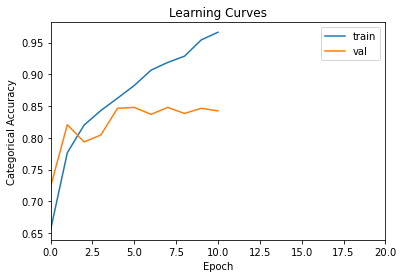

(6630, 50, 50, 1)
(736, 50, 50, 1)
Epoch 1/20
104/104 [==============================] - 37s 354ms/step - loss: 0.8957 - categorical_accuracy: 0.6495 - val_loss: 0.6251 - val_categorical_accuracy: 0.7677
Epoch 2/20
104/104 [==============================] - 37s 353ms/step - loss: 0.6044 - categorical_accuracy: 0.7798 - val_loss: 0.5573 - val_categorical_accuracy: 0.7935
Epoch 3/20
104/104 [==============================] - 37s 360ms/step - loss: 0.5121 - categorical_accuracy: 0.8148 - val_loss: 0.5042 - val_categorical_accuracy: 0.8220
Epoch 4/20
104/104 [==============================] - 38s 365ms/step - loss: 0.4408 - categorical_accuracy: 0.8404 - val_loss: 0.4751 - val_categorical_accuracy: 0.8139
Epoch 5/20
104/104 [==============================] - 37s 357ms/step - loss: 0.3762 - categorical_accuracy: 0.8679 - val_loss: 0.4172 - val_categorical_accuracy: 0.8546
Epoch 6/20
104/104 [==============================] - 38s 364ms/step - loss: 0.3335 - categorical_accuracy: 0.8822 - val

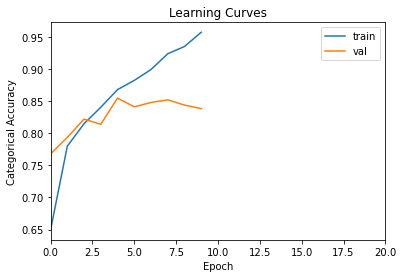

(6630, 50, 50, 1)
(736, 50, 50, 1)
Epoch 1/20
104/104 [==============================] - 42s 400ms/step - loss: 0.9566 - categorical_accuracy: 0.6216 - val_loss: 0.6963 - val_categorical_accuracy: 0.7160
Epoch 2/20
104/104 [==============================] - 39s 372ms/step - loss: 0.6302 - categorical_accuracy: 0.7644 - val_loss: 0.5706 - val_categorical_accuracy: 0.7867
Epoch 3/20
104/104 [==============================] - 40s 380ms/step - loss: 0.5162 - categorical_accuracy: 0.8118 - val_loss: 0.5143 - val_categorical_accuracy: 0.8179
Epoch 4/20
104/104 [==============================] - 39s 371ms/step - loss: 0.4392 - categorical_accuracy: 0.8415 - val_loss: 0.4926 - val_categorical_accuracy: 0.8220
Epoch 5/20
104/104 [==============================] - 39s 376ms/step - loss: 0.3845 - categorical_accuracy: 0.8611 - val_loss: 0.4544 - val_categorical_accuracy: 0.8370
Epoch 6/20
104/104 [==============================] - 41s 398ms/step - loss: 0.3280 - categorical_accuracy: 0.8831 - val

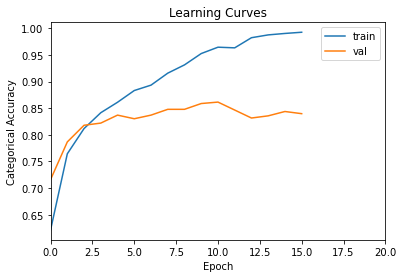

(6630, 50, 50, 1)
(736, 50, 50, 1)
Epoch 1/20
104/104 [==============================] - 42s 399ms/step - loss: 0.8882 - categorical_accuracy: 0.6474 - val_loss: 0.6225 - val_categorical_accuracy: 0.7785
Epoch 2/20
104/104 [==============================] - 38s 368ms/step - loss: 0.5757 - categorical_accuracy: 0.7863 - val_loss: 0.5316 - val_categorical_accuracy: 0.8152
Epoch 3/20
104/104 [==============================] - 37s 357ms/step - loss: 0.4701 - categorical_accuracy: 0.8318 - val_loss: 0.4957 - val_categorical_accuracy: 0.8139
Epoch 4/20
104/104 [==============================] - 40s 384ms/step - loss: 0.4055 - categorical_accuracy: 0.8575 - val_loss: 0.4481 - val_categorical_accuracy: 0.8410
Epoch 5/20
104/104 [==============================] - 36s 345ms/step - loss: 0.3463 - categorical_accuracy: 0.8756 - val_loss: 0.4458 - val_categorical_accuracy: 0.8519
Epoch 6/20
104/104 [==============================] - 37s 352ms/step - loss: 0.2999 - categorical_accuracy: 0.8888 - val

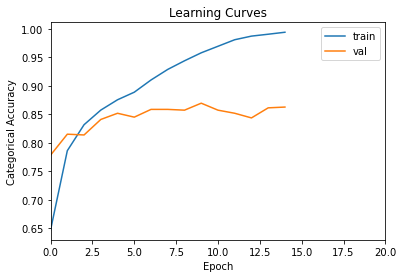

Model accuracy =  0.7646778346430008


In [18]:
#Define parameters
batch_size = 64
epochs = 20
num_classes = 4
patience = 5


accuracy = []
for i in range(5):
    
    #Define model
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(5, 5),activation='linear',input_shape=(50,50,1),padding='same')) #Convolution layer
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D((2, 2),padding='same')) #Pooling layer
    
    model.add(Conv2D(64, (5, 5), activation='linear',padding='same'))
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

    model.add(Flatten())
    model.add(Dense(128, activation='linear')) #Fully connected layer
    model.add(LeakyReLU(alpha=0.1))                  
    model.add(Dense(num_classes, activation='softmax')) #Output layer

    model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False), optimizer=keras.optimizers.Adam(),metrics=['categorical_accuracy'])

    
    acc = model_CNN(model, epochs, batch_size, patience)
    accuracy.append(acc)

accuracy = np.median(accuracy)
print("Model accuracy = ", accuracy)


(6630, 50, 50, 1)
(736, 50, 50, 1)
Epoch 1/20
104/104 [==============================] - 30s 288ms/step - loss: 0.8650 - categorical_accuracy: 0.6633 - val_loss: 0.6074 - val_categorical_accuracy: 0.7690
Epoch 2/20
104/104 [==============================] - 32s 310ms/step - loss: 0.5882 - categorical_accuracy: 0.7825 - val_loss: 0.5464 - val_categorical_accuracy: 0.8003
Epoch 3/20
104/104 [==============================] - 31s 295ms/step - loss: 0.4808 - categorical_accuracy: 0.8255 - val_loss: 0.4650 - val_categorical_accuracy: 0.8410
Epoch 4/20
104/104 [==============================] - 31s 295ms/step - loss: 0.4187 - categorical_accuracy: 0.8449 - val_loss: 0.4865 - val_categorical_accuracy: 0.8166
Epoch 5/20
104/104 [==============================] - 30s 286ms/step - loss: 0.3514 - categorical_accuracy: 0.8738 - val_loss: 0.4758 - val_categorical_accuracy: 0.8220
Epoch 6/20
104/104 [==============================] - 30s 284ms/step - loss: 0.3157 - categorical_accuracy: 0.8852 - val

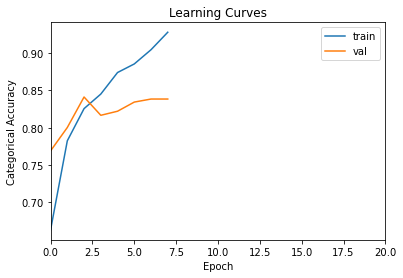

(6630, 50, 50, 1)
(736, 50, 50, 1)
Epoch 1/20
104/104 [==============================] - 35s 329ms/step - loss: 0.9530 - categorical_accuracy: 0.6278 - val_loss: 0.6865 - val_categorical_accuracy: 0.7269
Epoch 2/20
104/104 [==============================] - 35s 333ms/step - loss: 0.6403 - categorical_accuracy: 0.7630 - val_loss: 0.5605 - val_categorical_accuracy: 0.8030
Epoch 3/20
104/104 [==============================] - 32s 311ms/step - loss: 0.5367 - categorical_accuracy: 0.8044 - val_loss: 0.4938 - val_categorical_accuracy: 0.8220
Epoch 4/20
104/104 [==============================] - 30s 286ms/step - loss: 0.4585 - categorical_accuracy: 0.8347 - val_loss: 0.4760 - val_categorical_accuracy: 0.8329
Epoch 5/20
104/104 [==============================] - 31s 297ms/step - loss: 0.4075 - categorical_accuracy: 0.8522 - val_loss: 0.4561 - val_categorical_accuracy: 0.8370
Epoch 6/20
104/104 [==============================] - 32s 304ms/step - loss: 0.3526 - categorical_accuracy: 0.8727 - val

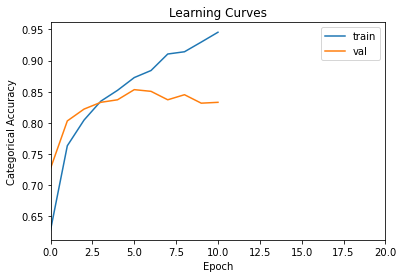

(6630, 50, 50, 1)
(736, 50, 50, 1)
Epoch 1/20
104/104 [==============================] - 30s 284ms/step - loss: 0.8939 - categorical_accuracy: 0.6557 - val_loss: 0.6523 - val_categorical_accuracy: 0.7418
Epoch 2/20
104/104 [==============================] - 29s 278ms/step - loss: 0.5857 - categorical_accuracy: 0.7842 - val_loss: 0.4954 - val_categorical_accuracy: 0.8288
Epoch 3/20
104/104 [==============================] - 29s 278ms/step - loss: 0.4754 - categorical_accuracy: 0.8282 - val_loss: 0.6218 - val_categorical_accuracy: 0.7772
Epoch 4/20
104/104 [==============================] - 29s 276ms/step - loss: 0.4259 - categorical_accuracy: 0.8433 - val_loss: 0.5045 - val_categorical_accuracy: 0.8179
Epoch 5/20
104/104 [==============================] - 29s 279ms/step - loss: 0.3686 - categorical_accuracy: 0.8697 - val_loss: 0.4400 - val_categorical_accuracy: 0.8451
Epoch 6/20
104/104 [==============================] - 29s 276ms/step - loss: 0.3103 - categorical_accuracy: 0.8885 - val

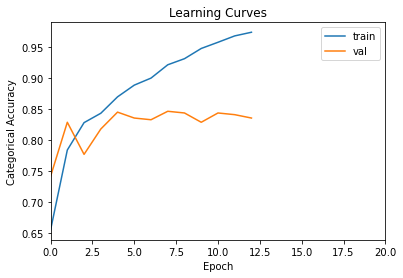

(6630, 50, 50, 1)
(736, 50, 50, 1)
Epoch 1/20
104/104 [==============================] - 29s 279ms/step - loss: 0.8369 - categorical_accuracy: 0.6698 - val_loss: 0.6137 - val_categorical_accuracy: 0.7812
Epoch 2/20
104/104 [==============================] - 29s 275ms/step - loss: 0.5535 - categorical_accuracy: 0.7982 - val_loss: 0.5046 - val_categorical_accuracy: 0.8057
Epoch 3/20
104/104 [==============================] - 29s 277ms/step - loss: 0.4735 - categorical_accuracy: 0.8297 - val_loss: 0.4869 - val_categorical_accuracy: 0.8315
Epoch 4/20
104/104 [==============================] - 29s 282ms/step - loss: 0.4125 - categorical_accuracy: 0.8471 - val_loss: 0.4468 - val_categorical_accuracy: 0.8478
Epoch 5/20
104/104 [==============================] - 29s 280ms/step - loss: 0.3559 - categorical_accuracy: 0.8692 - val_loss: 0.4557 - val_categorical_accuracy: 0.8356
Epoch 6/20
104/104 [==============================] - 29s 279ms/step - loss: 0.3046 - categorical_accuracy: 0.8900 - val

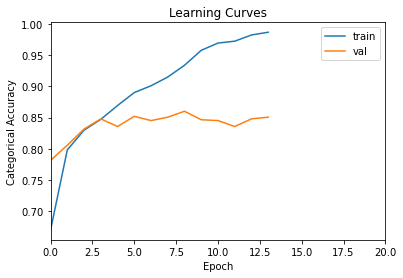

(6630, 50, 50, 1)
(736, 50, 50, 1)
Epoch 1/20
104/104 [==============================] - 29s 276ms/step - loss: 0.8781 - categorical_accuracy: 0.6558 - val_loss: 0.6785 - val_categorical_accuracy: 0.7255
Epoch 2/20
104/104 [==============================] - 29s 275ms/step - loss: 0.5817 - categorical_accuracy: 0.7897 - val_loss: 0.5700 - val_categorical_accuracy: 0.7908
Epoch 3/20
104/104 [==============================] - 29s 277ms/step - loss: 0.4934 - categorical_accuracy: 0.8225 - val_loss: 0.5363 - val_categorical_accuracy: 0.7935
Epoch 4/20
104/104 [==============================] - 33s 315ms/step - loss: 0.4206 - categorical_accuracy: 0.8465 - val_loss: 0.4477 - val_categorical_accuracy: 0.8478
Epoch 5/20
104/104 [==============================] - 33s 320ms/step - loss: 0.3577 - categorical_accuracy: 0.8695 - val_loss: 0.4594 - val_categorical_accuracy: 0.8329
Epoch 6/20
104/104 [==============================] - 31s 302ms/step - loss: 0.3123 - categorical_accuracy: 0.8848 - val

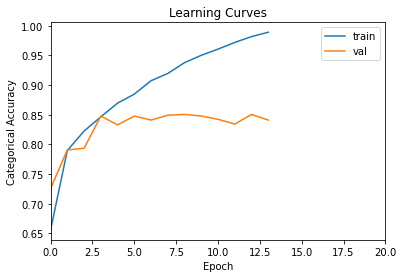

Model accuracy =  0.7312829876598275


In [19]:
#Define parameters
batch_size = 64
epochs = 20
num_classes = 4
patience = 5


accuracy = []
for i in range(5):
    
    #Define model
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(5, 5),activation='linear',input_shape=(50,50,1),padding='same')) #Convolution layer
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D((2, 2),padding='same')) #Pooling layer
    
    model.add(Conv2D(64, (4, 4), activation='linear',padding='same'))
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

    model.add(Flatten())
    model.add(Dense(128, activation='linear')) #Fully connected layer
    model.add(LeakyReLU(alpha=0.1))                  
    model.add(Dense(num_classes, activation='softmax')) #Output layer

    model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False), optimizer=keras.optimizers.Adam(),metrics=['categorical_accuracy'])

    
    acc = model_CNN(model, epochs, batch_size, patience)
    accuracy.append(acc)

accuracy = np.median(accuracy)
print("Model accuracy = ", accuracy)


(6630, 50, 50, 1)
(736, 50, 50, 1)
Epoch 1/20
104/104 [==============================] - 42s 391ms/step - loss: 0.9843 - categorical_accuracy: 0.6125 - val_loss: 0.7484 - val_categorical_accuracy: 0.7038
Epoch 2/20
104/104 [==============================] - 38s 360ms/step - loss: 0.6670 - categorical_accuracy: 0.7492 - val_loss: 0.5563 - val_categorical_accuracy: 0.7976
Epoch 3/20
104/104 [==============================] - 41s 393ms/step - loss: 0.5291 - categorical_accuracy: 0.8062 - val_loss: 0.5270 - val_categorical_accuracy: 0.8030
Epoch 4/20
104/104 [==============================] - 37s 352ms/step - loss: 0.4622 - categorical_accuracy: 0.8309 - val_loss: 0.4531 - val_categorical_accuracy: 0.8342
Epoch 5/20
104/104 [==============================] - 39s 378ms/step - loss: 0.4073 - categorical_accuracy: 0.8576 - val_loss: 0.4407 - val_categorical_accuracy: 0.8505
Epoch 6/20
104/104 [==============================] - 37s 360ms/step - loss: 0.3582 - categorical_accuracy: 0.8735 - val

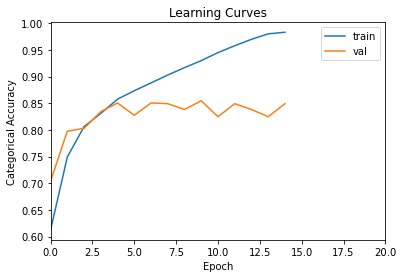

(6630, 50, 50, 1)
(736, 50, 50, 1)
Epoch 1/20
104/104 [==============================] - 36s 346ms/step - loss: 0.9073 - categorical_accuracy: 0.6513 - val_loss: 0.6422 - val_categorical_accuracy: 0.7418
Epoch 2/20
104/104 [==============================] - 40s 387ms/step - loss: 0.6027 - categorical_accuracy: 0.7736 - val_loss: 0.5082 - val_categorical_accuracy: 0.8111
Epoch 3/20
104/104 [==============================] - 39s 377ms/step - loss: 0.4986 - categorical_accuracy: 0.8195 - val_loss: 0.5041 - val_categorical_accuracy: 0.8193
Epoch 4/20
104/104 [==============================] - 35s 335ms/step - loss: 0.4233 - categorical_accuracy: 0.8504 - val_loss: 0.4505 - val_categorical_accuracy: 0.8356
Epoch 5/20
104/104 [==============================] - 36s 345ms/step - loss: 0.3657 - categorical_accuracy: 0.8689 - val_loss: 0.5765 - val_categorical_accuracy: 0.8043
Epoch 6/20
104/104 [==============================] - 37s 361ms/step - loss: 0.3257 - categorical_accuracy: 0.8811 - val

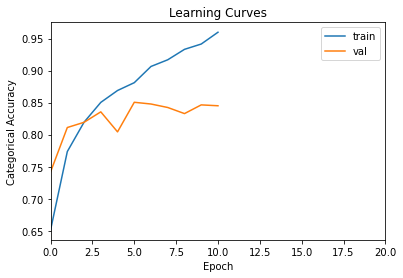

(6630, 50, 50, 1)
(736, 50, 50, 1)
Epoch 1/20
104/104 [==============================] - 36s 342ms/step - loss: 0.8387 - categorical_accuracy: 0.6715 - val_loss: 0.6585 - val_categorical_accuracy: 0.7690
Epoch 2/20
104/104 [==============================] - 38s 363ms/step - loss: 0.5797 - categorical_accuracy: 0.7884 - val_loss: 0.6323 - val_categorical_accuracy: 0.7541
Epoch 3/20
104/104 [==============================] - 38s 370ms/step - loss: 0.5008 - categorical_accuracy: 0.8179 - val_loss: 0.4713 - val_categorical_accuracy: 0.8410
Epoch 4/20
104/104 [==============================] - 41s 395ms/step - loss: 0.4248 - categorical_accuracy: 0.8449 - val_loss: 0.4392 - val_categorical_accuracy: 0.8478
Epoch 5/20
104/104 [==============================] - 38s 369ms/step - loss: 0.3843 - categorical_accuracy: 0.8602 - val_loss: 0.4431 - val_categorical_accuracy: 0.8383
Epoch 6/20
104/104 [==============================] - 41s 393ms/step - loss: 0.3254 - categorical_accuracy: 0.8824 - val

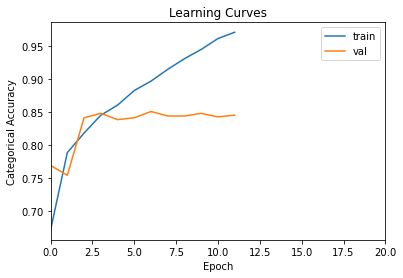

(6630, 50, 50, 1)
(736, 50, 50, 1)
Epoch 1/20
104/104 [==============================] - 42s 403ms/step - loss: 0.8851 - categorical_accuracy: 0.6605 - val_loss: 0.6725 - val_categorical_accuracy: 0.7405
Epoch 2/20
104/104 [==============================] - 39s 371ms/step - loss: 0.5833 - categorical_accuracy: 0.7822 - val_loss: 0.5066 - val_categorical_accuracy: 0.8288
Epoch 3/20
104/104 [==============================] - 40s 382ms/step - loss: 0.4838 - categorical_accuracy: 0.8226 - val_loss: 0.4649 - val_categorical_accuracy: 0.8274
Epoch 4/20
104/104 [==============================] - 39s 370ms/step - loss: 0.4071 - categorical_accuracy: 0.8514 - val_loss: 0.4430 - val_categorical_accuracy: 0.8342
Epoch 5/20
104/104 [==============================] - 42s 404ms/step - loss: 0.3460 - categorical_accuracy: 0.8772 - val_loss: 0.3989 - val_categorical_accuracy: 0.8492
Epoch 6/20
104/104 [==============================] - 39s 377ms/step - loss: 0.3022 - categorical_accuracy: 0.8879 - val

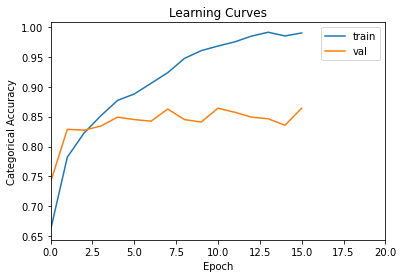

(6630, 50, 50, 1)
(736, 50, 50, 1)
Epoch 1/20
104/104 [==============================] - 37s 342ms/step - loss: 0.8688 - categorical_accuracy: 0.6689 - val_loss: 0.5968 - val_categorical_accuracy: 0.7595
Epoch 2/20
104/104 [==============================] - 34s 323ms/step - loss: 0.5795 - categorical_accuracy: 0.7887 - val_loss: 0.5369 - val_categorical_accuracy: 0.8098
Epoch 3/20
104/104 [==============================] - 37s 356ms/step - loss: 0.4979 - categorical_accuracy: 0.8223 - val_loss: 0.5354 - val_categorical_accuracy: 0.7948
Epoch 4/20
104/104 [==============================] - 39s 375ms/step - loss: 0.4389 - categorical_accuracy: 0.8440 - val_loss: 0.4603 - val_categorical_accuracy: 0.8342
Epoch 5/20
104/104 [==============================] - 37s 356ms/step - loss: 0.3661 - categorical_accuracy: 0.8680 - val_loss: 0.4748 - val_categorical_accuracy: 0.8220
Epoch 6/20
104/104 [==============================] - 37s 356ms/step - loss: 0.3125 - categorical_accuracy: 0.8830 - val

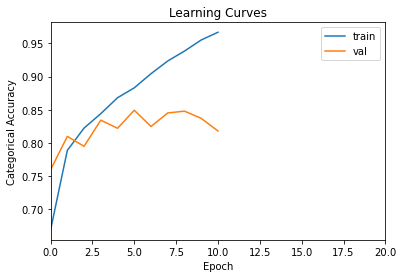

Model accuracy =  0.7651434402931556


In [20]:
#Define parameters
batch_size = 64
epochs = 20
num_classes = 4
patience = 5


accuracy = []
for i in range(5):
    
    #Define model
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(4, 4),activation='linear',input_shape=(50,50,1),padding='same')) #Convolution layer
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D((2, 2),padding='same')) #Pooling layer
    
    model.add(Conv2D(64, (5, 5), activation='linear',padding='same'))
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

    model.add(Flatten())
    model.add(Dense(128, activation='linear')) #Fully connected layer
    model.add(LeakyReLU(alpha=0.1))                  
    model.add(Dense(num_classes, activation='softmax')) #Output layer

    model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False), optimizer=keras.optimizers.Adam(),metrics=['categorical_accuracy'])

    
    acc = model_CNN(model, epochs, batch_size, patience)
    accuracy.append(acc)

accuracy = np.median(accuracy)
print("Model accuracy = ", accuracy)


### 6th CNN model <a name="CNN4"></a>
    We will use two convolutional layers:
        -The first layer will have 32 3x3 filters (activation none),
        -The second layer will have 64 3x3 filters (activation none) and
    In addition, there are three max-pooling layers each of size 2 x 2.
    We add the Leaky ReLU activation function which helps the network learn non-linear decision boundaries.

(6630, 50, 50, 1)
(736, 50, 50, 1)
Epoch 1/20
104/104 [==============================] - 24s 219ms/step - loss: 0.8923 - categorical_accuracy: 0.6537 - val_loss: 0.6642 - val_categorical_accuracy: 0.7554
Epoch 2/20
104/104 [==============================] - 23s 226ms/step - loss: 0.6113 - categorical_accuracy: 0.7718 - val_loss: 0.5391 - val_categorical_accuracy: 0.8166
Epoch 3/20
104/104 [==============================] - 22s 214ms/step - loss: 0.4988 - categorical_accuracy: 0.8213 - val_loss: 0.5985 - val_categorical_accuracy: 0.7880
Epoch 4/20
104/104 [==============================] - 22s 217ms/step - loss: 0.4631 - categorical_accuracy: 0.8348 - val_loss: 0.5290 - val_categorical_accuracy: 0.8193
Epoch 5/20
104/104 [==============================] - 23s 219ms/step - loss: 0.4000 - categorical_accuracy: 0.8540 - val_loss: 0.4654 - val_categorical_accuracy: 0.8478
Epoch 6/20
104/104 [==============================] - 22s 207ms/step - loss: 0.3576 - categorical_accuracy: 0.8703 - val

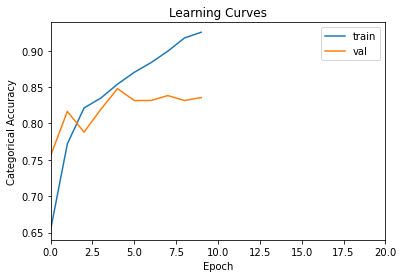

(6630, 50, 50, 1)
(736, 50, 50, 1)
Epoch 1/20
104/104 [==============================] - 30s 277ms/step - loss: 0.8958 - categorical_accuracy: 0.6483 - val_loss: 0.6315 - val_categorical_accuracy: 0.7391
Epoch 2/20
104/104 [==============================] - 25s 242ms/step - loss: 0.6097 - categorical_accuracy: 0.7721 - val_loss: 0.5253 - val_categorical_accuracy: 0.8016
Epoch 3/20
104/104 [==============================] - 23s 224ms/step - loss: 0.4970 - categorical_accuracy: 0.8207 - val_loss: 0.4917 - val_categorical_accuracy: 0.8247
Epoch 4/20
104/104 [==============================] - 27s 264ms/step - loss: 0.4315 - categorical_accuracy: 0.8442 - val_loss: 0.4597 - val_categorical_accuracy: 0.8370
Epoch 5/20
104/104 [==============================] - 25s 241ms/step - loss: 0.3807 - categorical_accuracy: 0.8602 - val_loss: 0.4578 - val_categorical_accuracy: 0.8397
Epoch 6/20
104/104 [==============================] - 24s 227ms/step - loss: 0.3484 - categorical_accuracy: 0.8754 - val

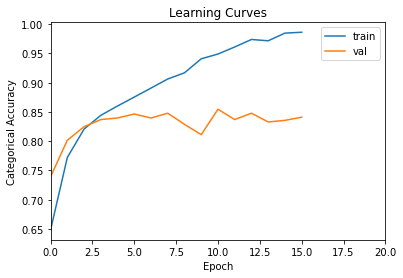

(6630, 50, 50, 1)
(736, 50, 50, 1)
Epoch 1/20
104/104 [==============================] - 25s 234ms/step - loss: 0.8909 - categorical_accuracy: 0.6554 - val_loss: 0.6420 - val_categorical_accuracy: 0.7541
Epoch 2/20
104/104 [==============================] - 22s 215ms/step - loss: 0.5787 - categorical_accuracy: 0.7839 - val_loss: 0.5066 - val_categorical_accuracy: 0.8207
Epoch 3/20
104/104 [==============================] - 22s 213ms/step - loss: 0.4721 - categorical_accuracy: 0.8273 - val_loss: 0.4914 - val_categorical_accuracy: 0.8234
Epoch 4/20
104/104 [==============================] - 22s 213ms/step - loss: 0.4153 - categorical_accuracy: 0.8508 - val_loss: 0.4574 - val_categorical_accuracy: 0.8315
Epoch 5/20
104/104 [==============================] - 24s 234ms/step - loss: 0.3646 - categorical_accuracy: 0.8673 - val_loss: 0.4471 - val_categorical_accuracy: 0.8397
Epoch 6/20
104/104 [==============================] - 25s 241ms/step - loss: 0.3263 - categorical_accuracy: 0.8849 - val

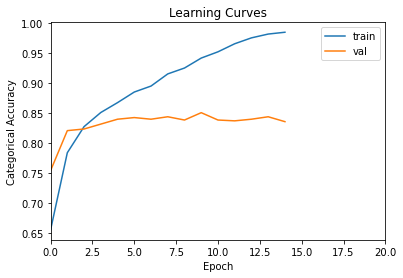

(6630, 50, 50, 1)
(736, 50, 50, 1)
Epoch 1/20
104/104 [==============================] - 24s 231ms/step - loss: 0.9379 - categorical_accuracy: 0.6335 - val_loss: 0.6887 - val_categorical_accuracy: 0.7174
Epoch 2/20
104/104 [==============================] - 25s 238ms/step - loss: 0.6207 - categorical_accuracy: 0.7688 - val_loss: 0.5598 - val_categorical_accuracy: 0.8043
Epoch 3/20
104/104 [==============================] - 26s 248ms/step - loss: 0.4913 - categorical_accuracy: 0.8193 - val_loss: 0.4839 - val_categorical_accuracy: 0.8342
Epoch 4/20
104/104 [==============================] - 25s 237ms/step - loss: 0.4382 - categorical_accuracy: 0.8404 - val_loss: 0.4754 - val_categorical_accuracy: 0.8315
Epoch 5/20
104/104 [==============================] - 24s 232ms/step - loss: 0.3849 - categorical_accuracy: 0.8618 - val_loss: 0.5170 - val_categorical_accuracy: 0.8193
Epoch 6/20
104/104 [==============================] - 24s 228ms/step - loss: 0.3441 - categorical_accuracy: 0.8756 - val

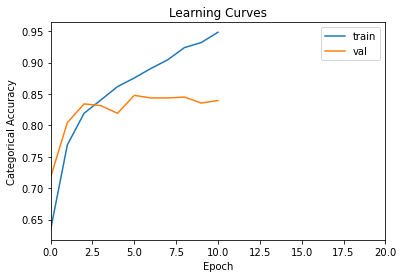

(6630, 50, 50, 1)
(736, 50, 50, 1)
Epoch 1/20
104/104 [==============================] - 25s 234ms/step - loss: 0.9601 - categorical_accuracy: 0.6240 - val_loss: 0.7073 - val_categorical_accuracy: 0.7228
Epoch 2/20
104/104 [==============================] - 22s 211ms/step - loss: 0.6163 - categorical_accuracy: 0.7697 - val_loss: 0.5506 - val_categorical_accuracy: 0.8139
Epoch 3/20
104/104 [==============================] - 22s 210ms/step - loss: 0.5102 - categorical_accuracy: 0.8158 - val_loss: 0.4886 - val_categorical_accuracy: 0.8139
Epoch 4/20
104/104 [==============================] - 23s 224ms/step - loss: 0.4476 - categorical_accuracy: 0.8388 - val_loss: 0.5198 - val_categorical_accuracy: 0.8084
Epoch 5/20
104/104 [==============================] - 23s 223ms/step - loss: 0.3981 - categorical_accuracy: 0.8563 - val_loss: 0.4802 - val_categorical_accuracy: 0.8356
Epoch 6/20
104/104 [==============================] - 22s 211ms/step - loss: 0.3489 - categorical_accuracy: 0.8712 - val

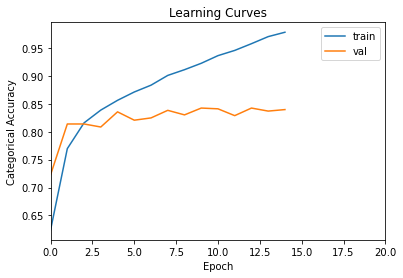

Model accuracy =  0.7598110616068462


In [21]:
#Define parameters
batch_size = 64
epochs = 20
num_classes = 4
patience = 5

accuracy = []
for i in range(5):
    #Define model
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),input_shape=(50,50,1),padding='same')) #Convolution layer
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D((2, 2),padding='same')) #Pooling layer
    model.add(Conv2D(64, (3, 3),padding='same'))
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

    model.add(Flatten())
    model.add(Dense(128, activation='linear')) #Fully connected layer
    model.add(LeakyReLU(alpha=0.1))                  
    model.add(Dense(num_classes, activation='softmax')) #Output layer

    model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False), optimizer=keras.optimizers.Adam(),metrics=['categorical_accuracy'])

    
    acc = model_CNN(model, epochs, batch_size, patience)
    accuracy.append(acc)

accuracy = np.median(accuracy)
print("Model accuracy = ", accuracy)

### 7th CNN model <a name="CNN4"></a>
    We will use two convolutional layers:
        -The first layer will have 32 3x3 filters,
        -The second layer will have 64 3x3 filters
    In addition, there are three max-pooling layers each of size 2 x 2.
    We add the Leaky ReLU activation function which helps the network learn non-linear decision boundaries.
    Fully connected relu layer at the end (instead of linear)

(6630, 50, 50, 1)
(736, 50, 50, 1)
Epoch 1/20
104/104 [==============================] - 22s 210ms/step - loss: 0.9065 - categorical_accuracy: 0.6504 - val_loss: 0.6759 - val_categorical_accuracy: 0.7092
Epoch 2/20
104/104 [==============================] - 25s 243ms/step - loss: 0.6118 - categorical_accuracy: 0.7753 - val_loss: 0.5544 - val_categorical_accuracy: 0.7976
Epoch 3/20
104/104 [==============================] - 25s 238ms/step - loss: 0.4960 - categorical_accuracy: 0.8226 - val_loss: 0.4874 - val_categorical_accuracy: 0.8274
Epoch 4/20
104/104 [==============================] - 24s 233ms/step - loss: 0.4371 - categorical_accuracy: 0.8412 - val_loss: 0.4879 - val_categorical_accuracy: 0.8288
Epoch 5/20
104/104 [==============================] - 26s 247ms/step - loss: 0.3924 - categorical_accuracy: 0.8585 - val_loss: 0.4734 - val_categorical_accuracy: 0.8274
Epoch 6/20
104/104 [==============================] - 26s 245ms/step - loss: 0.3495 - categorical_accuracy: 0.8725 - val

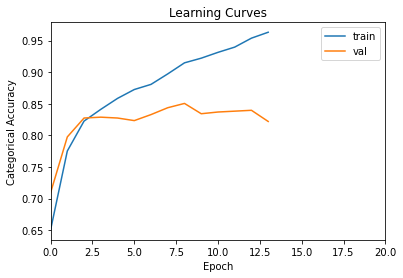

(6630, 50, 50, 1)
(736, 50, 50, 1)
Epoch 1/20
104/104 [==============================] - 22s 212ms/step - loss: 0.9678 - categorical_accuracy: 0.6297 - val_loss: 0.7219 - val_categorical_accuracy: 0.7092
Epoch 2/20
104/104 [==============================] - 24s 229ms/step - loss: 0.6611 - categorical_accuracy: 0.7532 - val_loss: 0.6039 - val_categorical_accuracy: 0.7826
Epoch 3/20
104/104 [==============================] - 25s 242ms/step - loss: 0.5429 - categorical_accuracy: 0.8006 - val_loss: 0.6032 - val_categorical_accuracy: 0.7785
Epoch 4/20
104/104 [==============================] - 26s 245ms/step - loss: 0.4945 - categorical_accuracy: 0.8192 - val_loss: 0.5321 - val_categorical_accuracy: 0.7976
Epoch 5/20
104/104 [==============================] - 27s 263ms/step - loss: 0.4327 - categorical_accuracy: 0.8459 - val_loss: 0.4646 - val_categorical_accuracy: 0.8397
Epoch 6/20
104/104 [==============================] - 26s 250ms/step - loss: 0.3928 - categorical_accuracy: 0.8621 - val

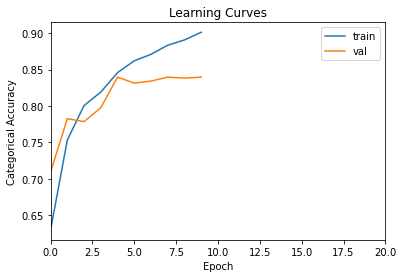

(6630, 50, 50, 1)
(736, 50, 50, 1)
Epoch 1/20
104/104 [==============================] - 26s 242ms/step - loss: 0.9199 - categorical_accuracy: 0.6397 - val_loss: 0.6952 - val_categorical_accuracy: 0.7323
Epoch 2/20
104/104 [==============================] - 30s 286ms/step - loss: 0.6430 - categorical_accuracy: 0.7629 - val_loss: 0.5600 - val_categorical_accuracy: 0.7853
Epoch 3/20
104/104 [==============================] - 25s 238ms/step - loss: 0.5298 - categorical_accuracy: 0.8023 - val_loss: 0.5903 - val_categorical_accuracy: 0.7921
Epoch 4/20
104/104 [==============================] - 24s 234ms/step - loss: 0.4673 - categorical_accuracy: 0.8309 - val_loss: 0.5461 - val_categorical_accuracy: 0.8043
Epoch 5/20
104/104 [==============================] - 24s 228ms/step - loss: 0.4066 - categorical_accuracy: 0.8535 - val_loss: 0.5027 - val_categorical_accuracy: 0.8261
Epoch 6/20
104/104 [==============================] - 27s 259ms/step - loss: 0.3743 - categorical_accuracy: 0.8635 - val

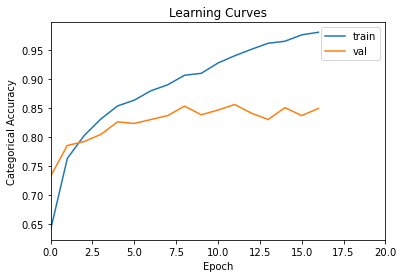

(6630, 50, 50, 1)
(736, 50, 50, 1)
Epoch 1/20
104/104 [==============================] - 30s 285ms/step - loss: 0.9446 - categorical_accuracy: 0.6339 - val_loss: 0.7548 - val_categorical_accuracy: 0.7160
Epoch 2/20
104/104 [==============================] - 24s 231ms/step - loss: 0.6666 - categorical_accuracy: 0.7474 - val_loss: 0.5707 - val_categorical_accuracy: 0.8016
Epoch 3/20
104/104 [==============================] - 23s 225ms/step - loss: 0.5294 - categorical_accuracy: 0.8069 - val_loss: 0.5363 - val_categorical_accuracy: 0.8030
Epoch 4/20
104/104 [==============================] - 25s 237ms/step - loss: 0.4919 - categorical_accuracy: 0.8232 - val_loss: 0.5420 - val_categorical_accuracy: 0.7894
Epoch 5/20
104/104 [==============================] - 23s 219ms/step - loss: 0.4360 - categorical_accuracy: 0.8454 - val_loss: 0.4800 - val_categorical_accuracy: 0.8410
Epoch 6/20
104/104 [==============================] - 23s 218ms/step - loss: 0.4034 - categorical_accuracy: 0.8585 - val

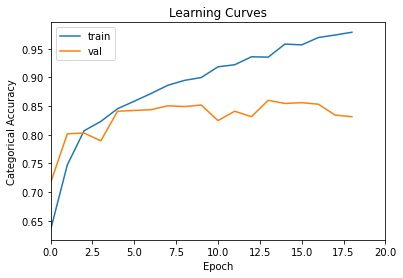

(6630, 50, 50, 1)
(736, 50, 50, 1)
Epoch 1/20
104/104 [==============================] - 22s 206ms/step - loss: 0.9247 - categorical_accuracy: 0.6404 - val_loss: 0.7140 - val_categorical_accuracy: 0.7133
Epoch 2/20
104/104 [==============================] - 23s 225ms/step - loss: 0.6589 - categorical_accuracy: 0.7493 - val_loss: 0.5912 - val_categorical_accuracy: 0.7758
Epoch 3/20
104/104 [==============================] - 22s 213ms/step - loss: 0.5306 - categorical_accuracy: 0.8074 - val_loss: 0.5718 - val_categorical_accuracy: 0.7826
Epoch 4/20
104/104 [==============================] - 23s 218ms/step - loss: 0.4564 - categorical_accuracy: 0.8332 - val_loss: 0.4938 - val_categorical_accuracy: 0.8193
Epoch 5/20
104/104 [==============================] - 24s 227ms/step - loss: 0.4139 - categorical_accuracy: 0.8519 - val_loss: 0.5144 - val_categorical_accuracy: 0.8071
Epoch 6/20
104/104 [==============================] - 24s 235ms/step - loss: 0.3924 - categorical_accuracy: 0.8585 - val

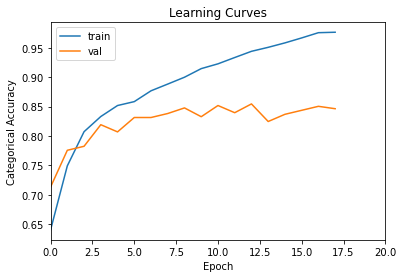

Model accuracy =  0.7641489252090221


In [22]:
#Define parameters
batch_size = 64
epochs = 20
num_classes = 4
patience = 5

accuracy = []
for i in range(5):
    #Define model
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(50,50,1),padding='same')) #Convolution layer
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D((2, 2),padding='same')) #Pooling layer
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

    model.add(Flatten())
    model.add(Dense(128, activation='relu')) #Fully connected layer
    model.add(LeakyReLU(alpha=0.1))                  
    model.add(Dense(num_classes, activation='softmax')) #Output layer

    model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False), optimizer=keras.optimizers.Adam(),metrics=['categorical_accuracy'])

    
    acc = model_CNN(model, epochs, batch_size, patience)
    accuracy.append(acc)

accuracy = np.median(accuracy)
print("Model accuracy = ", accuracy)

### Average Pooling

In [23]:
#Define parameters
batch_size = 64
epochs = 20
num_classes = 4
patience = 5

(6630, 50, 50, 1)
(736, 50, 50, 1)
Epoch 1/20
104/104 [==============================] - 22s 205ms/step - loss: 0.9021 - categorical_accuracy: 0.6400 - val_loss: 0.6719 - val_categorical_accuracy: 0.7323
Epoch 2/20
104/104 [==============================] - 21s 204ms/step - loss: 0.6493 - categorical_accuracy: 0.7537 - val_loss: 0.5811 - val_categorical_accuracy: 0.7826
Epoch 3/20
104/104 [==============================] - 22s 211ms/step - loss: 0.5615 - categorical_accuracy: 0.7956 - val_loss: 0.5517 - val_categorical_accuracy: 0.8043
Epoch 4/20
104/104 [==============================] - 21s 201ms/step - loss: 0.5080 - categorical_accuracy: 0.8167 - val_loss: 0.5131 - val_categorical_accuracy: 0.8193
Epoch 5/20
104/104 [==============================] - 21s 207ms/step - loss: 0.4613 - categorical_accuracy: 0.8327 - val_loss: 0.4964 - val_categorical_accuracy: 0.8193
Epoch 6/20
104/104 [==============================] - 23s 218ms/step - loss: 0.4127 - categorical_accuracy: 0.8540 - val

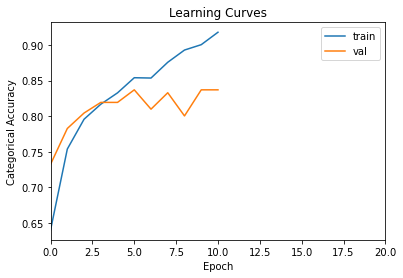

(6630, 50, 50, 1)
(736, 50, 50, 1)
Epoch 1/20
104/104 [==============================] - 21s 197ms/step - loss: 0.8718 - categorical_accuracy: 0.6596 - val_loss: 0.6349 - val_categorical_accuracy: 0.7609
Epoch 2/20
104/104 [==============================] - 20s 189ms/step - loss: 0.6271 - categorical_accuracy: 0.7664 - val_loss: 0.5559 - val_categorical_accuracy: 0.7758
Epoch 3/20
104/104 [==============================] - 20s 188ms/step - loss: 0.5462 - categorical_accuracy: 0.8018 - val_loss: 0.5068 - val_categorical_accuracy: 0.8111
Epoch 4/20
104/104 [==============================] - 21s 198ms/step - loss: 0.4866 - categorical_accuracy: 0.8232 - val_loss: 0.5014 - val_categorical_accuracy: 0.8179
Epoch 5/20
104/104 [==============================] - 22s 207ms/step - loss: 0.4436 - categorical_accuracy: 0.8392 - val_loss: 0.4972 - val_categorical_accuracy: 0.8234
Epoch 6/20
104/104 [==============================] - 22s 213ms/step - loss: 0.4129 - categorical_accuracy: 0.8525 - val

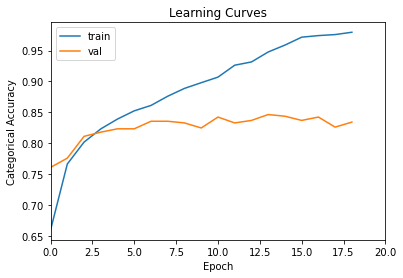

(6630, 50, 50, 1)
(736, 50, 50, 1)
Epoch 1/20
104/104 [==============================] - 24s 226ms/step - loss: 0.9258 - categorical_accuracy: 0.6290 - val_loss: 0.7318 - val_categorical_accuracy: 0.7092
Epoch 2/20
104/104 [==============================] - 22s 216ms/step - loss: 0.6621 - categorical_accuracy: 0.7510 - val_loss: 0.5766 - val_categorical_accuracy: 0.7677
Epoch 3/20
104/104 [==============================] - 21s 205ms/step - loss: 0.5588 - categorical_accuracy: 0.7956 - val_loss: 0.5308 - val_categorical_accuracy: 0.8071
Epoch 4/20
104/104 [==============================] - 22s 210ms/step - loss: 0.5153 - categorical_accuracy: 0.8097 - val_loss: 0.5082 - val_categorical_accuracy: 0.8166
Epoch 5/20
104/104 [==============================] - 20s 196ms/step - loss: 0.4640 - categorical_accuracy: 0.8327 - val_loss: 0.5198 - val_categorical_accuracy: 0.8043
Epoch 6/20
104/104 [==============================] - 22s 211ms/step - loss: 0.4251 - categorical_accuracy: 0.8501 - val

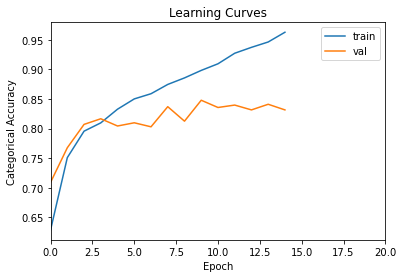

(6630, 50, 50, 1)
(736, 50, 50, 1)
Epoch 1/20
104/104 [==============================] - 22s 210ms/step - loss: 0.9090 - categorical_accuracy: 0.6412 - val_loss: 0.7058 - val_categorical_accuracy: 0.7133
Epoch 2/20
104/104 [==============================] - 23s 222ms/step - loss: 0.6619 - categorical_accuracy: 0.7535 - val_loss: 0.5578 - val_categorical_accuracy: 0.7880
Epoch 3/20
104/104 [==============================] - 23s 219ms/step - loss: 0.5507 - categorical_accuracy: 0.7959 - val_loss: 0.5354 - val_categorical_accuracy: 0.8003
Epoch 4/20
104/104 [==============================] - 21s 203ms/step - loss: 0.4929 - categorical_accuracy: 0.8208 - val_loss: 0.5178 - val_categorical_accuracy: 0.8071
Epoch 5/20
104/104 [==============================] - 21s 201ms/step - loss: 0.4533 - categorical_accuracy: 0.8395 - val_loss: 0.5421 - val_categorical_accuracy: 0.8071
Epoch 6/20
104/104 [==============================] - 21s 204ms/step - loss: 0.4167 - categorical_accuracy: 0.8505 - val

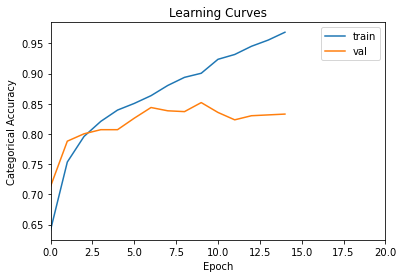

(6630, 50, 50, 1)
(736, 50, 50, 1)
Epoch 1/20
104/104 [==============================] - 24s 227ms/step - loss: 0.9427 - categorical_accuracy: 0.6326 - val_loss: 0.7059 - val_categorical_accuracy: 0.7323
Epoch 2/20
104/104 [==============================] - 21s 199ms/step - loss: 0.6533 - categorical_accuracy: 0.7544 - val_loss: 0.5741 - val_categorical_accuracy: 0.7785
Epoch 3/20
104/104 [==============================] - 24s 234ms/step - loss: 0.5578 - categorical_accuracy: 0.7968 - val_loss: 0.5419 - val_categorical_accuracy: 0.7908
Epoch 4/20
104/104 [==============================] - 22s 210ms/step - loss: 0.5085 - categorical_accuracy: 0.8199 - val_loss: 0.5360 - val_categorical_accuracy: 0.7976
Epoch 5/20
104/104 [==============================] - 22s 212ms/step - loss: 0.4613 - categorical_accuracy: 0.8336 - val_loss: 0.4964 - val_categorical_accuracy: 0.8193- categorical_ac - ETA: 8s - los
Epoch 6/20
104/104 [==============================] - 20s 196ms/step - loss: 0.4259 - ca

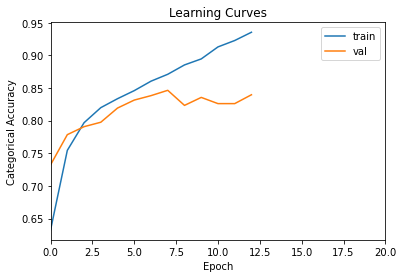

Model accuracy =  0.7434303107672596


In [24]:


accuracy = []
for i in range(5):
    #Define model
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(50,50,1),padding='same')) #Convolution layer
    model.add(LeakyReLU(alpha=0.1))
    
    model.add(AveragePooling2D((2, 2),padding='same')) #Pooling layer
    model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
    model.add(LeakyReLU(alpha=0.1))
                

    model.add(AveragePooling2D(pool_size=(2, 2),padding='same'))
    model.add(Flatten())
    model.add(Dense(128, activation='linear')) #Fully connected layer
    model.add(LeakyReLU(alpha=0.1))                  
    model.add(Dense(num_classes, activation='softmax')) #Output layer



    model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False), optimizer=keras.optimizers.Adam(),metrics=['categorical_accuracy'])

    acc = model_CNN(model, epochs, batch_size, patience)
    accuracy.append(acc)

accuracy = np.median(accuracy)
print("Model accuracy = ", accuracy)

### Test Dropout

(6630, 50, 50, 1)
(736, 50, 50, 1)
Epoch 1/20
104/104 [==============================] - 26s 242ms/step - loss: 1.0240 - categorical_accuracy: 0.6060 - val_loss: 1.0750 - val_categorical_accuracy: 0.6943
Epoch 2/20
104/104 [==============================] - 29s 284ms/step - loss: 0.7954 - categorical_accuracy: 0.6899 - val_loss: 0.9416 - val_categorical_accuracy: 0.6929
Epoch 3/20
104/104 [==============================] - 26s 247ms/step - loss: 0.6986 - categorical_accuracy: 0.7332 - val_loss: 0.8467 - val_categorical_accuracy: 0.7201
Epoch 4/20
104/104 [==============================] - 28s 268ms/step - loss: 0.6332 - categorical_accuracy: 0.7609 - val_loss: 0.8275 - val_categorical_accuracy: 0.7432
Epoch 5/20
104/104 [==============================] - 26s 251ms/step - loss: 0.6018 - categorical_accuracy: 0.7730 - val_loss: 0.8096 - val_categorical_accuracy: 0.7106
Epoch 6/20
104/104 [==============================] - 27s 264ms/step - loss: 0.5715 - categorical_accuracy: 0.7881 - val

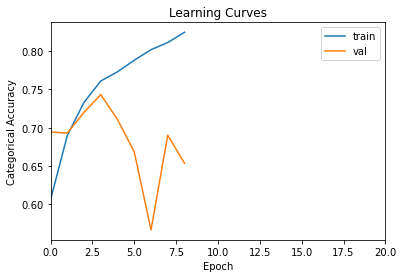

(6630, 50, 50, 1)
(736, 50, 50, 1)
Epoch 1/20
104/104 [==============================] - 26s 238ms/step - loss: 1.0608 - categorical_accuracy: 0.5943 - val_loss: 1.1521 - val_categorical_accuracy: 0.6440
Epoch 2/20
104/104 [==============================] - 25s 244ms/step - loss: 0.8575 - categorical_accuracy: 0.6564 - val_loss: 0.9254 - val_categorical_accuracy: 0.6698
Epoch 3/20
104/104 [==============================] - 24s 234ms/step - loss: 0.7167 - categorical_accuracy: 0.7253 - val_loss: 0.9065 - val_categorical_accuracy: 0.6821
Epoch 4/20
104/104 [==============================] - 29s 280ms/step - loss: 0.6443 - categorical_accuracy: 0.7560 - val_loss: 0.8099 - val_categorical_accuracy: 0.7323
Epoch 5/20
104/104 [==============================] - 27s 256ms/step - loss: 0.6188 - categorical_accuracy: 0.7701 - val_loss: 0.8534 - val_categorical_accuracy: 0.6726
Epoch 6/20
104/104 [==============================] - 28s 267ms/step - loss: 0.5630 - categorical_accuracy: 0.7982 - val

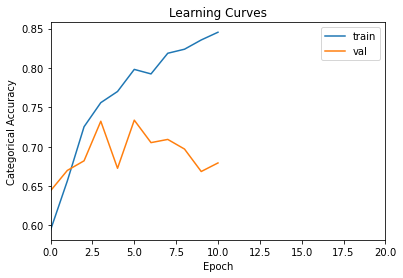

(6630, 50, 50, 1)
(736, 50, 50, 1)
Epoch 1/20
104/104 [==============================] - 25s 234ms/step - loss: 1.0666 - categorical_accuracy: 0.6018 - val_loss: 1.0273 - val_categorical_accuracy: 0.6264
Epoch 2/20
104/104 [==============================] - 24s 234ms/step - loss: 0.8418 - categorical_accuracy: 0.6620 - val_loss: 0.7680 - val_categorical_accuracy: 0.7283
Epoch 3/20
104/104 [==============================] - 26s 253ms/step - loss: 0.7113 - categorical_accuracy: 0.7293 - val_loss: 0.7804 - val_categorical_accuracy: 0.7351
Epoch 4/20
104/104 [==============================] - 26s 253ms/step - loss: 0.6589 - categorical_accuracy: 0.7535 - val_loss: 0.7374 - val_categorical_accuracy: 0.7473
Epoch 5/20
104/104 [==============================] - 27s 261ms/step - loss: 0.6002 - categorical_accuracy: 0.7775 - val_loss: 0.8206 - val_categorical_accuracy: 0.7079
Epoch 6/20
104/104 [==============================] - 28s 270ms/step - loss: 0.5671 - categorical_accuracy: 0.7910 - val

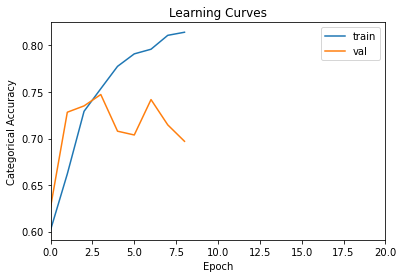

(6630, 50, 50, 1)
(736, 50, 50, 1)
Epoch 1/20
104/104 [==============================] - 26s 237ms/step - loss: 1.0445 - categorical_accuracy: 0.5922 - val_loss: 1.0216 - val_categorical_accuracy: 0.6250
Epoch 2/20
104/104 [==============================] - 27s 263ms/step - loss: 0.8383 - categorical_accuracy: 0.6630 - val_loss: 0.9194 - val_categorical_accuracy: 0.6834
Epoch 3/20
104/104 [==============================] - 27s 256ms/step - loss: 0.7202 - categorical_accuracy: 0.7278 - val_loss: 0.7941 - val_categorical_accuracy: 0.7188
Epoch 4/20
104/104 [==============================] - 26s 246ms/step - loss: 0.6587 - categorical_accuracy: 0.7551 - val_loss: 0.8116 - val_categorical_accuracy: 0.7323
Epoch 5/20
104/104 [==============================] - 25s 244ms/step - loss: 0.6024 - categorical_accuracy: 0.7793 - val_loss: 0.9068 - val_categorical_accuracy: 0.6617
Epoch 6/20
104/104 [==============================] - 24s 234ms/step - loss: 0.5755 - categorical_accuracy: 0.7863 - val

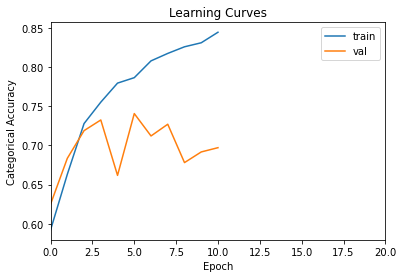

(6630, 50, 50, 1)
(736, 50, 50, 1)
Epoch 1/20
104/104 [==============================] - 26s 245ms/step - loss: 1.0402 - categorical_accuracy: 0.6053 - val_loss: 1.0192 - val_categorical_accuracy: 0.6399
Epoch 2/20
104/104 [==============================] - 26s 249ms/step - loss: 0.8199 - categorical_accuracy: 0.6813 - val_loss: 0.8873 - val_categorical_accuracy: 0.6943
Epoch 3/20
104/104 [==============================] - 26s 247ms/step - loss: 0.6945 - categorical_accuracy: 0.7380 - val_loss: 0.8938 - val_categorical_accuracy: 0.7038
Epoch 4/20
104/104 [==============================] - 25s 243ms/step - loss: 0.6331 - categorical_accuracy: 0.7623 - val_loss: 0.9094 - val_categorical_accuracy: 0.6943
Epoch 5/20
104/104 [==============================] - 26s 246ms/step - loss: 0.5957 - categorical_accuracy: 0.7716 - val_loss: 0.7771 - val_categorical_accuracy: 0.7296
Epoch 6/20
104/104 [==============================] - 27s 264ms/step - loss: 0.5621 - categorical_accuracy: 0.7929 - val

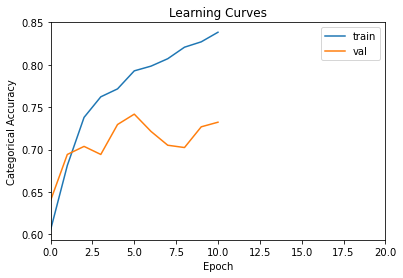

Model accuracy =  0.5850657662429378


In [25]:
batch_size = 64
epochs = 20
num_classes = 4
patience = 5


accuracy = []
for i in range(5):
    #Define model
    model = Sequential()
    model.add(Dropout(0.3))
    model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(50,50,1),padding='same')) #Convolution layer
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D((2, 2),padding='same')) #Pooling layer
    model.add(Dropout(0.3))
    model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

    model.add(Flatten())
    model.add(Dense(128, activation='linear')) #Fully connected layer
    model.add(LeakyReLU(alpha=0.1))                  
    model.add(Dense(num_classes, activation='softmax')) #Output layer

    model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False), optimizer=keras.optimizers.Adam(),metrics=['categorical_accuracy'])

    
    acc = model_CNN(model, epochs, batch_size, patience)
    accuracy.append(acc)

accuracy = np.median(accuracy)
print("Model accuracy = ", accuracy)

## 3) K-means Clustering <a name="Kmeans"></a>

In [26]:
def kmeans_model(x_training_set, y_training_set):
    
    # Normalize the dataset
    X_train_n = X_train / 255.0

    # Cross-validation:
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(x_training_set)
    
    
    kmeans = KMeans(
        init="random",
        n_clusters=4,
        n_init=10,
        max_iter=400,
        random_state=42
   )
    kmeans.fit(scaled_data)
            
    # Calculate accuracy
    acc = balanced_accuracy_score(y_training_set, kmeans.labels_)
    
    print(acc)

In [27]:
kmeans_model(X_train, Y_train)

0.22838148974189795


## 4) Decision Trees <a name="Tree"></a>

In [28]:
from sklearn import tree

x_training, y_training, x_validation, y_validation = cross_validation(X_train, Y_train, 0)

clf = tree.DecisionTreeClassifier()
clf.fit(x_training, y_training)

y_hat = clf.predict(x_validation)

acc = balanced_accuracy_score(y_validation, y_hat)

print(acc)


0.45084794273976314


In [29]:
x_training, y_training, x_validation, y_validation = cross_validation(X_train, Y_train, 0)

clf = tree.DecisionTreeClassifier(criterion="entropy")
clf.fit(x_training, y_training)

y_hat = clf.predict(x_validation)

acc = balanced_accuracy_score(y_validation, y_hat)

print(acc)

0.47806207884023366


In [30]:
x_training, y_training, x_validation, y_validation = cross_validation(X_train, Y_train, 0)

clf = tree.DecisionTreeClassifier(criterion="entropy", class_weight="balanced")
clf.fit(x_training, y_training)

y_hat = clf.predict(x_validation)

acc = balanced_accuracy_score(y_validation, y_hat)

print(acc)

0.4719277611245212


## Dealing with Imbalanced Data<a name="CNNImb"></a>

In [8]:
def compile_best_model():
    
    #Define parameters
    batch_size = 64
    epochs = 20
    num_classes = 4
    patience = 5
    
    #Define model
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(4, 4),activation='relu',input_shape=(50,50,1),padding='same')) #Convolution layer
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D((2, 2),padding='same')) #Pooling layer
    
    model.add(Conv2D(64, (4, 4), activation='relu',padding='same'))
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

    model.add(Flatten())
    model.add(Dense(128, activation='relu')) #Fully connected layer
    model.add(LeakyReLU(alpha=0.1))                  
    model.add(Dense(num_classes, activation='softmax')) #Output layer

    model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False), optimizer=keras.optimizers.Adam(),metrics=['categorical_accuracy'])

    return model, batch_size, epochs, num_classes, patience

In [9]:
# Function that, given a matrix X containing data with labels y, returns each class data subset

def split_by_class(X, y):
    
    # Get classes
    class_list = np.unique(y)
    
    # For each class, find the data in X and build subsets
    Subsets = []
    Labels = []
    
    y = np.ndarray.tolist(y)
    
    for Class in class_list:

        index = [i for i, e in enumerate(y) if e == Class]  # positions where class is found 
        x = X[index,:]
        Subsets.append(x)
        
        label = np.full((len(x), 1), Class)
        Labels.append(label)

    return Subsets, Labels


### Random Undersampling

original dataset shape: (6630,)
Resample dataset shape (1228,)
Epoch 1/20
20/20 [==============================] - 8s 355ms/step - loss: 1.4050 - categorical_accuracy: 0.2777 - val_loss: 1.3839 - val_categorical_accuracy: 0.2038
Epoch 2/20
20/20 [==============================] - 7s 331ms/step - loss: 1.3623 - categorical_accuracy: 0.3086 - val_loss: 1.2956 - val_categorical_accuracy: 0.2188
Epoch 3/20
20/20 [==============================] - 6s 323ms/step - loss: 1.2426 - categorical_accuracy: 0.4349 - val_loss: 1.0543 - val_categorical_accuracy: 0.6182
Epoch 4/20
20/20 [==============================] - 6s 317ms/step - loss: 1.1390 - categorical_accuracy: 0.5138 - val_loss: 1.1025 - val_categorical_accuracy: 0.5231
Epoch 5/20
20/20 [==============================] - 7s 354ms/step - loss: 0.9914 - categorical_accuracy: 0.6067 - val_loss: 1.0009 - val_categorical_accuracy: 0.5720
Epoch 6/20
20/20 [==============================] - 7s 350ms/step - loss: 0.8243 - categorical_accuracy: 0.

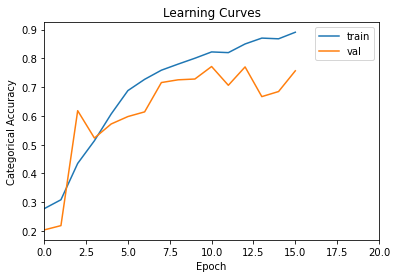

original dataset shape: (6630,)
Resample dataset shape (1228,)
Epoch 1/20
20/20 [==============================] - 7s 341ms/step - loss: 1.4056 - categorical_accuracy: 0.2695 - val_loss: 1.3658 - val_categorical_accuracy: 0.2568
Epoch 2/20
20/20 [==============================] - 8s 380ms/step - loss: 1.3032 - categorical_accuracy: 0.4194 - val_loss: 1.1588 - val_categorical_accuracy: 0.4266
Epoch 3/20
20/20 [==============================] - 7s 343ms/step - loss: 1.1212 - categorical_accuracy: 0.5546 - val_loss: 1.5765 - val_categorical_accuracy: 0.2269
Epoch 4/20
20/20 [==============================] - 7s 362ms/step - loss: 1.0013 - categorical_accuracy: 0.6189 - val_loss: 0.9501 - val_categorical_accuracy: 0.6209
Epoch 5/20
20/20 [==============================] - 7s 340ms/step - loss: 0.9046 - categorical_accuracy: 0.6490 - val_loss: 0.8434 - val_categorical_accuracy: 0.6807
Epoch 6/20
20/20 [==============================] - 7s 358ms/step - loss: 0.8131 - categorical_accuracy: 0.

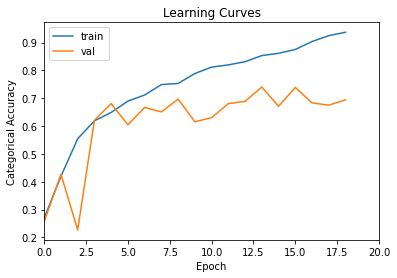

original dataset shape: (6630,)
Resample dataset shape (1228,)
Epoch 1/20
20/20 [==============================] - 7s 343ms/step - loss: 1.3932 - categorical_accuracy: 0.2638 - val_loss: 1.3639 - val_categorical_accuracy: 0.2486
Epoch 2/20
20/20 [==============================] - 7s 370ms/step - loss: 1.3002 - categorical_accuracy: 0.4039 - val_loss: 1.3122 - val_categorical_accuracy: 0.2962
Epoch 3/20
20/20 [==============================] - 7s 349ms/step - loss: 1.1258 - categorical_accuracy: 0.5342 - val_loss: 1.2082 - val_categorical_accuracy: 0.3438
Epoch 4/20
20/20 [==============================] - 6s 298ms/step - loss: 1.0219 - categorical_accuracy: 0.5814 - val_loss: 1.0783 - val_categorical_accuracy: 0.5408
Epoch 5/20
20/20 [==============================] - 6s 323ms/step - loss: 0.8725 - categorical_accuracy: 0.6775 - val_loss: 1.0500 - val_categorical_accuracy: 0.5530
Epoch 6/20
20/20 [==============================] - 7s 332ms/step - loss: 0.7457 - categorical_accuracy: 0.

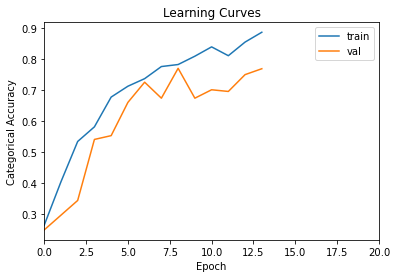

original dataset shape: (6630,)
Resample dataset shape (1228,)
Epoch 1/20
20/20 [==============================] - 7s 340ms/step - loss: 1.3904 - categorical_accuracy: 0.2809 - val_loss: 1.4006 - val_categorical_accuracy: 0.2446
Epoch 2/20
20/20 [==============================] - 7s 331ms/step - loss: 1.2952 - categorical_accuracy: 0.4210 - val_loss: 1.3885 - val_categorical_accuracy: 0.2908
Epoch 3/20
20/20 [==============================] - 6s 324ms/step - loss: 1.1436 - categorical_accuracy: 0.5081 - val_loss: 1.2700 - val_categorical_accuracy: 0.3451
Epoch 4/20
20/20 [==============================] - 7s 333ms/step - loss: 0.9956 - categorical_accuracy: 0.6059 - val_loss: 1.1388 - val_categorical_accuracy: 0.4823
Epoch 5/20
20/20 [==============================] - 6s 296ms/step - loss: 0.9187 - categorical_accuracy: 0.6360 - val_loss: 1.0281 - val_categorical_accuracy: 0.5625
Epoch 6/20
20/20 [==============================] - 6s 307ms/step - loss: 0.8141 - categorical_accuracy: 0.

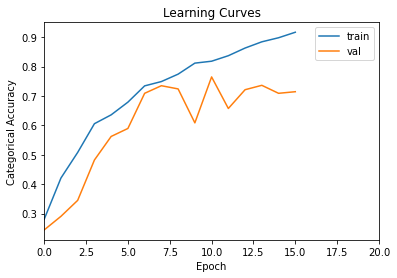

original dataset shape: (6630,)
Resample dataset shape (1228,)
Epoch 1/20
20/20 [==============================] - 7s 349ms/step - loss: 1.3998 - categorical_accuracy: 0.2769 - val_loss: 1.3682 - val_categorical_accuracy: 0.2133
Epoch 2/20
20/20 [==============================] - 6s 313ms/step - loss: 1.3251 - categorical_accuracy: 0.3607 - val_loss: 1.2416 - val_categorical_accuracy: 0.4117
Epoch 3/20
20/20 [==============================] - 6s 301ms/step - loss: 1.1959 - categorical_accuracy: 0.4593 - val_loss: 0.9681 - val_categorical_accuracy: 0.6685
Epoch 4/20
20/20 [==============================] - 7s 329ms/step - loss: 1.0439 - categorical_accuracy: 0.5814 - val_loss: 0.9451 - val_categorical_accuracy: 0.6467
Epoch 5/20
20/20 [==============================] - 6s 315ms/step - loss: 0.8847 - categorical_accuracy: 0.6637 - val_loss: 0.9039 - val_categorical_accuracy: 0.6481
Epoch 6/20
20/20 [==============================] - 6s 302ms/step - loss: 0.7887 - categorical_accuracy: 0.

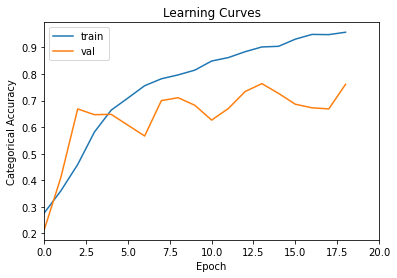

Model accuracy =  0.7329917457058648


In [46]:
def RandomUnderSampling(model, epochs, batch_size, patience):
    # Cross-validation:
    x_training_set, y_training_set, x_testing_set, y_testing_set = cross_validation(X_train, Y_train, 0)

    RUS = RandomUnderSampler()
    x_rus, y_rus = RUS.fit_resample(x_training_set, y_training_set)

    print('original dataset shape:', np.shape(y_training_set))
    print('Resample dataset shape', np.shape(y_rus))


    #Reshape data
    x_rus = x_rus.reshape(-1, 50, 50, 1)
    x_testing_set = x_testing_set.reshape(-1, 50, 50, 1)

    x_rus = x_rus.astype('float32')
    x_testing_set = x_testing_set.astype('float32')
    x_rus = x_rus / 255.
    x_testing_set = x_testing_set / 255.

    
    # Convert labels into one-hot-encoding format
    y_val_ground = y_testing_set
    y_rus = onehotencoding(y_rus)
    y_testing_set = onehotencoding(y_testing_set)
    
    callback = tf.keras.callbacks.EarlyStopping(monitor='val_categorical_accuracy', patience = patience, restore_best_weights = True)

    train = model.fit(x_rus, y_rus, batch_size=batch_size,epochs=epochs,verbose=1,callbacks=[callback],validation_data=(x_testing_set, y_testing_set))
    test_eval = model.evaluate(x_testing_set, y_testing_set, verbose=0)
    
    predictions = model.predict(x_testing_set)

    # Find the class with maximum probability
    y_test = []

    for i in range(len(predictions)):
        y_test.append(np.argmax(predictions[i]))
    
    balacc = balanced_accuracy_score(y_val_ground, y_test)

    print('\nTest accuracy:', test_eval)
    print('\n Balanced accuracy:', balacc)
    
    # plot learning curves
    plt.title('Learning Curves')
    plt.xlabel('Epoch')
    plt.ylabel('Categorical Accuracy')
    plt.plot(train.history['categorical_accuracy'], label='train')
    plt.plot(train.history['val_categorical_accuracy'], label='val')
    plt.xlim([0, 20])
    plt.legend()
    plt.show()
    
    return balacc



accuracy = []
for i in range(5):    
    model, batch_size, epochs, num_classes, patience = compile_best_model()
    acc = RandomUnderSampling(model, epochs, batch_size, patience)
    accuracy.append(acc)

accuracy = np.median(accuracy)
print("Model accuracy = ", accuracy)

### Random Oversampling

original dataset shape: (6630,)
Resample dataset shape (16088,)
Epoch 1/20
252/252 [==============================] - 115s 303ms/step - loss: 0.9137 - categorical_accuracy: 0.6213 - val_loss: 0.6092 - val_categorical_accuracy: 0.7867
Epoch 2/20
252/252 [==============================] - 76s 303ms/step - loss: 0.5273 - categorical_accuracy: 0.8094 - val_loss: 0.5776 - val_categorical_accuracy: 0.8016
Epoch 3/20
252/252 [==============================] - 71s 283ms/step - loss: 0.3393 - categorical_accuracy: 0.8815 - val_loss: 0.5852 - val_categorical_accuracy: 0.7948
Epoch 4/20
252/252 [==============================] - 67s 267ms/step - loss: 0.2299 - categorical_accuracy: 0.9221 - val_loss: 0.5818 - val_categorical_accuracy: 0.8152
Epoch 5/20
252/252 [==============================] - 67s 265ms/step - loss: 0.1546 - categorical_accuracy: 0.9494 - val_loss: 0.5797 - val_categorical_accuracy: 0.8370
Epoch 6/20
252/252 [==============================] - 67s 264ms/step - loss: 0.1103 - cate

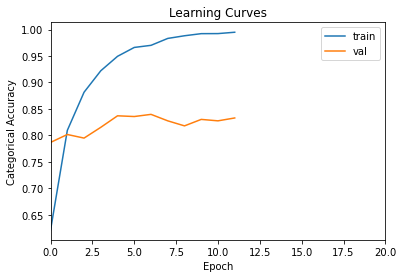

original dataset shape: (6630,)
Resample dataset shape (16088,)
Epoch 1/20
252/252 [==============================] - 69s 271ms/step - loss: 0.8798 - categorical_accuracy: 0.6406 - val_loss: 0.7518 - val_categorical_accuracy: 0.7255
Epoch 2/20
252/252 [==============================] - 68s 269ms/step - loss: 0.4501 - categorical_accuracy: 0.8394 - val_loss: 0.7226 - val_categorical_accuracy: 0.7337
Epoch 3/20
252/252 [==============================] - 68s 268ms/step - loss: 0.2809 - categorical_accuracy: 0.9026 - val_loss: 0.5317 - val_categorical_accuracy: 0.8098
Epoch 4/20
252/252 [==============================] - 68s 269ms/step - loss: 0.1842 - categorical_accuracy: 0.9375 - val_loss: 0.6015 - val_categorical_accuracy: 0.8274
Epoch 5/20
252/252 [==============================] - 67s 268ms/step - loss: 0.1169 - categorical_accuracy: 0.9616 - val_loss: 0.5750 - val_categorical_accuracy: 0.8370
Epoch 6/20
252/252 [==============================] - 68s 269ms/step - loss: 0.0874 - categ

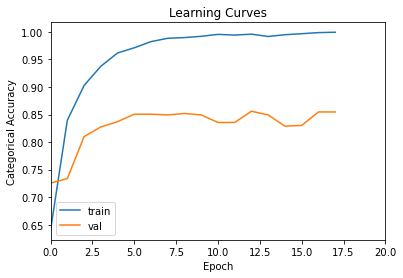

original dataset shape: (6630,)
Resample dataset shape (16088,)
Epoch 1/20
252/252 [==============================] - 69s 272ms/step - loss: 0.9511 - categorical_accuracy: 0.6002 - val_loss: 0.8850 - val_categorical_accuracy: 0.6603
Epoch 2/20
252/252 [==============================] - 71s 282ms/step - loss: 0.4960 - categorical_accuracy: 0.8184 - val_loss: 0.5889 - val_categorical_accuracy: 0.7758
Epoch 3/20
252/252 [==============================] - 72s 288ms/step - loss: 0.3201 - categorical_accuracy: 0.8905 - val_loss: 0.5455 - val_categorical_accuracy: 0.7948
Epoch 4/20
252/252 [==============================] - 67s 266ms/step - loss: 0.2196 - categorical_accuracy: 0.9267 - val_loss: 0.5550 - val_categorical_accuracy: 0.8152
Epoch 5/20
252/252 [==============================] - 71s 283ms/step - loss: 0.1471 - categorical_accuracy: 0.9533 - val_loss: 0.5529 - val_categorical_accuracy: 0.8342
Epoch 6/20
252/252 [==============================] - 71s 281ms/step - loss: 0.1068 - categ

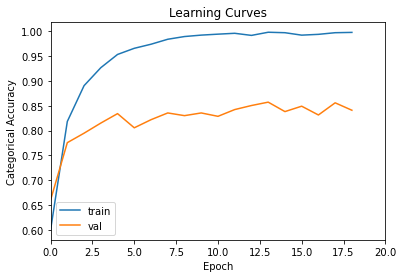

original dataset shape: (6630,)
Resample dataset shape (16088,)
Epoch 1/20
252/252 [==============================] - 71s 280ms/step - loss: 0.8594 - categorical_accuracy: 0.6568 - val_loss: 0.7762 - val_categorical_accuracy: 0.7188
Epoch 2/20
252/252 [==============================] - 72s 286ms/step - loss: 0.4754 - categorical_accuracy: 0.8309 - val_loss: 0.5125 - val_categorical_accuracy: 0.8329
Epoch 3/20
252/252 [==============================] - 74s 293ms/step - loss: 0.3014 - categorical_accuracy: 0.8980 - val_loss: 0.4484 - val_categorical_accuracy: 0.8614
Epoch 4/20
252/252 [==============================] - 73s 288ms/step - loss: 0.1966 - categorical_accuracy: 0.9358 - val_loss: 0.4881 - val_categorical_accuracy: 0.8519
Epoch 5/20
252/252 [==============================] - 83s 328ms/step - loss: 0.1261 - categorical_accuracy: 0.9581 - val_loss: 0.5831 - val_categorical_accuracy: 0.8451
Epoch 6/20
252/252 [==============================] - 82s 325ms/step - loss: 0.0856 - categ

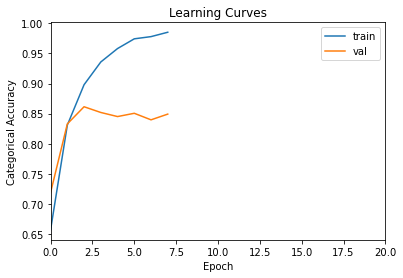

original dataset shape: (6630,)
Resample dataset shape (16088,)
Epoch 1/20
252/252 [==============================] - 75s 294ms/step - loss: 0.8684 - categorical_accuracy: 0.6567 - val_loss: 0.7183 - val_categorical_accuracy: 0.7323
Epoch 2/20
252/252 [==============================] - 75s 299ms/step - loss: 0.4891 - categorical_accuracy: 0.8254 - val_loss: 0.6958 - val_categorical_accuracy: 0.7337
Epoch 3/20
252/252 [==============================] - 72s 287ms/step - loss: 0.3157 - categorical_accuracy: 0.8929 - val_loss: 0.5053 - val_categorical_accuracy: 0.8356
Epoch 4/20
252/252 [==============================] - 72s 285ms/step - loss: 0.2275 - categorical_accuracy: 0.9245 - val_loss: 0.5080 - val_categorical_accuracy: 0.8397
Epoch 5/20
252/252 [==============================] - 73s 289ms/step - loss: 0.1504 - categorical_accuracy: 0.9507 - val_loss: 0.5702 - val_categorical_accuracy: 0.8329
Epoch 6/20
252/252 [==============================] - 75s 298ms/step - loss: 0.1158 - categ

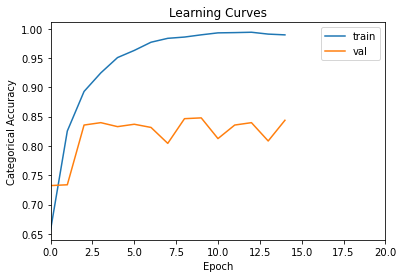

Model accuracy =  0.7597002372815764


In [47]:
def RandomOverSampling(model, epochs, batch_size, patience):
    # Cross-validation:
    x_training_set, y_training_set, x_testing_set, y_testing_set = cross_validation(X_train, Y_train, 0)

    ROS = RandomOverSampler()
    x_ros, y_ros = ROS.fit_resample(x_training_set, y_training_set)

    print('original dataset shape:', np.shape(y_training_set))
    print('Resample dataset shape', np.shape(y_ros))


    #Reshape data
    x_ros = x_ros.reshape(-1, 50, 50, 1)
    x_testing_set = x_testing_set.reshape(-1, 50, 50, 1)

    x_ros = x_ros.astype('float32')
    x_testing_set = x_testing_set.astype('float32')
    x_ros = x_ros / 255.
    x_testing_set = x_testing_set / 255.

    
    # Convert labels into one-hot-encoding format
    y_val_ground = y_testing_set
    y_ros = onehotencoding(y_ros)
    y_testing_set = onehotencoding(y_testing_set)
    
    callback = tf.keras.callbacks.EarlyStopping(monitor='val_categorical_accuracy', patience = patience, restore_best_weights = True)

    train = model.fit(x_ros, y_ros, batch_size=batch_size,epochs=epochs,verbose=1,callbacks=[callback],validation_data=(x_testing_set, y_testing_set))
    test_eval = model.evaluate(x_testing_set, y_testing_set, verbose=0)
    
    predictions = model.predict(x_testing_set)

    # Find the class with maximum probability
    y_test = []

    for i in range(len(predictions)):
        y_test.append(np.argmax(predictions[i]))
    
    balacc = balanced_accuracy_score(y_val_ground, y_test)

    print('\nTest accuracy:', test_eval)
    print('\n Balanced accuracy:', balacc)
    
    # plot learning curves
    plt.title('Learning Curves')
    plt.xlabel('Epoch')
    plt.ylabel('Categorical Accuracy')
    plt.plot(train.history['categorical_accuracy'], label='train')
    plt.plot(train.history['val_categorical_accuracy'], label='val')
    plt.xlim([0, 20])
    plt.legend()
    plt.show()
    
    return balacc


accuracy = []
for i in range(5):    
    model, batch_size, epochs, num_classes, patience = compile_best_model()
    acc = RandomOverSampling(model, epochs, batch_size, patience)
    accuracy.append(acc)

accuracy = np.median(accuracy)
print("Model accuracy = ", accuracy)

### Random Oversampling + Random Undersampling

(4602,)
(4602, 2500)
Epoch 1/20
72/72 [==============================] - 22s 299ms/step - loss: 1.2423 - categorical_accuracy: 0.4313 - val_loss: 1.0019 - val_categorical_accuracy: 0.5951
Epoch 2/20
72/72 [==============================] - 21s 292ms/step - loss: 0.8788 - categorical_accuracy: 0.6671 - val_loss: 1.1399 - val_categorical_accuracy: 0.5231
Epoch 3/20
72/72 [==============================] - 21s 287ms/step - loss: 0.7131 - categorical_accuracy: 0.7325 - val_loss: 0.7811 - val_categorical_accuracy: 0.7174
Epoch 4/20
72/72 [==============================] - 21s 297ms/step - loss: 0.5915 - categorical_accuracy: 0.7810 - val_loss: 0.6360 - val_categorical_accuracy: 0.7595
Epoch 5/20
72/72 [==============================] - 21s 297ms/step - loss: 0.5275 - categorical_accuracy: 0.8053 - val_loss: 0.6438 - val_categorical_accuracy: 0.7554
Epoch 6/20
72/72 [==============================] - 20s 277ms/step - loss: 0.4543 - categorical_accuracy: 0.8351 - val_loss: 0.7979 - val_catego

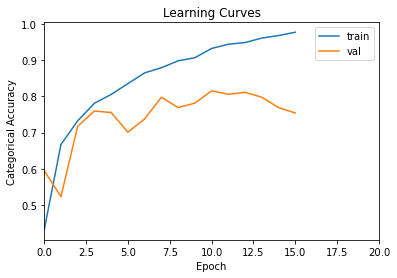

(4602,)
(4602, 2500)
Epoch 1/20
72/72 [==============================] - 21s 287ms/step - loss: 1.1943 - categorical_accuracy: 0.4672 - val_loss: 1.0129 - val_categorical_accuracy: 0.5761
Epoch 2/20
72/72 [==============================] - 21s 290ms/step - loss: 0.8400 - categorical_accuracy: 0.6736 - val_loss: 0.7580 - val_categorical_accuracy: 0.7323
Epoch 3/20
72/72 [==============================] - 22s 299ms/step - loss: 0.6890 - categorical_accuracy: 0.7386 - val_loss: 0.8400 - val_categorical_accuracy: 0.6698
Epoch 4/20
72/72 [==============================] - 23s 319ms/step - loss: 0.5803 - categorical_accuracy: 0.7868 - val_loss: 0.5694 - val_categorical_accuracy: 0.8139
Epoch 5/20
72/72 [==============================] - 23s 323ms/step - loss: 0.4936 - categorical_accuracy: 0.8231 - val_loss: 0.5953 - val_categorical_accuracy: 0.7812
Epoch 6/20
72/72 [==============================] - 21s 299ms/step - loss: 0.4229 - categorical_accuracy: 0.8490 - val_loss: 0.6649 - val_catego

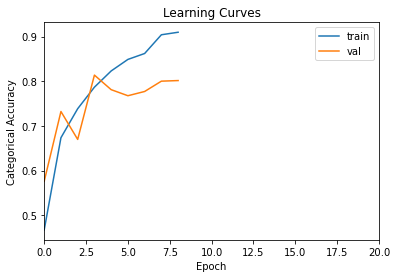

(4602,)
(4602, 2500)
Epoch 1/20
72/72 [==============================] - 22s 304ms/step - loss: 1.2785 - categorical_accuracy: 0.3918 - val_loss: 0.9246 - val_categorical_accuracy: 0.6875
Epoch 2/20
72/72 [==============================] - 25s 348ms/step - loss: 0.9201 - categorical_accuracy: 0.6378 - val_loss: 0.8055 - val_categorical_accuracy: 0.6957
Epoch 3/20
72/72 [==============================] - 25s 341ms/step - loss: 0.7062 - categorical_accuracy: 0.7355 - val_loss: 0.7933 - val_categorical_accuracy: 0.6970
Epoch 4/20
72/72 [==============================] - 24s 329ms/step - loss: 0.5959 - categorical_accuracy: 0.7781 - val_loss: 0.5565 - val_categorical_accuracy: 0.8043
Epoch 5/20
72/72 [==============================] - 23s 322ms/step - loss: 0.4915 - categorical_accuracy: 0.8279 - val_loss: 0.5802 - val_categorical_accuracy: 0.7799
Epoch 6/20
72/72 [==============================] - 22s 307ms/step - loss: 0.4132 - categorical_accuracy: 0.8485 - val_loss: 0.7353 - val_catego

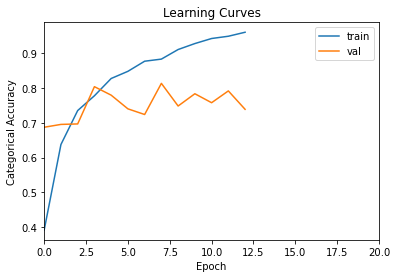

(4602,)
(4602, 2500)
Epoch 1/20
72/72 [==============================] - 21s 283ms/step - loss: 1.2303 - categorical_accuracy: 0.4379 - val_loss: 0.9804 - val_categorical_accuracy: 0.6101
Epoch 2/20
72/72 [==============================] - 22s 306ms/step - loss: 0.8488 - categorical_accuracy: 0.6764 - val_loss: 0.6880 - val_categorical_accuracy: 0.7541
Epoch 3/20
72/72 [==============================] - 21s 296ms/step - loss: 0.6458 - categorical_accuracy: 0.7605 - val_loss: 0.5603 - val_categorical_accuracy: 0.7948
Epoch 4/20
72/72 [==============================] - 21s 287ms/step - loss: 0.5343 - categorical_accuracy: 0.8096 - val_loss: 0.6057 - val_categorical_accuracy: 0.7785
Epoch 5/20
72/72 [==============================] - 20s 275ms/step - loss: 0.4581 - categorical_accuracy: 0.8390 - val_loss: 0.5808 - val_categorical_accuracy: 0.8003
Epoch 6/20
72/72 [==============================] - 23s 313ms/step - loss: 0.3801 - categorical_accuracy: 0.8661 - val_loss: 0.5136 - val_catego

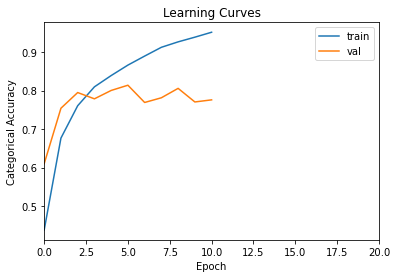

(4602,)
(4602, 2500)
Epoch 1/20
72/72 [==============================] - 23s 317ms/step - loss: 1.2731 - categorical_accuracy: 0.3987 - val_loss: 1.1493 - val_categorical_accuracy: 0.5217
Epoch 2/20
72/72 [==============================] - 21s 288ms/step - loss: 0.9611 - categorical_accuracy: 0.6254 - val_loss: 0.8250 - val_categorical_accuracy: 0.6766
Epoch 3/20
72/72 [==============================] - 21s 298ms/step - loss: 0.7716 - categorical_accuracy: 0.7162 - val_loss: 0.6676 - val_categorical_accuracy: 0.7649
Epoch 4/20
72/72 [==============================] - 21s 299ms/step - loss: 0.6714 - categorical_accuracy: 0.7568 - val_loss: 0.8431 - val_categorical_accuracy: 0.6780
Epoch 5/20
72/72 [==============================] - 20s 273ms/step - loss: 0.5875 - categorical_accuracy: 0.7834 - val_loss: 0.7583 - val_categorical_accuracy: 0.7079
Epoch 6/20
72/72 [==============================] - 19s 268ms/step - loss: 0.5135 - categorical_accuracy: 0.8127 - val_loss: 0.6774 - val_catego

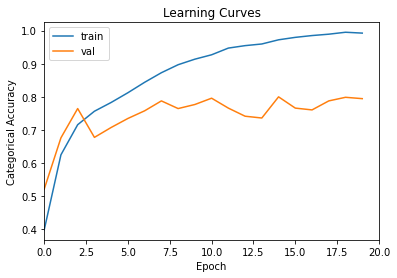

Model accuracy =  0.7671136467243007


In [48]:
def RandomOverUnderSampling(model, epochs, batch_size, patience):
    # Cross-validation:
    x_training_set, y_training_set, x_testing_set, y_testing_set = cross_validation(X_train, Y_train, 0)
    
    # Separate Training Set by class
    Subsets, Labels = split_by_class(x_training_set, y_training_set)
    Class_1 = Subsets[0]
    Label_1 = Labels[0]
    Class_2 = Subsets[1]
    Label_2 = Labels[1]
    Class_3 = Subsets[2]
    Label_3 = Labels[2]
    Class_4 = Subsets[3]
    Label_4 = Labels[3]
    
    # Merge Classes 1 and 3 and Undersample class 1 (maiority class)
    rus_class = np.vstack((Class_1, Class_3))
    rus_label = np.vstack((Label_1, Label_3))
    RUS = RandomUnderSampler()
    x_rus, y_rus = RUS.fit_resample(rus_class, rus_label)
    
    # Merge Classes 2 and 4 and Oversample class 2 (minority class)
    ros_class = np.vstack((Class_2, Class_4))
    ros_label = np.vstack((Label_2, Label_4))
    ROS = RandomOverSampler()
    x_ros, y_ros = ROS.fit_resample(ros_class, ros_label)
    
    # Merge everything and shuffle
    x_train = np.vstack((x_ros, x_rus))
    y_train = np.hstack((y_ros, y_rus))
    
    n = np.size(x_train, 0)
    
    shuffler = np.random.permutation(n)
    x_train = x_train[shuffler]
    y_train = y_train[shuffler]
    
    # Print dimensions
    print(np.shape(y_train))
    print(np.shape(x_train))


    #Reshape data
    x_train = x_train.reshape(-1, 50, 50, 1)
    x_testing_set = x_testing_set.reshape(-1, 50, 50, 1)

    x_train = x_train.astype('float32')
    x_testing_set = x_testing_set.astype('float32')
    x_train = x_train / 255.
    x_testing_set = x_testing_set / 255.

    
    # Convert labels into one-hot-encoding format
    y_val_ground = y_testing_set
    y_train = onehotencoding(y_train)
    y_testing_set = onehotencoding(y_testing_set)
    
    callback = tf.keras.callbacks.EarlyStopping(monitor='val_categorical_accuracy', patience = patience, restore_best_weights = True)

    train = model.fit(x_train, y_train, batch_size=batch_size,epochs=epochs,verbose=1,callbacks=[callback],validation_data=(x_testing_set, y_testing_set))
    test_eval = model.evaluate(x_testing_set, y_testing_set, verbose=0)
    
    predictions = model.predict(x_testing_set)

    # Find the class with maximum probability
    y_test = []

    for i in range(len(predictions)):
        y_test.append(np.argmax(predictions[i]))
    
    balacc = balanced_accuracy_score(y_val_ground, y_test)

    print('\nTest accuracy:', test_eval)
    print('\n Balanced accuracy:', balacc)
    
    # plot learning curves
    plt.title('Learning Curves')
    plt.xlabel('Epoch')
    plt.ylabel('Categorical Accuracy')
    plt.plot(train.history['categorical_accuracy'], label='train')
    plt.plot(train.history['val_categorical_accuracy'], label='val')
    plt.xlim([0, 20])
    plt.legend()
    plt.show()
    
    return balacc


accuracy = []
for i in range(5):    
    model, batch_size, epochs, num_classes, patience = compile_best_model()
    acc = RandomOverUnderSampling(model, epochs, batch_size, patience)
    accuracy.append(acc)

accuracy = np.median(accuracy)
print("Model accuracy = ", accuracy)

(3818, 1)
(3818, 2500)
Epoch 1/20
60/60 [==============================] - 17s 273ms/step - loss: 1.2301 - categorical_accuracy: 0.3979 - val_loss: 1.1222 - val_categorical_accuracy: 0.4293
Epoch 2/20
60/60 [==============================] - 16s 273ms/step - loss: 0.9018 - categorical_accuracy: 0.6572 - val_loss: 0.6775 - val_categorical_accuracy: 0.7310
Epoch 3/20
60/60 [==============================] - 16s 272ms/step - loss: 0.7049 - categorical_accuracy: 0.7394 - val_loss: 0.6786 - val_categorical_accuracy: 0.7486
Epoch 4/20
60/60 [==============================] - 16s 272ms/step - loss: 0.6202 - categorical_accuracy: 0.7737 - val_loss: 0.5201 - val_categorical_accuracy: 0.8207
Epoch 5/20
60/60 [==============================] - 16s 272ms/step - loss: 0.5444 - categorical_accuracy: 0.8075 - val_loss: 0.5129 - val_categorical_accuracy: 0.8261
Epoch 6/20
60/60 [==============================] - 17s 278ms/step - loss: 0.4718 - categorical_accuracy: 0.8300 - val_loss: 0.4687 - val_cate

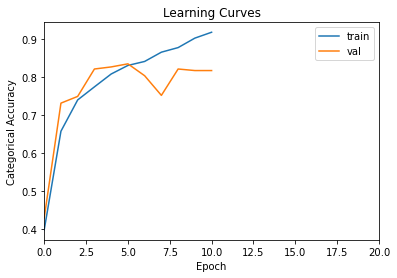

(3818, 1)
(3818, 2500)
Epoch 1/20
60/60 [==============================] - 17s 276ms/step - loss: 1.2369 - categorical_accuracy: 0.4018 - val_loss: 0.9401 - val_categorical_accuracy: 0.6739
Epoch 2/20
60/60 [==============================] - 17s 289ms/step - loss: 0.9893 - categorical_accuracy: 0.5961 - val_loss: 0.7373 - val_categorical_accuracy: 0.7188
Epoch 3/20
60/60 [==============================] - 18s 294ms/step - loss: 0.8210 - categorical_accuracy: 0.6860 - val_loss: 0.7881 - val_categorical_accuracy: 0.7106
Epoch 4/20
60/60 [==============================] - 20s 337ms/step - loss: 0.6942 - categorical_accuracy: 0.7423 - val_loss: 0.7699 - val_categorical_accuracy: 0.6997
Epoch 5/20
60/60 [==============================] - 17s 284ms/step - loss: 0.6155 - categorical_accuracy: 0.7737 - val_loss: 0.8943 - val_categorical_accuracy: 0.6644
Epoch 6/20
60/60 [==============================] - 17s 277ms/step - loss: 0.5458 - categorical_accuracy: 0.8078 - val_loss: 0.5318 - val_cate

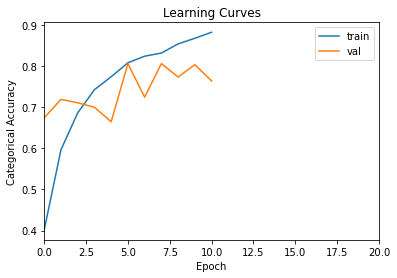

(3818, 1)
(3818, 2500)
Epoch 1/20
60/60 [==============================] - 17s 276ms/step - loss: 1.1155 - categorical_accuracy: 0.4882 - val_loss: 0.9325 - val_categorical_accuracy: 0.6372
Epoch 2/20
60/60 [==============================] - 17s 288ms/step - loss: 0.7712 - categorical_accuracy: 0.7014 - val_loss: 0.5865 - val_categorical_accuracy: 0.7962
Epoch 3/20
60/60 [==============================] - 17s 282ms/step - loss: 0.6459 - categorical_accuracy: 0.7562 - val_loss: 0.5378 - val_categorical_accuracy: 0.8247
Epoch 4/20
60/60 [==============================] - 17s 287ms/step - loss: 0.5686 - categorical_accuracy: 0.7839 - val_loss: 0.5822 - val_categorical_accuracy: 0.7948
Epoch 5/20
60/60 [==============================] - 18s 298ms/step - loss: 0.5282 - categorical_accuracy: 0.7996 - val_loss: 0.5121 - val_categorical_accuracy: 0.8139
Epoch 6/20
60/60 [==============================] - 17s 283ms/step - loss: 0.4774 - categorical_accuracy: 0.8237 - val_loss: 0.4756 - val_cate

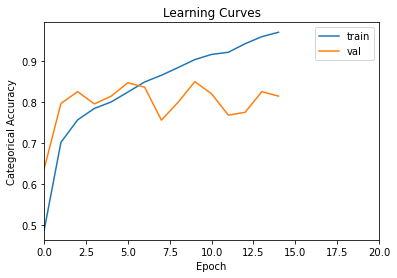

(3818, 1)
(3818, 2500)
Epoch 1/20
60/60 [==============================] - 20s 335ms/step - loss: 1.1662 - categorical_accuracy: 0.4432 - val_loss: 0.9911 - val_categorical_accuracy: 0.5788
Epoch 2/20
60/60 [==============================] - 17s 288ms/step - loss: 0.8210 - categorical_accuracy: 0.6896 - val_loss: 0.7209 - val_categorical_accuracy: 0.7242
Epoch 3/20
60/60 [==============================] - 19s 323ms/step - loss: 0.6876 - categorical_accuracy: 0.7420 - val_loss: 0.7306 - val_categorical_accuracy: 0.7283
Epoch 4/20
60/60 [==============================] - 19s 309ms/step - loss: 0.6129 - categorical_accuracy: 0.7708 - val_loss: 0.7808 - val_categorical_accuracy: 0.7106
Epoch 5/20
60/60 [==============================] - 18s 292ms/step - loss: 0.5377 - categorical_accuracy: 0.8043 - val_loss: 0.5955 - val_categorical_accuracy: 0.7867
Epoch 6/20
60/60 [==============================] - 18s 293ms/step - loss: 0.4976 - categorical_accuracy: 0.8188 - val_loss: 0.5258 - val_cate

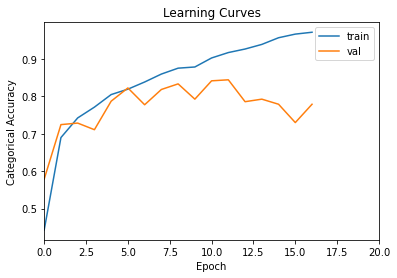

(3818, 1)
(3818, 2500)
Epoch 1/20
60/60 [==============================] - 17s 279ms/step - loss: 1.1908 - categorical_accuracy: 0.4424 - val_loss: 1.0839 - val_categorical_accuracy: 0.5258
Epoch 2/20
60/60 [==============================] - 17s 276ms/step - loss: 0.8671 - categorical_accuracy: 0.6613 - val_loss: 0.6394 - val_categorical_accuracy: 0.7568
Epoch 3/20
60/60 [==============================] - 17s 277ms/step - loss: 0.6898 - categorical_accuracy: 0.7391 - val_loss: 0.5507 - val_categorical_accuracy: 0.7948
Epoch 4/20
60/60 [==============================] - 16s 275ms/step - loss: 0.5973 - categorical_accuracy: 0.7797 - val_loss: 0.6223 - val_categorical_accuracy: 0.7772
Epoch 5/20
60/60 [==============================] - 17s 280ms/step - loss: 0.5397 - categorical_accuracy: 0.8070 - val_loss: 0.5844 - val_categorical_accuracy: 0.7894
Epoch 6/20
60/60 [==============================] - 17s 276ms/step - loss: 0.4928 - categorical_accuracy: 0.8237 - val_loss: 0.5267 - val_cate

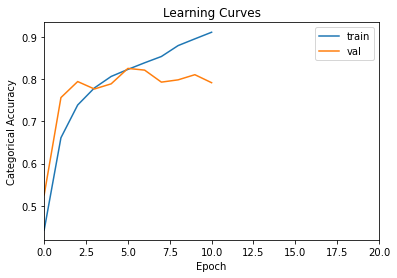

Model accuracy =  0.7625834803702927


In [49]:
# Only undersample class 1

def RandomOverUnderSampling(model, epochs, batch_size, patience):
    # Cross-validation:
    x_training_set, y_training_set, x_testing_set, y_testing_set = cross_validation(X_train, Y_train, 0)
    
    # Separate Training Set by class
    Subsets, Labels = split_by_class(x_training_set, y_training_set)
    Class_1 = Subsets[0]
    Label_1 = Labels[0]
    Class_2 = Subsets[1]
    Label_2 = Labels[1]
    Class_3 = Subsets[2]
    Label_3 = Labels[2]
    Class_4 = Subsets[3]
    Label_4 = Labels[3]
    
    # Merge Classes 1 and 3 and Undersample class 1 (maiority class)
    rus_class = np.vstack((Class_1, Class_3))
    rus_label = np.vstack((Label_1, Label_3))
    RUS = RandomUnderSampler()
    x_rus, y_rus = RUS.fit_resample(rus_class, rus_label)

    
    # Merge everything and shuffle
    x_train = np.vstack((Class_2, Class_4, x_rus))
    y_train = np.vstack((Label_2, Label_4, np.transpose([y_rus])))
    
    n = np.size(x_train, 0)
    
    shuffler = np.random.permutation(n)
    x_train = x_train[shuffler]
    y_train = y_train[shuffler]
    
    # Print dimensions
    print(np.shape(y_train))
    print(np.shape(x_train))


    #Reshape data
    x_train = x_train.reshape(-1, 50, 50, 1)
    x_testing_set = x_testing_set.reshape(-1, 50, 50, 1)

    x_train = x_train.astype('float32')
    x_testing_set = x_testing_set.astype('float32')
    x_train = x_train / 255.
    x_testing_set = x_testing_set / 255.

    
    # Convert labels into one-hot-encoding format
    y_val_ground = y_testing_set
    y_train = onehotencoding(y_train)
    y_testing_set = onehotencoding(y_testing_set)
    
    callback = tf.keras.callbacks.EarlyStopping(monitor='val_categorical_accuracy', patience = patience, restore_best_weights = True)

    train = model.fit(x_train, y_train, batch_size=batch_size,epochs=epochs,verbose=1,callbacks=[callback],validation_data=(x_testing_set, y_testing_set))
    test_eval = model.evaluate(x_testing_set, y_testing_set, verbose=0)
    
    predictions = model.predict(x_testing_set)

    # Find the class with maximum probability
    y_test = []

    for i in range(len(predictions)):
        y_test.append(np.argmax(predictions[i]))
    
    balacc = balanced_accuracy_score(y_val_ground, y_test)

    print('\nTest accuracy:', test_eval)
    print('\n Balanced accuracy:', balacc)
    
    # plot learning curves
    plt.title('Learning Curves')
    plt.xlabel('Epoch')
    plt.ylabel('Categorical Accuracy')
    plt.plot(train.history['categorical_accuracy'], label='train')
    plt.plot(train.history['val_categorical_accuracy'], label='val')
    plt.xlim([0, 20])
    plt.legend()
    plt.show()
    
    return balacc


accuracy = []
for i in range(5):    
    model, batch_size, epochs, num_classes, patience = compile_best_model()
    acc = RandomOverUnderSampling(model, epochs, batch_size, patience)
    accuracy.append(acc)

accuracy = np.median(accuracy)
print("Model accuracy = ", accuracy)

(7414, 1)
(7414, 2500)
Epoch 1/20
116/116 [==============================] - 34s 288ms/step - loss: 1.0117 - categorical_accuracy: 0.6006 - val_loss: 0.7837 - val_categorical_accuracy: 0.6902
Epoch 2/20
116/116 [==============================] - 32s 277ms/step - loss: 0.6914 - categorical_accuracy: 0.7389 - val_loss: 0.5568 - val_categorical_accuracy: 0.7962
Epoch 3/20
116/116 [==============================] - 32s 272ms/step - loss: 0.5702 - categorical_accuracy: 0.7920 - val_loss: 0.5374 - val_categorical_accuracy: 0.8003
Epoch 4/20
116/116 [==============================] - 32s 275ms/step - loss: 0.4658 - categorical_accuracy: 0.8352 - val_loss: 0.4889 - val_categorical_accuracy: 0.8315
Epoch 5/20
116/116 [==============================] - 32s 275ms/step - loss: 0.4064 - categorical_accuracy: 0.8537 - val_loss: 0.4975 - val_categorical_accuracy: 0.8084
Epoch 6/20
116/116 [==============================] - 33s 280ms/step - loss: 0.3493 - categorical_accuracy: 0.8751 - val_loss: 0.471

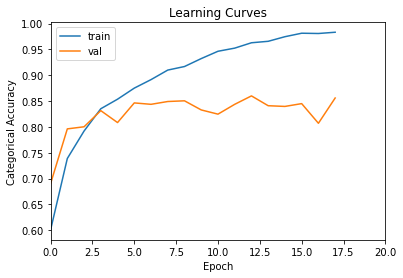

(7414, 1)
(7414, 2500)
Epoch 1/20
116/116 [==============================] - 33s 279ms/step - loss: 1.0179 - categorical_accuracy: 0.5935 - val_loss: 0.6799 - val_categorical_accuracy: 0.7405
Epoch 2/20
116/116 [==============================] - 32s 280ms/step - loss: 0.6652 - categorical_accuracy: 0.7548 - val_loss: 0.6634 - val_categorical_accuracy: 0.7459
Epoch 3/20
116/116 [==============================] - 33s 282ms/step - loss: 0.5476 - categorical_accuracy: 0.7998 - val_loss: 0.6191 - val_categorical_accuracy: 0.7853
Epoch 4/20
116/116 [==============================] - 33s 284ms/step - loss: 0.4513 - categorical_accuracy: 0.8356 - val_loss: 0.5661 - val_categorical_accuracy: 0.7989
Epoch 5/20
116/116 [==============================] - 33s 285ms/step - loss: 0.3944 - categorical_accuracy: 0.8591 - val_loss: 0.4660 - val_categorical_accuracy: 0.8424
Epoch 6/20
116/116 [==============================] - 33s 288ms/step - loss: 0.3228 - categorical_accuracy: 0.8837 - val_loss: 0.469

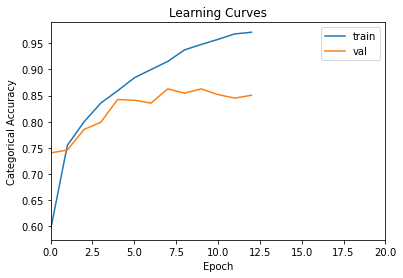

(7414, 1)
(7414, 2500)
Epoch 1/20
116/116 [==============================] - 36s 305ms/step - loss: 0.9979 - categorical_accuracy: 0.6060 - val_loss: 0.7515 - val_categorical_accuracy: 0.6929
Epoch 2/20
116/116 [==============================] - 35s 306ms/step - loss: 0.6796 - categorical_accuracy: 0.7467 - val_loss: 0.5593 - val_categorical_accuracy: 0.7908
Epoch 3/20
116/116 [==============================] - 35s 302ms/step - loss: 0.5506 - categorical_accuracy: 0.8046 - val_loss: 0.4771 - val_categorical_accuracy: 0.8410
Epoch 4/20
116/116 [==============================] - 33s 289ms/step - loss: 0.4618 - categorical_accuracy: 0.8350 - val_loss: 0.4941 - val_categorical_accuracy: 0.8125
Epoch 5/20
116/116 [==============================] - 33s 287ms/step - loss: 0.4057 - categorical_accuracy: 0.8550 - val_loss: 0.4672 - val_categorical_accuracy: 0.8438
Epoch 6/20
116/116 [==============================] - 33s 285ms/step - loss: 0.3491 - categorical_accuracy: 0.8763 - val_loss: 0.469

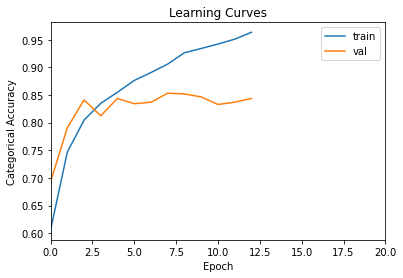

(7414, 1)
(7414, 2500)
Epoch 1/20
116/116 [==============================] - 32s 271ms/step - loss: 1.0370 - categorical_accuracy: 0.5905 - val_loss: 0.7683 - val_categorical_accuracy: 0.7065
Epoch 2/20
116/116 [==============================] - 33s 281ms/step - loss: 0.6992 - categorical_accuracy: 0.7370 - val_loss: 0.5596 - val_categorical_accuracy: 0.7935
Epoch 3/20
116/116 [==============================] - 35s 304ms/step - loss: 0.5593 - categorical_accuracy: 0.7943 - val_loss: 0.5916 - val_categorical_accuracy: 0.7921
Epoch 4/20
116/116 [==============================] - 34s 295ms/step - loss: 0.4761 - categorical_accuracy: 0.8309 - val_loss: 0.4886 - val_categorical_accuracy: 0.8342
Epoch 5/20
116/116 [==============================] - 34s 292ms/step - loss: 0.4108 - categorical_accuracy: 0.8534 - val_loss: 0.4661 - val_categorical_accuracy: 0.8329
Epoch 6/20
116/116 [==============================] - 35s 299ms/step - loss: 0.3387 - categorical_accuracy: 0.8789 - val_loss: 0.490

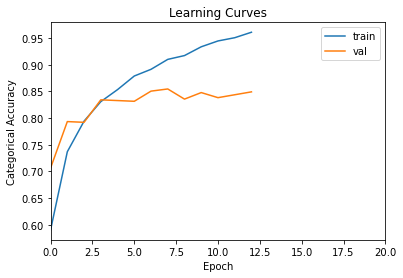

(7414, 1)
(7414, 2500)
Epoch 1/20
116/116 [==============================] - 35s 297ms/step - loss: 0.9752 - categorical_accuracy: 0.6137 - val_loss: 0.8036 - val_categorical_accuracy: 0.6712
Epoch 2/20
116/116 [==============================] - 35s 306ms/step - loss: 0.6575 - categorical_accuracy: 0.7584 - val_loss: 0.5503 - val_categorical_accuracy: 0.7989
Epoch 3/20
116/116 [==============================] - 35s 301ms/step - loss: 0.5251 - categorical_accuracy: 0.8113 - val_loss: 0.5026 - val_categorical_accuracy: 0.8220
Epoch 4/20
116/116 [==============================] - 34s 295ms/step - loss: 0.4349 - categorical_accuracy: 0.8461 - val_loss: 0.4562 - val_categorical_accuracy: 0.8370
Epoch 5/20
116/116 [==============================] - 33s 283ms/step - loss: 0.3826 - categorical_accuracy: 0.8607 - val_loss: 0.4855 - val_categorical_accuracy: 0.8329
Epoch 6/20
116/116 [==============================] - 32s 277ms/step - loss: 0.3210 - categorical_accuracy: 0.8855 - val_loss: 0.438

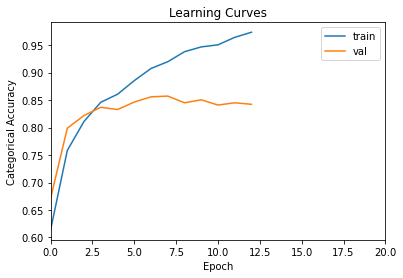

Model accuracy =  0.7648049204907209


In [50]:
# Only oversample class 2

def RandomOverUnderSampling(model, epochs, batch_size, patience):
    # Cross-validation:
    x_training_set, y_training_set, x_testing_set, y_testing_set = cross_validation(X_train, Y_train, 0)
    
    # Separate Training Set by class
    Subsets, Labels = split_by_class(x_training_set, y_training_set)
    Class_1 = Subsets[0]
    Label_1 = Labels[0]
    Class_2 = Subsets[1]
    Label_2 = Labels[1]
    Class_3 = Subsets[2]
    Label_3 = Labels[2]
    Class_4 = Subsets[3]
    Label_4 = Labels[3]
    
    # Merge Classes 2 and 4 and Oversample class 2 (minority class)
    ros_class = np.vstack((Class_2, Class_4))
    ros_label = np.vstack((Label_2, Label_4))
    ROS = RandomOverSampler()
    x_ros, y_ros = ROS.fit_resample(ros_class, ros_label)
    
    # Merge everything and shuffle
    x_train = np.vstack((x_ros, Class_1, Class_3))
    y_train = np.vstack((np.transpose([y_ros]), Label_1, Label_3))
    
    n = np.size(x_train, 0)
    
    shuffler = np.random.permutation(n)
    x_train = x_train[shuffler]
    y_train = y_train[shuffler]
    
    # Print dimensions
    print(np.shape(y_train))
    print(np.shape(x_train))


    #Reshape data
    x_train = x_train.reshape(-1, 50, 50, 1)
    x_testing_set = x_testing_set.reshape(-1, 50, 50, 1)

    x_train = x_train.astype('float32')
    x_testing_set = x_testing_set.astype('float32')
    x_train = x_train / 255.
    x_testing_set = x_testing_set / 255.

    
    # Convert labels into one-hot-encoding format
    y_val_ground = y_testing_set
    y_train = onehotencoding(y_train)
    y_testing_set = onehotencoding(y_testing_set)
    
    callback = tf.keras.callbacks.EarlyStopping(monitor='val_categorical_accuracy', patience = patience, restore_best_weights = True)

    train = model.fit(x_train, y_train, batch_size=batch_size,epochs=epochs,verbose=1,callbacks=[callback],validation_data=(x_testing_set, y_testing_set))
    test_eval = model.evaluate(x_testing_set, y_testing_set, verbose=0)
    
    predictions = model.predict(x_testing_set)

    # Find the class with maximum probability
    y_test = []

    for i in range(len(predictions)):
        y_test.append(np.argmax(predictions[i]))
    
    balacc = balanced_accuracy_score(y_val_ground, y_test)

    print('\nTest accuracy:', test_eval)
    print('\n Balanced accuracy:', balacc)
    
    # plot learning curves
    plt.title('Learning Curves')
    plt.xlabel('Epoch')
    plt.ylabel('Categorical Accuracy')
    plt.plot(train.history['categorical_accuracy'], label='train')
    plt.plot(train.history['val_categorical_accuracy'], label='val')
    plt.xlim([0, 20])
    plt.legend()
    plt.show()
    
    return balacc


accuracy = []
for i in range(5):    
    model, batch_size, epochs, num_classes, patience = compile_best_model()
    acc = RandomOverUnderSampling(model, epochs, batch_size, patience)
    accuracy.append(acc)

accuracy = np.median(accuracy)
print("Model accuracy = ", accuracy)

### SMOTE

original dataset shape: (6630,)
Resample dataset shape (16088,)
Epoch 1/20
252/252 [==============================] - 70s 277ms/step - loss: 0.8364 - categorical_accuracy: 0.6642 - val_loss: 0.6049 - val_categorical_accuracy: 0.7785
Epoch 2/20
252/252 [==============================] - 77s 305ms/step - loss: 0.4409 - categorical_accuracy: 0.8461 - val_loss: 0.6721 - val_categorical_accuracy: 0.7690
Epoch 3/20
252/252 [==============================] - 72s 287ms/step - loss: 0.3123 - categorical_accuracy: 0.8912 - val_loss: 0.5835 - val_categorical_accuracy: 0.7717
Epoch 4/20
252/252 [==============================] - 69s 275ms/step - loss: 0.2496 - categorical_accuracy: 0.9127 - val_loss: 0.6761 - val_categorical_accuracy: 0.7486
Epoch 5/20
252/252 [==============================] - 73s 291ms/step - loss: 0.1826 - categorical_accuracy: 0.9378 - val_loss: 0.6032 - val_categorical_accuracy: 0.8166
Epoch 6/20
252/252 [==============================] - 71s 281ms/step - loss: 0.1347 - categ

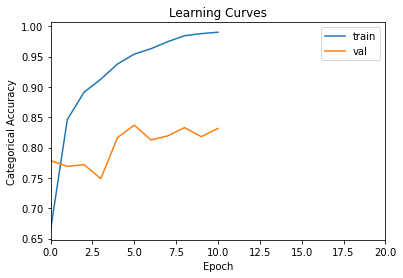

original dataset shape: (6630,)
Resample dataset shape (16088,)
Epoch 1/20
252/252 [==============================] - 73s 286ms/step - loss: 0.8892 - categorical_accuracy: 0.6268 - val_loss: 0.6771 - val_categorical_accuracy: 0.7595
Epoch 2/20
252/252 [==============================] - 76s 301ms/step - loss: 0.4811 - categorical_accuracy: 0.8299 - val_loss: 0.6439 - val_categorical_accuracy: 0.7731
Epoch 3/20
252/252 [==============================] - 76s 300ms/step - loss: 0.3503 - categorical_accuracy: 0.8787 - val_loss: 0.6251 - val_categorical_accuracy: 0.7717
Epoch 4/20
252/252 [==============================] - 74s 294ms/step - loss: 0.2564 - categorical_accuracy: 0.9120 - val_loss: 0.6204 - val_categorical_accuracy: 0.8098
Epoch 5/20
252/252 [==============================] - 75s 296ms/step - loss: 0.1924 - categorical_accuracy: 0.9355 - val_loss: 0.5813 - val_categorical_accuracy: 0.8383
Epoch 6/20
252/252 [==============================] - 72s 287ms/step - loss: 0.1586 - categ

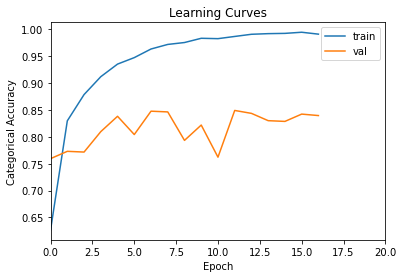

original dataset shape: (6630,)
Resample dataset shape (16088,)
Epoch 1/20
252/252 [==============================] - 67s 265ms/step - loss: 0.9562 - categorical_accuracy: 0.5988 - val_loss: 0.7911 - val_categorical_accuracy: 0.7079
Epoch 2/20
252/252 [==============================] - 68s 269ms/step - loss: 0.5214 - categorical_accuracy: 0.8130 - val_loss: 0.7332 - val_categorical_accuracy: 0.7351
Epoch 3/20
252/252 [==============================] - 68s 270ms/step - loss: 0.3836 - categorical_accuracy: 0.8672 - val_loss: 0.5790 - val_categorical_accuracy: 0.7976
Epoch 4/20
252/252 [==============================] - 71s 282ms/step - loss: 0.2935 - categorical_accuracy: 0.9000 - val_loss: 0.5765 - val_categorical_accuracy: 0.8139
Epoch 5/20
252/252 [==============================] - 72s 286ms/step - loss: 0.2376 - categorical_accuracy: 0.9185 - val_loss: 0.5526 - val_categorical_accuracy: 0.8193
Epoch 6/20
252/252 [==============================] - 71s 283ms/step - loss: 0.1935 - categ

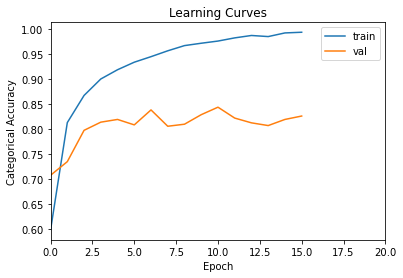

original dataset shape: (6630,)
Resample dataset shape (16088,)
Epoch 1/20
252/252 [==============================] - 81s 319ms/step - loss: 0.7501 - categorical_accuracy: 0.7031 - val_loss: 0.6390 - val_categorical_accuracy: 0.7717
Epoch 2/20
252/252 [==============================] - 75s 299ms/step - loss: 0.3823 - categorical_accuracy: 0.8669 - val_loss: 0.5355 - val_categorical_accuracy: 0.8261
Epoch 3/20
252/252 [==============================] - 76s 303ms/step - loss: 0.2647 - categorical_accuracy: 0.9097 - val_loss: 0.5320 - val_categorical_accuracy: 0.8315
Epoch 4/20
252/252 [==============================] - 76s 301ms/step - loss: 0.1902 - categorical_accuracy: 0.9365 - val_loss: 0.5103 - val_categorical_accuracy: 0.8302
Epoch 5/20
252/252 [==============================] - 74s 293ms/step - loss: 0.1388 - categorical_accuracy: 0.9547 - val_loss: 0.6431 - val_categorical_accuracy: 0.8057
Epoch 6/20
252/252 [==============================] - 68s 268ms/step - loss: 0.1075 - categ

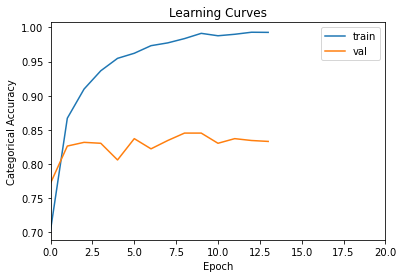

original dataset shape: (6630,)
Resample dataset shape (16088,)
Epoch 1/20
252/252 [==============================] - 71s 281ms/step - loss: 0.8983 - categorical_accuracy: 0.6358 - val_loss: 0.7703 - val_categorical_accuracy: 0.7160
Epoch 2/20
252/252 [==============================] - 75s 300ms/step - loss: 0.4903 - categorical_accuracy: 0.8297 - val_loss: 0.5738 - val_categorical_accuracy: 0.8043
Epoch 3/20
252/252 [==============================] - 76s 300ms/step - loss: 0.3571 - categorical_accuracy: 0.8767 - val_loss: 0.5564 - val_categorical_accuracy: 0.8057
Epoch 4/20
252/252 [==============================] - 72s 287ms/step - loss: 0.2635 - categorical_accuracy: 0.9107 - val_loss: 0.5830 - val_categorical_accuracy: 0.8043
Epoch 5/20
252/252 [==============================] - 76s 300ms/step - loss: 0.2035 - categorical_accuracy: 0.9293 - val_loss: 0.5221 - val_categorical_accuracy: 0.8383
Epoch 6/20
252/252 [==============================] - 72s 286ms/step - loss: 0.1433 - categ

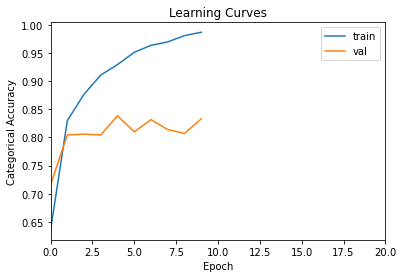

Model accuracy =  0.7329937613147399


In [51]:
def SMOTEOverSampling(model, epochs, batch_size, patience):
    # Cross-validation:
    x_training_set, y_training_set, x_testing_set, y_testing_set = cross_validation(X_train, Y_train, 0)

    smote = SMOTE()
    x_smote, y_smote = smote.fit_resample(x_training_set, y_training_set)

    print('original dataset shape:', np.shape(y_training_set))
    print('Resample dataset shape', np.shape(y_smote))


    #Reshape data
    x_train = x_smote.reshape(-1, 50, 50, 1)
    x_testing_set = x_testing_set.reshape(-1, 50, 50, 1)

    x_train = x_train.astype('float32')
    x_testing_set = x_testing_set.astype('float32')
    x_train = x_train / 255.
    x_testing_set = x_testing_set / 255.

    
    # Convert labels into one-hot-encoding format
    y_val_ground = y_testing_set
    y_train = onehotencoding(y_smote)
    y_testing_set = onehotencoding(y_testing_set)
    
    callback = tf.keras.callbacks.EarlyStopping(monitor='val_categorical_accuracy', patience = patience, restore_best_weights = True)

    train = model.fit(x_train, y_train, batch_size=batch_size,epochs=epochs,verbose=1,callbacks=[callback],validation_data=(x_testing_set, y_testing_set))
    test_eval = model.evaluate(x_testing_set, y_testing_set, verbose=0)
    
    predictions = model.predict(x_testing_set)

    # Find the class with maximum probability
    y_test = []

    for i in range(len(predictions)):
        y_test.append(np.argmax(predictions[i]))
    
    balacc = balanced_accuracy_score(y_val_ground, y_test)

    print('\nTest accuracy:', test_eval)
    print('\n Balanced accuracy:', balacc)
    
    # plot learning curves
    plt.title('Learning Curves')
    plt.xlabel('Epoch')
    plt.ylabel('Categorical Accuracy')
    plt.plot(train.history['categorical_accuracy'], label='train')
    plt.plot(train.history['val_categorical_accuracy'], label='val')
    plt.xlim([0, 20])
    plt.legend()
    plt.show()
    
    return balacc



accuracy = []
for i in range(5):    
    model, batch_size, epochs, num_classes, patience = compile_best_model()
    acc = SMOTEOverSampling(model, epochs, batch_size, patience)
    accuracy.append(acc)

accuracy = np.median(accuracy)
print("Model accuracy = ", accuracy)

### Data Augmentation

#### Flip images horizontally + Undersampling

In [52]:
def augment_using_ops(images, labels):
    # randomly flip the images horizontally, randomly flip the images
    # vertically, and rotate the images by 90 degrees in the counter
    # clockwise direction
    images = tf.image.flip_left_right(images)
    # return the image and the label
    
    print(np.shape(images))
    print(np.shape(labels))
    return (images, labels)

matrix shape: (6630, 50, 50, 1)
vector shape: (6630, 2500)
flipped vector shape: (6630, 2500)
vector shape after concatenation: (13260, 2500)
final matrix shape: (2456, 50, 50, 1)
Epoch 1/20
39/39 [==============================] - 15s 367ms/step - loss: 1.3497 - categorical_accuracy: 0.3522 - val_loss: 1.2067 - val_categorical_accuracy: 0.3424
Epoch 2/20
39/39 [==============================] - 12s 318ms/step - loss: 1.1143 - categorical_accuracy: 0.5423 - val_loss: 1.4109 - val_categorical_accuracy: 0.3288
Epoch 3/20
39/39 [==============================] - 13s 325ms/step - loss: 0.9543 - categorical_accuracy: 0.6193 - val_loss: 0.7712 - val_categorical_accuracy: 0.7092
Epoch 4/20
39/39 [==============================] - 13s 324ms/step - loss: 0.8353 - categorical_accuracy: 0.6787 - val_loss: 0.8250 - val_categorical_accuracy: 0.6889
Epoch 5/20
39/39 [==============================] - 14s 366ms/step - loss: 0.7243 - categorical_accuracy: 0.7329 - val_loss: 0.7380 - val_categorical_ac

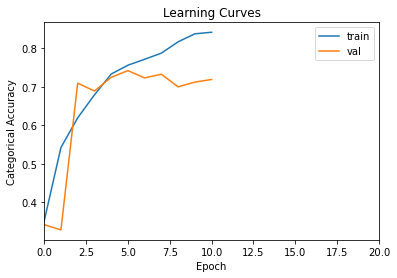

matrix shape: (6630, 50, 50, 1)
vector shape: (6630, 2500)
flipped vector shape: (6630, 2500)
vector shape after concatenation: (13260, 2500)
final matrix shape: (2456, 50, 50, 1)
Epoch 1/20
39/39 [==============================] - 13s 311ms/step - loss: 1.3033 - categorical_accuracy: 0.3868 - val_loss: 1.4396 - val_categorical_accuracy: 0.2459
Epoch 2/20
39/39 [==============================] - 12s 313ms/step - loss: 1.0099 - categorical_accuracy: 0.5924 - val_loss: 0.9967 - val_categorical_accuracy: 0.6046
Epoch 3/20
39/39 [==============================] - 12s 306ms/step - loss: 0.8173 - categorical_accuracy: 0.6873 - val_loss: 0.8681 - val_categorical_accuracy: 0.6739
Epoch 4/20
39/39 [==============================] - 11s 282ms/step - loss: 0.7298 - categorical_accuracy: 0.7227 - val_loss: 0.9887 - val_categorical_accuracy: 0.6182
Epoch 5/20
39/39 [==============================] - 11s 294ms/step - loss: 0.6557 - categorical_accuracy: 0.7447 - val_loss: 0.6986 - val_categorical_ac

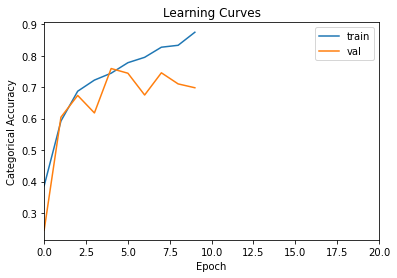

matrix shape: (6630, 50, 50, 1)
vector shape: (6630, 2500)
flipped vector shape: (6630, 2500)
vector shape after concatenation: (13260, 2500)
final matrix shape: (2456, 50, 50, 1)
Epoch 1/20
39/39 [==============================] - 12s 284ms/step - loss: 1.3410 - categorical_accuracy: 0.3424 - val_loss: 1.1510 - val_categorical_accuracy: 0.5639
Epoch 2/20
39/39 [==============================] - 11s 279ms/step - loss: 1.0779 - categorical_accuracy: 0.5688 - val_loss: 0.9161 - val_categorical_accuracy: 0.6372
Epoch 3/20
39/39 [==============================] - 11s 291ms/step - loss: 0.8652 - categorical_accuracy: 0.6710 - val_loss: 0.8345 - val_categorical_accuracy: 0.6712
Epoch 4/20
39/39 [==============================] - 12s 311ms/step - loss: 0.7589 - categorical_accuracy: 0.7129 - val_loss: 0.7781 - val_categorical_accuracy: 0.7052
Epoch 5/20
39/39 [==============================] - 13s 328ms/step - loss: 0.6492 - categorical_accuracy: 0.7606 - val_loss: 0.6595 - val_categorical_ac

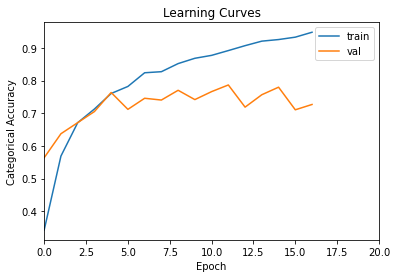

matrix shape: (6630, 50, 50, 1)
vector shape: (6630, 2500)
flipped vector shape: (6630, 2500)
vector shape after concatenation: (13260, 2500)
final matrix shape: (2456, 50, 50, 1)
Epoch 1/20
39/39 [==============================] - 12s 283ms/step - loss: 1.3794 - categorical_accuracy: 0.2879 - val_loss: 1.1825 - val_categorical_accuracy: 0.5924
Epoch 2/20
39/39 [==============================] - 13s 322ms/step - loss: 1.1810 - categorical_accuracy: 0.4776 - val_loss: 1.0557 - val_categorical_accuracy: 0.5679
Epoch 3/20
39/39 [==============================] - 11s 289ms/step - loss: 0.9850 - categorical_accuracy: 0.6197 - val_loss: 0.8589 - val_categorical_accuracy: 0.6630
Epoch 4/20
39/39 [==============================] - 11s 288ms/step - loss: 0.8633 - categorical_accuracy: 0.6600 - val_loss: 0.8552 - val_categorical_accuracy: 0.6590
Epoch 5/20
39/39 [==============================] - 11s 294ms/step - loss: 0.7924 - categorical_accuracy: 0.6922 - val_loss: 0.7455 - val_categorical_ac

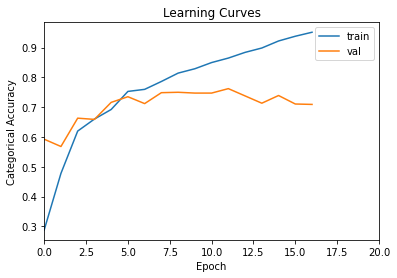

matrix shape: (6630, 50, 50, 1)
vector shape: (6630, 2500)
flipped vector shape: (6630, 2500)
vector shape after concatenation: (13260, 2500)
final matrix shape: (2456, 50, 50, 1)
Epoch 1/20
39/39 [==============================] - 13s 312ms/step - loss: 1.3247 - categorical_accuracy: 0.4129 - val_loss: 1.0159 - val_categorical_accuracy: 0.6454
Epoch 2/20
39/39 [==============================] - 11s 283ms/step - loss: 1.0028 - categorical_accuracy: 0.6075 - val_loss: 1.0831 - val_categorical_accuracy: 0.5177
Epoch 3/20
39/39 [==============================] - 11s 283ms/step - loss: 0.8358 - categorical_accuracy: 0.6885 - val_loss: 0.7287 - val_categorical_accuracy: 0.7337
Epoch 4/20
39/39 [==============================] - 11s 285ms/step - loss: 0.7281 - categorical_accuracy: 0.7272 - val_loss: 0.7505 - val_categorical_accuracy: 0.7174
Epoch 5/20
39/39 [==============================] - 11s 289ms/step - loss: 0.6693 - categorical_accuracy: 0.7496 - val_loss: 0.7345 - val_categorical_ac

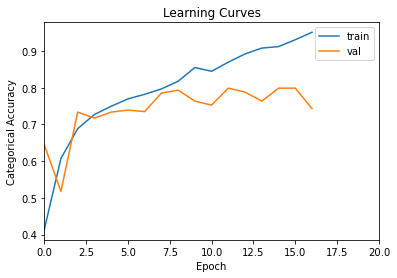

Model accuracy =  0.7458016575274177


In [53]:
def DataAugmentation(model, epochs, batch_size, patience):
    # Cross-validation:
    x_training_set, y_training_set, x_testing_set, y_testing_set = cross_validation(X_train, Y_train, 0)

    n = np.shape(x_training_set)[0]
    
    #Reshape data
    x_train = x_training_set.reshape(-1, 50, 50, 1)  #reshaping the data to flip
    x_testing_set = x_testing_set.reshape(-1, 50, 50, 1)

    x_train = x_train.astype('float32')
    x_testing_set = x_testing_set.astype('float32')
    x_train = x_train / 255.
    x_testing_set = x_testing_set / 255.
    
    print('matrix shape:', np.shape(x_train))
    
    # Flip image    
    flipped_x_train = tf.image.flip_left_right(x_train)
    flipped_x_train = flipped_x_train.numpy()
    
    #Reshape data
    x_train = x_train.reshape(-1, 2500)   #reshaping the data to concatenate and shuffle
    flipped_x_train = flipped_x_train.reshape(-1, 2500)
    
    print('vector shape:', np.shape(x_train))
    print('flipped vector shape:', np.shape(flipped_x_train))
    
    x_train = np.concatenate([x_train, flipped_x_train], axis=0)
    y_training_set = np.concatenate([y_training_set, y_training_set], axis=0)
    
    print('vector shape after concatenation:', np.shape(x_train))
    
    shuffler = np.random.permutation(n*2)
    x_train = x_train[shuffler]
    y_training_set = y_training_set[shuffler]

    RUS = RandomUnderSampler()
    x_rus, y_rus = RUS.fit_resample(x_train, y_training_set)
    
    #Reshape data
    x_rus = x_rus.reshape(-1, 50, 50, 1)   #final reshape to feed into the model
    
    print('final matrix shape:', np.shape(x_rus))
    
    # Convert labels into one-hot-encoding format
    y_val_ground = y_testing_set
    y_rus = onehotencoding(y_rus)
    y_testing_set = onehotencoding(y_testing_set)
    
    callback = tf.keras.callbacks.EarlyStopping(monitor='val_categorical_accuracy', patience = patience, restore_best_weights = True)

    train = model.fit(x_rus, y_rus, batch_size=batch_size,epochs=epochs,verbose=1,callbacks=[callback],validation_data=(x_testing_set, y_testing_set))
    test_eval = model.evaluate(x_testing_set, y_testing_set, verbose=0)
    
    predictions = model.predict(x_testing_set)

    # Find the class with maximum probability
    y_test = []

    for i in range(len(predictions)):
        y_test.append(np.argmax(predictions[i]))
    
    balacc = balanced_accuracy_score(y_val_ground, y_test)

    print('\nTest accuracy:', test_eval)
    print('\n Balanced accuracy:', balacc)
    
    # plot learning curves
    plt.title('Learning Curves')
    plt.xlabel('Epoch')
    plt.ylabel('Categorical Accuracy')
    plt.plot(train.history['categorical_accuracy'], label='train')
    plt.plot(train.history['val_categorical_accuracy'], label='val')
    plt.xlim([0, 20])
    plt.legend()
    plt.show()
    
    return balacc


accuracy = []
for i in range(5):    
    model, batch_size, epochs, num_classes, patience = compile_best_model()
    acc = DataAugmentation(model, epochs, batch_size, patience)
    accuracy.append(acc)

accuracy = np.median(accuracy)
print("Model accuracy = ", accuracy)

### Horizontal Flip of Class 2 + Undersampling of Class 1

(736,)
(4125, 1)
(4125, 2500)
Epoch 1/20
65/65 [==============================] - 15s 238ms/step - loss: 1.2647 - categorical_accuracy: 0.3949 - val_loss: 0.9900 - val_categorical_accuracy: 0.6005
Epoch 2/20
65/65 [==============================] - 15s 238ms/step - loss: 0.9220 - categorical_accuracy: 0.6371 - val_loss: 0.7343 - val_categorical_accuracy: 0.7296
Epoch 3/20
65/65 [==============================] - 15s 238ms/step - loss: 0.7114 - categorical_accuracy: 0.7328 - val_loss: 0.7530 - val_categorical_accuracy: 0.7215
Epoch 4/20
65/65 [==============================] - 16s 239ms/step - loss: 0.5910 - categorical_accuracy: 0.7821 - val_loss: 0.7785 - val_categorical_accuracy: 0.7065
Epoch 5/20
65/65 [==============================] - 16s 246ms/step - loss: 0.5358 - categorical_accuracy: 0.8078 - val_loss: 0.5538 - val_categorical_accuracy: 0.8084
Epoch 6/20
65/65 [==============================] - 15s 237ms/step - loss: 0.4670 - categorical_accuracy: 0.8368 - val_loss: 0.6877 - v

C:\Users\alexe.DESKTOP-OI73UHK\anaconda3\lib\site-packages\ipykernel_launcher.py:92: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


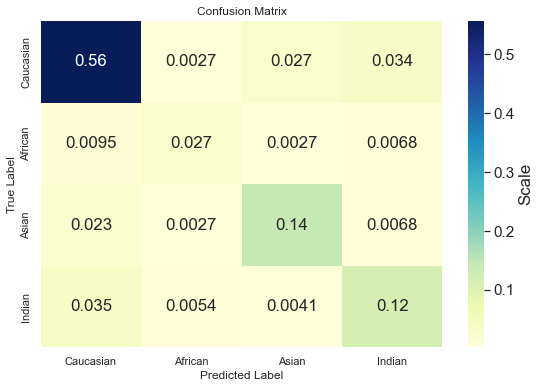

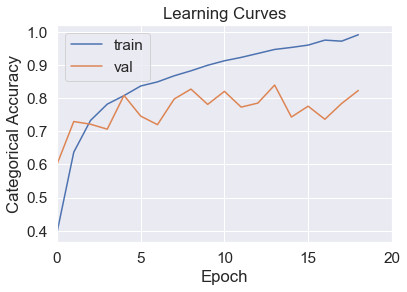

(736,)
(4125, 1)
(4125, 2500)
Epoch 1/20
65/65 [==============================] - 16s 242ms/step - loss: 1.2041 - categorical_accuracy: 0.4463 - val_loss: 0.8469 - val_categorical_accuracy: 0.6807
Epoch 2/20
65/65 [==============================] - 15s 235ms/step - loss: 0.8252 - categorical_accuracy: 0.6844 - val_loss: 0.6533 - val_categorical_accuracy: 0.7690
Epoch 3/20
65/65 [==============================] - 15s 236ms/step - loss: 0.6613 - categorical_accuracy: 0.7578 - val_loss: 0.7133 - val_categorical_accuracy: 0.7364
Epoch 4/20
65/65 [==============================] - 15s 235ms/step - loss: 0.5859 - categorical_accuracy: 0.7864 - val_loss: 0.5444 - val_categorical_accuracy: 0.7976
Epoch 5/20
65/65 [==============================] - 15s 238ms/step - loss: 0.5367 - categorical_accuracy: 0.7978 - val_loss: 0.6761 - val_categorical_accuracy: 0.7432
Epoch 6/20
65/65 [==============================] - 15s 237ms/step - loss: 0.4695 - categorical_accuracy: 0.8330 - val_loss: 0.6482 - v

C:\Users\alexe.DESKTOP-OI73UHK\anaconda3\lib\site-packages\ipykernel_launcher.py:92: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


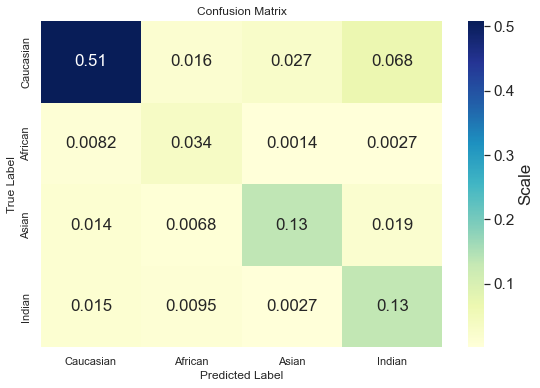

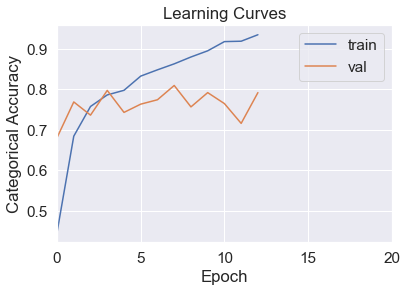

(736,)
(4125, 1)
(4125, 2500)
Epoch 1/20
65/65 [==============================] - 17s 264ms/step - loss: 1.2871 - categorical_accuracy: 0.3888 - val_loss: 1.3793 - val_categorical_accuracy: 0.3179
Epoch 2/20
65/65 [==============================] - 17s 266ms/step - loss: 0.9967 - categorical_accuracy: 0.5930 - val_loss: 0.7246 - val_categorical_accuracy: 0.7337
Epoch 3/20
65/65 [==============================] - 17s 263ms/step - loss: 0.7795 - categorical_accuracy: 0.7001 - val_loss: 0.6519 - val_categorical_accuracy: 0.7622
Epoch 4/20
65/65 [==============================] - 16s 240ms/step - loss: 0.6908 - categorical_accuracy: 0.7392 - val_loss: 0.8268 - val_categorical_accuracy: 0.6916
Epoch 5/20
65/65 [==============================] - 16s 240ms/step - loss: 0.6253 - categorical_accuracy: 0.7595 - val_loss: 0.6039 - val_categorical_accuracy: 0.7772
Epoch 6/20
65/65 [==============================] - 16s 239ms/step - loss: 0.5543 - categorical_accuracy: 0.7942 - val_loss: 0.5807 - v

C:\Users\alexe.DESKTOP-OI73UHK\anaconda3\lib\site-packages\ipykernel_launcher.py:92: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


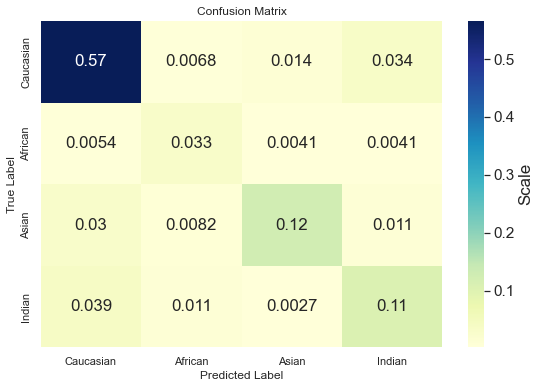

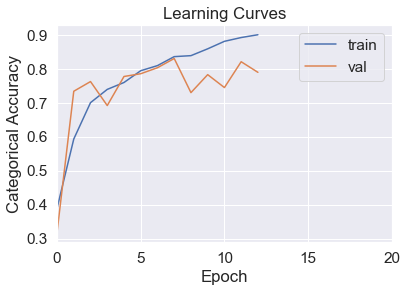

(736,)
(4125, 1)
(4125, 2500)
Epoch 1/20
65/65 [==============================] - 16s 241ms/step - loss: 1.1475 - categorical_accuracy: 0.4880 - val_loss: 0.8805 - val_categorical_accuracy: 0.6644
Epoch 2/20
65/65 [==============================] - 16s 240ms/step - loss: 0.7796 - categorical_accuracy: 0.7040 - val_loss: 0.5655 - val_categorical_accuracy: 0.7908
Epoch 3/20
65/65 [==============================] - 16s 241ms/step - loss: 0.6654 - categorical_accuracy: 0.7496 - val_loss: 0.6423 - val_categorical_accuracy: 0.7812
Epoch 4/20
65/65 [==============================] - 16s 247ms/step - loss: 0.5789 - categorical_accuracy: 0.7922 - val_loss: 0.5586 - val_categorical_accuracy: 0.7989
Epoch 5/20
65/65 [==============================] - 16s 241ms/step - loss: 0.5008 - categorical_accuracy: 0.8175 - val_loss: 0.5257 - val_categorical_accuracy: 0.8111
Epoch 6/20
65/65 [==============================] - 16s 241ms/step - loss: 0.4529 - categorical_accuracy: 0.8381 - val_loss: 0.5463 - v

C:\Users\alexe.DESKTOP-OI73UHK\anaconda3\lib\site-packages\ipykernel_launcher.py:92: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


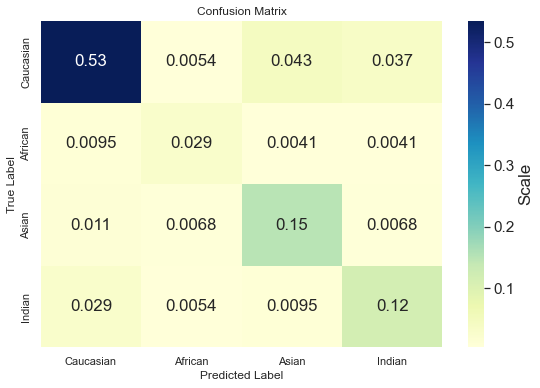

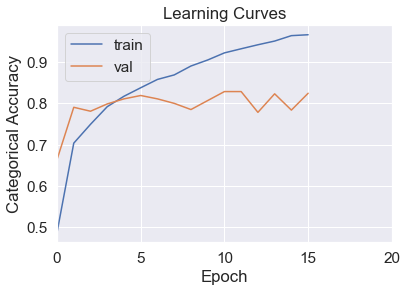

(736,)
(4125, 1)
(4125, 2500)
Epoch 1/20
65/65 [==============================] - 15s 238ms/step - loss: 1.3367 - categorical_accuracy: 0.3413 - val_loss: 1.1106 - val_categorical_accuracy: 0.6508
Epoch 2/20
65/65 [==============================] - 16s 239ms/step - loss: 1.1139 - categorical_accuracy: 0.5372 - val_loss: 0.8664 - val_categorical_accuracy: 0.6685
Epoch 3/20
65/65 [==============================] - 16s 240ms/step - loss: 0.8770 - categorical_accuracy: 0.6625 - val_loss: 0.7886 - val_categorical_accuracy: 0.6875
Epoch 4/20
65/65 [==============================] - 16s 250ms/step - loss: 0.7918 - categorical_accuracy: 0.6992 - val_loss: 0.8190 - val_categorical_accuracy: 0.6780
Epoch 5/20
65/65 [==============================] - 16s 240ms/step - loss: 0.7326 - categorical_accuracy: 0.7219 - val_loss: 0.7261 - val_categorical_accuracy: 0.7174
Epoch 6/20
65/65 [==============================] - 16s 240ms/step - loss: 0.6764 - categorical_accuracy: 0.7481 - val_loss: 0.6731 - v

C:\Users\alexe.DESKTOP-OI73UHK\anaconda3\lib\site-packages\ipykernel_launcher.py:92: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


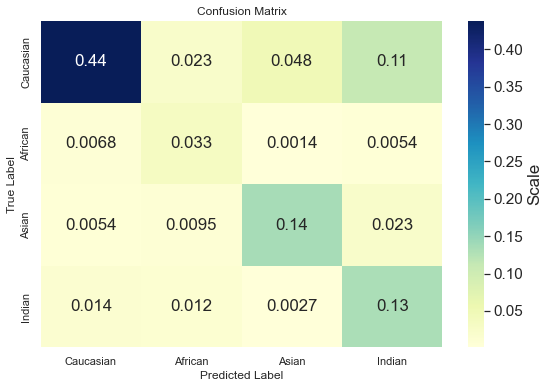

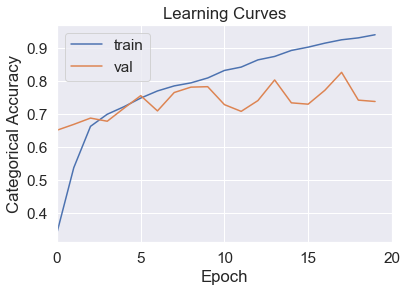

Model accuracy =  0.7545010254324744


In [14]:
def DataAug3(model, epochs, batch_size, patience,output_filename):
    # Cross-validation:
    x_training_set, y_training_set, x_testing_set, y_testing_set = cross_validation(X_train, Y_train, 0)
    
    print(np.shape(y_testing_set))
    
    # Separate Training Set by class
    Subsets, Labels = split_by_class(x_training_set, y_training_set)
    Class_1 = Subsets[0]
    Label_1 = Labels[0]
    Class_2 = Subsets[1]
    Label_2 = Labels[1]
    Class_3 = Subsets[2]
    Label_3 = Labels[2]
    Class_4 = Subsets[3]
    Label_4 = Labels[3]
    
    # Merge Classes 1 and 3 and Undersample class 1 (maiority class)
    rus_class = np.vstack((Class_1, Class_3))
    rus_label = np.vstack((Label_1, Label_3))
    RUS = RandomUnderSampler()
    x_rus, y_rus = RUS.fit_resample(rus_class, rus_label)
    
    # Flip Class 2
    #Reshape data
    Class_2 = Class_2.reshape(-1, 50, 50, 1)  #reshaping the data to flip
    Class_2 = Class_2.astype('float32')
   
    # Flip image    
    flipped_2 = tf.image.flip_left_right(Class_2)
    flipped_2 = flipped_2.numpy()
    flipped_2 = flipped_2.reshape(-1, 2500)
    Class_2 = Class_2.reshape(-1, 2500)
    
    
    # Merge everything and shuffle
    x_train = np.vstack((x_rus, Class_2, flipped_2, Class_4))
    y_train = np.vstack((np.transpose([y_rus]), Label_2, Label_2, Label_4))
    
    n = np.size(x_train, 0)
    
    shuffler = np.random.permutation(n)
    x_train = x_train[shuffler]
    y_train = y_train[shuffler]
    
    # Print dimensions
    print(np.shape(y_train))
    print(np.shape(x_train))


    #Reshape data
    x_train = x_train.reshape(-1, 50, 50, 1)
    x_testing_set = x_testing_set.reshape(-1, 50, 50, 1)

    x_train = x_train.astype('float32')
    x_testing_set = x_testing_set.astype('float32')
    x_train = x_train / 255.
    x_testing_set = x_testing_set / 255.

    
    # Convert labels into one-hot-encoding format
    y_val_ground = y_testing_set
    y_train = onehotencoding(y_train)
    y_testing_set = onehotencoding(y_testing_set)
    
    callback = tf.keras.callbacks.EarlyStopping(monitor='val_categorical_accuracy', patience = patience, restore_best_weights = True)

    train = model.fit(x_train, y_train, batch_size=batch_size,epochs=epochs,verbose=1,callbacks=[callback],validation_data=(x_testing_set, y_testing_set))
    test_eval = model.evaluate(x_testing_set, y_testing_set, verbose=0)
    
    predictions = model.predict(x_testing_set)
    

    # Find the class with maximum probability
    y_test = []

    for i in range(len(predictions)):
        y_test.append(np.argmax(predictions[i]))
    
    balacc = balanced_accuracy_score(y_val_ground, y_test)

    print('\nTest accuracy:', test_eval)
    print('\n Balanced accuracy:', balacc)
    
    
    # Confusion Matrix
    print(np.shape(y_val_ground))
    print(np.shape(y_test))
    
    res = tf.math.confusion_matrix(y_val_ground,y_test)
    res = res.numpy()
    res = res.astype(np.float)
    res = res/736.0
    
    labels = ["Caucasian","African","Asian","Indian"]
    seaborn.set(color_codes=True)
    plt.figure(1, figsize=(9, 6))
    plt.title("Confusion Matrix")
    seaborn.set(font_scale=1.4)
    ax = seaborn.heatmap(res, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Scale'})
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
    ax.set(ylabel="True Label", xlabel="Predicted Label")
    
    plt.savefig(output_filename, bbox_inches='tight', dpi=300)
    
    
    # plot learning curves
    plt.figure()
    plt.title('Learning Curves')
    plt.xlabel('Epoch')
    plt.ylabel('Categorical Accuracy')
    plt.plot(train.history['categorical_accuracy'], label='train')
    plt.plot(train.history['val_categorical_accuracy'], label='val')
    plt.xlim([0, 20])
    plt.legend()
    plt.show()
    
    return balacc


accuracy = []
for i in range(5):
    output_filename = "Confusion_Matrix_"+str(i)
    model, batch_size, epochs, num_classes, patience = compile_best_model()
    acc = DataAug3(model, epochs, batch_size, patience,output_filename)
    accuracy.append(acc)

accuracy = np.median(accuracy)
print("Model accuracy = ", accuracy)

### Horizontal Flip of Class 2

(6937, 1)
(6937, 2500)
Epoch 1/20
109/109 [==============================] - 32s 286ms/step - loss: 0.9652 - categorical_accuracy: 0.6256 - val_loss: 0.6521 - val_categorical_accuracy: 0.7473
Epoch 2/20
109/109 [==============================] - 33s 302ms/step - loss: 0.6499 - categorical_accuracy: 0.7594 - val_loss: 0.5833 - val_categorical_accuracy: 0.7880
Epoch 3/20
109/109 [==============================] - 30s 277ms/step - loss: 0.5392 - categorical_accuracy: 0.8061 - val_loss: 0.4740 - val_categorical_accuracy: 0.8370
Epoch 4/20
109/109 [==============================] - 32s 290ms/step - loss: 0.4669 - categorical_accuracy: 0.8292 - val_loss: 0.4614 - val_categorical_accuracy: 0.8438
Epoch 5/20
109/109 [==============================] - 32s 296ms/step - loss: 0.4212 - categorical_accuracy: 0.8469 - val_loss: 0.5387 - val_categorical_accuracy: 0.8030
Epoch 6/20
109/109 [==============================] - 32s 293ms/step - loss: 0.3755 - categorical_accuracy: 0.8654 - val_loss: 0.438

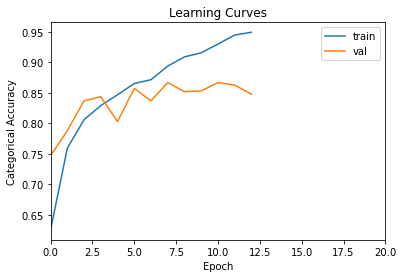

(6937, 1)
(6937, 2500)
Epoch 1/20
109/109 [==============================] - 32s 290ms/step - loss: 1.0003 - categorical_accuracy: 0.6085 - val_loss: 0.6696 - val_categorical_accuracy: 0.7310
Epoch 2/20
109/109 [==============================] - 32s 293ms/step - loss: 0.6565 - categorical_accuracy: 0.7558 - val_loss: 0.5222 - val_categorical_accuracy: 0.8030
Epoch 3/20
109/109 [==============================] - 31s 288ms/step - loss: 0.5378 - categorical_accuracy: 0.8031 - val_loss: 0.4801 - val_categorical_accuracy: 0.8207
Epoch 4/20
109/109 [==============================] - 33s 304ms/step - loss: 0.4699 - categorical_accuracy: 0.8332 - val_loss: 0.4588 - val_categorical_accuracy: 0.8465
Epoch 5/20
109/109 [==============================] - 33s 300ms/step - loss: 0.4076 - categorical_accuracy: 0.8574 - val_loss: 0.4541 - val_categorical_accuracy: 0.8505
Epoch 6/20
109/109 [==============================] - 33s 300ms/step - loss: 0.3791 - categorical_accuracy: 0.8607 - val_loss: 0.466

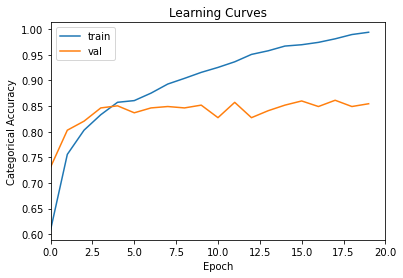

(6937, 1)
(6937, 2500)
Epoch 1/20
109/109 [==============================] - 31s 281ms/step - loss: 1.0211 - categorical_accuracy: 0.6031 - val_loss: 0.7365 - val_categorical_accuracy: 0.7337
Epoch 2/20
109/109 [==============================] - 34s 316ms/step - loss: 0.7283 - categorical_accuracy: 0.7260 - val_loss: 0.5875 - val_categorical_accuracy: 0.7799
Epoch 3/20
109/109 [==============================] - 34s 315ms/step - loss: 0.5773 - categorical_accuracy: 0.7901 - val_loss: 0.5026 - val_categorical_accuracy: 0.8098
Epoch 4/20
109/109 [==============================] - 29s 268ms/step - loss: 0.5124 - categorical_accuracy: 0.8178 - val_loss: 0.4902 - val_categorical_accuracy: 0.8288
Epoch 5/20
109/109 [==============================] - 28s 261ms/step - loss: 0.4751 - categorical_accuracy: 0.8302 - val_loss: 0.4642 - val_categorical_accuracy: 0.8438
Epoch 6/20
109/109 [==============================] - 29s 263ms/step - loss: 0.4054 - categorical_accuracy: 0.8557 - val_loss: 0.453

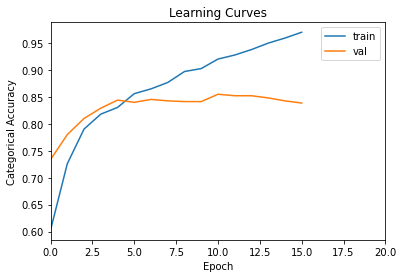

(6937, 1)
(6937, 2500)
Epoch 1/20
109/109 [==============================] - 32s 283ms/step - loss: 1.0484 - categorical_accuracy: 0.5939 - val_loss: 0.7932 - val_categorical_accuracy: 0.6929
Epoch 2/20
109/109 [==============================] - 31s 282ms/step - loss: 0.7557 - categorical_accuracy: 0.7152 - val_loss: 0.5680 - val_categorical_accuracy: 0.8016
Epoch 3/20
109/109 [==============================] - 34s 310ms/step - loss: 0.6093 - categorical_accuracy: 0.7770 - val_loss: 0.6228 - val_categorical_accuracy: 0.7785
Epoch 4/20
109/109 [==============================] - 32s 291ms/step - loss: 0.5424 - categorical_accuracy: 0.8029 - val_loss: 0.5173 - val_categorical_accuracy: 0.8247
Epoch 5/20
109/109 [==============================] - 32s 292ms/step - loss: 0.4803 - categorical_accuracy: 0.8292 - val_loss: 0.5001 - val_categorical_accuracy: 0.8288
Epoch 6/20
109/109 [==============================] - 32s 294ms/step - loss: 0.4407 - categorical_accuracy: 0.8446 - val_loss: 0.465

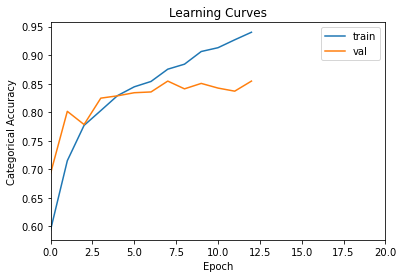

(6937, 1)
(6937, 2500)
Epoch 1/20
109/109 [==============================] - 34s 300ms/step - loss: 1.0393 - categorical_accuracy: 0.5939 - val_loss: 0.7866 - val_categorical_accuracy: 0.6984
Epoch 2/20
109/109 [==============================] - 33s 301ms/step - loss: 0.7348 - categorical_accuracy: 0.7229 - val_loss: 0.5847 - val_categorical_accuracy: 0.7853
Epoch 3/20
109/109 [==============================] - 34s 316ms/step - loss: 0.5753 - categorical_accuracy: 0.7940 - val_loss: 0.5134 - val_categorical_accuracy: 0.7989
Epoch 4/20
109/109 [==============================] - 33s 300ms/step - loss: 0.4957 - categorical_accuracy: 0.8217 - val_loss: 0.4577 - val_categorical_accuracy: 0.8370
Epoch 5/20
109/109 [==============================] - 31s 286ms/step - loss: 0.4526 - categorical_accuracy: 0.8393 - val_loss: 0.4747 - val_categorical_accuracy: 0.8234
Epoch 6/20
109/109 [==============================] - 34s 308ms/step - loss: 0.4001 - categorical_accuracy: 0.8543 - val_loss: 0.446

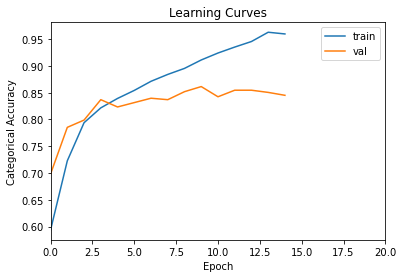

Model accuracy =  0.7720741626545801


In [62]:
def DataAug4(model, epochs, batch_size, patience):
    # Cross-validation:
    x_training_set, y_training_set, x_testing_set, y_testing_set = cross_validation(X_train, Y_train, 0)
    
    # Separate Training Set by class
    Subsets, Labels = split_by_class(x_training_set, y_training_set)
    Class_1 = Subsets[0]
    Label_1 = Labels[0]
    Class_2 = Subsets[1]
    Label_2 = Labels[1]
    Class_3 = Subsets[2]
    Label_3 = Labels[2]
    Class_4 = Subsets[3]
    Label_4 = Labels[3]
        
    # Flip Class 2
    #Reshape data
    Class_2 = Class_2.reshape(-1, 50, 50, 1)  #reshaping the data to flip
    Class_2 = Class_2.astype('float32')
   
    # Flip image    
    flipped_2 = tf.image.flip_left_right(Class_2)
    flipped_2 = flipped_2.numpy()
    flipped_2 = flipped_2.reshape(-1, 2500)
    Class_2 = Class_2.reshape(-1, 2500)
    
    
    # Merge everything and shuffle
    x_train = np.vstack((Class_1, Class_3, Class_2, flipped_2, Class_4))
    y_train = np.vstack((Label_1, Label_3, Label_2, Label_2, Label_4))
    
    n = np.size(x_train, 0)
    
    shuffler = np.random.permutation(n)
    x_train = x_train[shuffler]
    y_train = y_train[shuffler]
    
    # Print dimensions
    print(np.shape(y_train))
    print(np.shape(x_train))


    #Reshape data
    x_train = x_train.reshape(-1, 50, 50, 1)
    x_testing_set = x_testing_set.reshape(-1, 50, 50, 1)

    x_train = x_train.astype('float32')
    x_testing_set = x_testing_set.astype('float32')
    x_train = x_train / 255.
    x_testing_set = x_testing_set / 255.

    
    # Convert labels into one-hot-encoding format
    y_val_ground = y_testing_set
    y_train = onehotencoding(y_train)
    y_testing_set = onehotencoding(y_testing_set)
    
    callback = tf.keras.callbacks.EarlyStopping(monitor='val_categorical_accuracy', patience = patience, restore_best_weights = True)

    train = model.fit(x_train, y_train, batch_size=batch_size,epochs=epochs,verbose=1,callbacks=[callback],validation_data=(x_testing_set, y_testing_set))
    test_eval = model.evaluate(x_testing_set, y_testing_set, verbose=0)
    
    predictions = model.predict(x_testing_set)

    # Find the class with maximum probability
    y_test = []

    for i in range(len(predictions)):
        y_test.append(np.argmax(predictions[i]))
    
    balacc = balanced_accuracy_score(y_val_ground, y_test)

    print('\nTest accuracy:', test_eval)
    print('\n Balanced accuracy:', balacc)
    
    # plot learning curves
    plt.title('Learning Curves')
    plt.xlabel('Epoch')
    plt.ylabel('Categorical Accuracy')
    plt.plot(train.history['categorical_accuracy'], label='train')
    plt.plot(train.history['val_categorical_accuracy'], label='val')
    plt.xlim([0, 20])
    plt.legend()
    plt.show()
    
    return balacc


accuracy = []
for i in range(5):    
    model, batch_size, epochs, num_classes, patience = compile_best_model()
    acc = DataAug4(model, epochs, batch_size, patience)
    accuracy.append(acc)

accuracy = np.median(accuracy)
print("Model accuracy = ", accuracy)

## Creating preditions using the best model

In [67]:

# Load the training set and the test set ---------------------------------------------------------
X_train = np.load("Xtrain_Classification_Part2.npy")
Y_train = np.load("Ytrain_Classification_Part2.npy")
X_test = np.load("Xtest_Classification_Part2.npy")

# Separate Training Set by class
Subsets, Labels = split_by_class(X_train, Y_train)
Class_1 = Subsets[0]
Label_1 = Labels[0]
Class_2 = Subsets[1]
Label_2 = Labels[1]
Class_3 = Subsets[2]
Label_3 = Labels[2]
Class_4 = Subsets[3]
Label_4 = Labels[3]

# Merge Classes 1 and 3 and Undersample class 1 (maiority class)
rus_class = np.vstack((Class_1, Class_3))
rus_label = np.vstack((Label_1, Label_3))
RUS = RandomUnderSampler()
x_rus, y_rus = RUS.fit_resample(rus_class, rus_label)

# Flip Class 2
#Reshape data
Class_2 = Class_2.reshape(-1, 50, 50, 1)  #reshaping the data to flip
Class_2 = Class_2.astype('float32')
# Flip image    
flipped_2 = tf.image.flip_left_right(Class_2)
flipped_2 = flipped_2.numpy()
flipped_2 = flipped_2.reshape(-1, 2500)
Class_2 = Class_2.reshape(-1, 2500)

# Merge everything and shuffle
x_train = np.vstack((x_rus, Class_2, flipped_2, Class_4))
y_train = np.vstack((np.transpose([y_rus]), Label_2, Label_2, Label_4))

n = np.size(x_train, 0)

shuffler = np.random.permutation(n)
x_train = x_train[shuffler]
y_train = y_train[shuffler]


#Reshape data
X_train_CNN = x_train.reshape(-1, 50, 50, 1)
X_test_CNN = X_test.reshape(-1, 50, 50, 1)
print('X_train shape: ',X_train_CNN.shape)
print('X_test shape: ',X_test_CNN.shape)

X_train = X_train_CNN.astype('float32')
X_test = X_test_CNN.astype('float32')
X_train = X_train_CNN / 255.
X_test = X_test_CNN / 255.

# Change Y format to one-hot-encoding
y_train = onehotencoding(y_train)


#Define parameters -----------------------------------------------------------------------------
batch_size = 64
epochs = 11
num_classes = 4

#Define model
model = Sequential()
model.add(Conv2D(32, kernel_size=(4, 4),activation='relu',input_shape=(50,50,1),padding='same')) #Convolution layer
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2),padding='same')) #Pooling layer

model.add(Conv2D(64, (4, 4), activation='relu',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

model.add(Flatten())
model.add(Dense(128, activation='relu')) #Fully connected layer
model.add(LeakyReLU(alpha=0.1))                  
model.add(Dense(num_classes, activation='softmax')) #Output layer

model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False), optimizer=keras.optimizers.Adam(),metrics=['categorical_accuracy'])


# Train the model-------------------------------------------------------------------------------------------------
train = model.fit(X_train, y_train, batch_size=batch_size,epochs=epochs,verbose=2)


# Classify the testing Set ----------------------------------------------------------------------------------------
predictions = model.predict(X_test)

# Find the class with maximum probability
y_test = []

for i in range(len(predictions)):
    y_test.append(np.argmax(predictions[i]))


np.save('y_test.npy', y_test)
print(np.shape(y_test))


X_train shape:  (4567, 50, 50, 1)
X_test shape:  (1290, 50, 50, 1)
Epoch 1/11
72/72 - 19s - loss: 1.1180 - categorical_accuracy: 0.5093
Epoch 2/11
72/72 - 19s - loss: 0.8014 - categorical_accuracy: 0.6952
Epoch 3/11
72/72 - 19s - loss: 0.6605 - categorical_accuracy: 0.7534
Epoch 4/11
72/72 - 19s - loss: 0.5679 - categorical_accuracy: 0.8010
Epoch 5/11
72/72 - 18s - loss: 0.4858 - categorical_accuracy: 0.8244
Epoch 6/11
72/72 - 18s - loss: 0.4240 - categorical_accuracy: 0.8513
Epoch 7/11
72/72 - 18s - loss: 0.3809 - categorical_accuracy: 0.8623
Epoch 8/11
72/72 - 19s - loss: 0.3504 - categorical_accuracy: 0.8728
Epoch 9/11
72/72 - 20s - loss: 0.2968 - categorical_accuracy: 0.8929
Epoch 10/11
72/72 - 21s - loss: 0.2466 - categorical_accuracy: 0.9104
Epoch 11/11
72/72 - 19s - loss: 0.2180 - categorical_accuracy: 0.9199
(1290,)


In [68]:
print(y_test)

[2, 0, 0, 1, 3, 0, 3, 2, 0, 0, 0, 0, 2, 3, 3, 3, 3, 3, 0, 0, 2, 2, 0, 0, 3, 1, 2, 0, 3, 3, 0, 0, 3, 2, 0, 1, 3, 0, 2, 2, 0, 3, 2, 3, 2, 0, 1, 3, 0, 2, 0, 1, 2, 3, 3, 3, 1, 3, 0, 3, 2, 1, 0, 2, 0, 0, 2, 3, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 3, 0, 0, 2, 0, 0, 0, 3, 0, 3, 0, 0, 3, 0, 3, 1, 2, 3, 3, 3, 0, 3, 3, 0, 2, 3, 1, 2, 3, 0, 0, 3, 3, 3, 0, 1, 0, 2, 0, 2, 3, 0, 3, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 2, 0, 2, 2, 3, 3, 0, 3, 2, 2, 3, 0, 0, 2, 0, 0, 2, 0, 0, 0, 3, 0, 0, 2, 2, 3, 3, 2, 0, 3, 0, 2, 3, 3, 3, 0, 0, 0, 3, 2, 0, 0, 0, 2, 2, 0, 3, 0, 0, 2, 3, 0, 0, 2, 0, 2, 0, 0, 3, 0, 3, 2, 0, 3, 2, 0, 3, 0, 0, 2, 3, 0, 2, 3, 0, 0, 0, 3, 0, 2, 2, 3, 0, 3, 3, 2, 3, 2, 3, 2, 0, 3, 2, 2, 2, 0, 3, 1, 0, 0, 0, 2, 0, 1, 3, 0, 2, 1, 0, 3, 0, 2, 0, 3, 0, 0, 0, 2, 0, 0, 0, 0, 0, 3, 0, 2, 3, 2, 0, 0, 2, 0, 3, 3, 1, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 3, 0, 3, 0, 0, 1, 2, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 3, 2, 0, 0, 2, 2, 2, 3, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 3, 2, 0, 2, 0, 2, 3, 3, 0, 1, 